# <span style="color:#2A3838"> **Optimizing Booking Management**
### <span style="color:#2A3838"> **Leveraging Machine Learning to Reduce Cancellations and Maximize Revenue**


---

## <span style="color:#2A3838"> **01. Introduction**

### <span style= "color:899481">**1.1 Background**

Sustained success in the fiercely competitive hospitality sector depends on maintaining customer satisfaction and increasing operational effectiveness. A hotel located in Portugal is looking to better understand its patrons' behaviour and pinpoint the reasons behind cancellations. The hotel hopes to improve customer satisfaction, reduce cancellations, and streamline operations by utilising data analytics and machine learning. Anonymised booking data is included in the dataset, which provides insights into the origins, booking trends, and preferences of customers.

For hotels, cancellations of reservations present a serious problem since they can result in lost revenue, ineffective use of resources, and possible overbooking. To lessen the impact of cancellations, it is essential to comprehend the factors that contribute to them. The hotel is currently dealing with issues like:

1. Revenue is being impacted by high cancellation rates.
1. Limited knowledge of booking trends and consumer behaviour.
1. Ineffective resource management, including parking spots and room assignments.


### <span style= "color:899481">**1.2 Problem Statement**
How can machine learning models be leveraged to predict booking cancellations accurately, and what data-driven strategies can be implemented to optimize revenue and minimize overbooking risks?

### <span style= "color:899481">**1.3 Approach**
1. Data Exploration and Preprocessing
1. Model Development & Evaluation
1. Business Insights & Strategy Formulation

### <span style= "color:899481">**1.4 Goal**

To develop an accurate machine learning model for predicting booking cancellations and leverage its insights to implement data-driven strategies that:

1. Minimize revenue loss from cancellations.
1. Optimize overbooking strategies to balance occupancy and customer satisfaction.
1. Enhance marketing efficiency by targeting high-retention customers.
1. Improve pricing strategies through dynamic adjustments based on demand patterns.
1. Strengthen customer engagement by identifying and addressing key cancellation drivers.

---
## <span style="color:#2A3838">**02. Import Package**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import LabelEncoder
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

---

## <span style="color:#2A3838">**03. Read Data**

In [2]:
df = pd.read_csv("data_hotel_booking_demand.csv")
df

country market_segment  previous_cancellations  booking_changes  \
0         IRL  Offline TA/TO                       0                0   
1         FRA      Online TA                       0                0   
2         PRT      Online TA                       0                1   
3         NLD      Online TA                       0                0   
4         PRT      Online TA                       0                2   
...       ...            ...                     ...              ...   
83568     PRT      Online TA                       0                0   
83569     FRA      Online TA                       0                0   
83570     PRT      Online TA                       0                1   
83571      CN  Offline TA/TO                       0                0   
83572     PRT         Groups                       0                0   

      deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
0       No Deposit                     0  Transient-Party                  A   
1       No Deposit                     0        Transient                  A   
2       No Deposit                     0        Transient                  A   
3       No Deposit                     0        Transient                  A   
4       No Deposit                     0        Transient                  A   
...            ...                   ...              ...                ...   
83568   No Deposit                     0         Contract                  A   
83569   No Deposit                     0        Transient                  D   
83570   No Deposit                     0        Transient                  D   
83571   No Deposit                     0  Transient-Party                  A   
83572   Non Refund                     0        Transient                  A   

       required_car_parking_spaces  total_of_special_requests  is_canceled  
0                                0                          0            0  
1                                0                          2            0  
2                                0                          2            0  
3                                0                          1            1  
4                                0                          2            0  
...                            ...                        ...          ...  
83568                            0                          3            1  
83569                            0                          2            0  
83570                            0                          3            0  
83571                            0                          0            0  
83572                            0                          0            1  

[83573 rows x 11 columns]

---

## <span style="color:#2A3838">**04. Data Understanding**

Below is a description of the variables or columns found in the data.

| **Column Name**               | **Column Description**                                                                                                                               |
|-------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **market_segment**            | Market segment designation.                                                                                                                          |
| **previous_cancellations**    | Number of previous bookings that were cancelled by the customer prior to the current booking.                                                        |
| **booking_changes**           | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.    |
| **deposit_type**              | Indication on if the customer made a deposit to guarantee the booking.                                                                               |
| **days_in_waiting_list**      | Number of days the booking was in the waiting list before it was confirmed to the customer.                                                          |
| **customer_type**             | Type of booking.                                                                                                                                     |
| **reserved_room_type**        | Code of room type reserved. Code is presented instead of designation for anonymity reasons.                                                          |
| **required_car_parking_space**| Number of car parking spaces required by the customer.                                                                                               |
| **total_of_special_request**  | Number of special requests made by the customer (e.g. twin bed or high floor).                                                                       |
| **is_canceled**               | Value indicating if the booking was canceled (1) or not (0).                                                                                         |


### <span style="color:#899481">**4.1 Understanding Data using Descriptive Analysis**

Understanding the available data is crucial before moving forward with additional analysis. To start, a descriptive analysis is conducted to look at each variable's identity and distribution.

In [3]:
df_unique = []

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

for i in df.columns:
    unique_count = df[i].nunique()
    unique_values = df[i].unique()
    data_type = df[i].dtype
    df_unique.append({
        "Column Name": i,
        "Number of Unique": unique_count,
        "Data Type": data_type,
        "Unique Sample": unique_values
    })

df_unique = pd.DataFrame(df_unique)
display(df_unique)


Column Name  Number of Unique Data Type  \
0                       country               162    object   
1                market_segment                 8    object   
2        previous_cancellations                15     int64   
3               booking_changes                19     int64   
4                  deposit_type                 3    object   
5          days_in_waiting_list               115     int64   
6                 customer_type                 4    object   
7            reserved_room_type                10    object   
8   required_car_parking_spaces                 5     int64   
9     total_of_special_requests                 6     int64   
10                  is_canceled                 2     int64   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Unique Sample  
0   [IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, nan, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                  [Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                         [0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]  
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       [No Deposit, Non Refund, Refundable]  
5                                                                                     [0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 

In [4]:
pd.reset_option("all")

display(df.describe(include="number"))
display(df.describe(exclude="number"))

previous_cancellations  booking_changes  days_in_waiting_list  \
count            83573.000000     83573.000000          83573.000000   
mean                 0.086798         0.220897              2.330561   
std                  0.841011         0.648635             17.673051   
min                  0.000000         0.000000              0.000000   
25%                  0.000000         0.000000              0.000000   
50%                  0.000000         0.000000              0.000000   
75%                  0.000000         0.000000              0.000000   
max                 26.000000        21.000000            391.000000   

       required_car_parking_spaces  total_of_special_requests   is_canceled  
count                 83573.000000               83573.000000  83573.000000  
mean                      0.062999                   0.573211      0.368277  
std                       0.246919                   0.795163      0.482340  
min                       0.000000                   0.000000      0.000000  
25%                       0.000000                   0.000000      0.000000  
50%                       0.000000                   0.000000      0.000000  
75%                       0.000000                   1.000000      1.000000  
max                       8.000000                   5.000000      1.000000

country market_segment deposit_type customer_type reserved_room_type
count    83222          83573        83573         83573              83573
unique     162              8            3             4                 10
top        PRT      Online TA   No Deposit     Transient                  A
freq     34097          39460        73352         62732              60041

---

## <span style="color:#2A3838">**05. Data Splitting**


We employ stratified splitting to make sure that the distribution of classes in the training and test sets remains the same as in the original dataset. An unbalanced distribution, where one set contains noticeably more samples from one class than the other, could arise from a random split without this.

In [5]:
df_train, df_test = train_test_split(df, stratify=df['is_canceled'], random_state=2020, test_size=0.2)

---

## <span style="color:#2A3838">**06. Data Cleaning**

We will not remove duplicates because there is no unique ID to accurately define the data. Therefore, we assume that each row represents a different data point.

### <span style="color:#899481">**6.1 Assign NAs**

Here is an analysis of the null count and percentage for each column in the Hotel dataset:

1. **country**: The `country` column has 279 missing values, which accounts for 0.04% of the data.

Because the number of missing data points is low (less than 5%), we remove the rows with missing values.

However, it's important to note that the **`country` variable will not be used in the model analysis**, as it does not accurately describe the customer. By default, the 'country' variable is set to 'Portugal' and only changes when the customer checks in. Therefore, **keeping this variable could lead to data leakage**.

In [6]:
pd.reset_option("all")

def df_train_null_summary():
    global null_summary
    
    null_counts = df_train.isna().sum()
    null_percentages = (null_counts / len(df_train)) * 100
    null_summary = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': round(null_percentages, 2)
    })

    return null_summary

df_train_null_summary()


Null Count  Null Percentage
country                             279             0.42
market_segment                        0             0.00
previous_cancellations                0             0.00
booking_changes                       0             0.00
deposit_type                          0             0.00
days_in_waiting_list                  0             0.00
customer_type                         0             0.00
reserved_room_type                    0             0.00
required_car_parking_spaces           0             0.00
total_of_special_requests             0             0.00
is_canceled                           0             0.00

In [7]:
df_train = df_train.dropna()

In [8]:
pd.reset_option("all")

def df_train_null_summary():
    global null_summary
    
    null_counts = df_train.isna().sum()
    null_percentages = (null_counts / len(df_train)) * 100
    null_summary = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage': round(null_percentages, 2)
    })

    return null_summary

df_train_null_summary()


Null Count  Null Percentage
country                               0              0.0
market_segment                        0              0.0
previous_cancellations                0              0.0
booking_changes                       0              0.0
deposit_type                          0              0.0
days_in_waiting_list                  0              0.0
customer_type                         0              0.0
reserved_room_type                    0              0.0
required_car_parking_spaces           0              0.0
total_of_special_requests             0              0.0
is_canceled                           0              0.0

### <span style="color:#899481">**6.2 Identify Outliers**

#### <span style= "color:darksalmon">**6.2.1 Categorical Columns**

The focus of this Exploratory Data Analysis (EDA) phase will be on understanding their frequency distribution. By examining how frequently each category appears, we can detect potential data anomalies or inconsistencies. Some categories may be over-represented or under-represented, and these disparities may indicate problems such as data entry errors, missing values, or outliers that must be addressed.

For example, if one category appears far more frequently than others, it may skew the analysis or indicate that the data collection process was flawed. In contrast, categories that appear very infrequently may indicate rare events that need to be handled carefully, as they could represent unique conditions.

In [9]:
df_train.describe(exclude="number")

country market_segment deposit_type customer_type reserved_room_type
count    66579          66579        66579         66579              66579
unique     154              8            3             4                 10
top        PRT      Online TA   No Deposit     Transient                  A
freq     27231          31495        58430         49918              47811

##### <span style= "color:#A67D44">**Market Segment**

1. Offline TA/TO: Offline Travel Agents/Tour Operators.
1. Online TA: Online Travel Agents.
1. Direct: Made directly with a service provider.
1. Groups: Refers to travel bookings made for a group of people.
1. Corporate: Refers to business-related travel bookings made by companies for their employees.
1. Complementary: Refer to travel packages that include additional services or products that complement the main booking.
1. Aviation: Refers specifically to the aviation sector, which may encompass airlines, airports, and related services.
1. Undefined

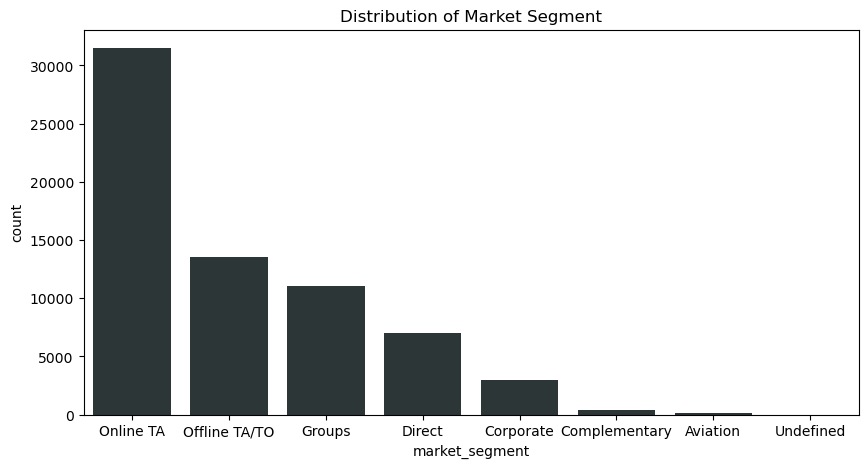

In [10]:
plt.figure(figsize=(10, 5))

market_order = df_train["market_segment"].value_counts().index
sns.countplot(x=df_train["market_segment"], color='#2A3838', order=market_order)
plt.title("Distribution of Market Segment")
plt.show()



The data reveals that the Online Travel Agent (TA) segment accounts for the highest number of customers, indicating that a significant portion of bookings are made through online travel platforms. In contrast, the Complementary, Aviation, and Undefined segments have the lowest representation, suggesting that these channels contribute minimally to overall bookings. While these lower counts might appear as outliers, they likely reflect customer preferences rather than anomalies in the data. This trend highlights the dominance of digital booking platforms in the market while emphasizing the limited engagement through complementary services, aviation-related bookings, and unclassified reservations.









#### <span style= "color:#A67D44">  **Deposit Type**

1. No Deposit: No deposit was made.
1. Non-refundable: a deposit equal to the total stay cost was paid.
1. Refundable: a deposit was made with a value less than the total cost of stay.

Text(0.5, 1.0, 'Distribution of deposit_type')

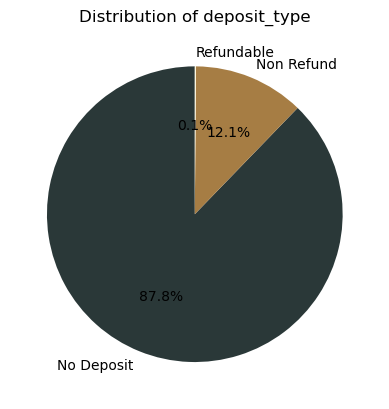

In [11]:
deposit_type_counts = df_train['deposit_type'].value_counts()
custom_colors = ['#2A3838', '#A67D44', 'cornsilk']
plt.pie(deposit_type_counts, labels=deposit_type_counts.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Distribution of deposit_type')

The data shows that the majority of bookings, 87.8%, fall under the No Deposit category, indicating that most customers prefer reservations without upfront payments. This suggests a preference for flexibility, where guests can book accommodations without financial commitment. In contrast, Non-refundable and Refundable deposits account for a much smaller portion, implying that fewer customers opt for prepaid bookings, either due to financial constraints or a preference for risk-free reservations. This trend highlights the importance of flexible booking options in attracting more customers.









#### <span style= "color:#A67D44"> **Customer Type**


1. Contract: When the booking has an allotment or another type of contract associated with it.
1. Group: When the booking is associated with a group.
1. Transient: When the booking is not part of a group or contract, and is not associated with other transient bookings.
1. Transient-party: When the booking is transient but is associated with at least one other transient booking.

Text(0.5, 1.0, 'Distribution of deposit_type')

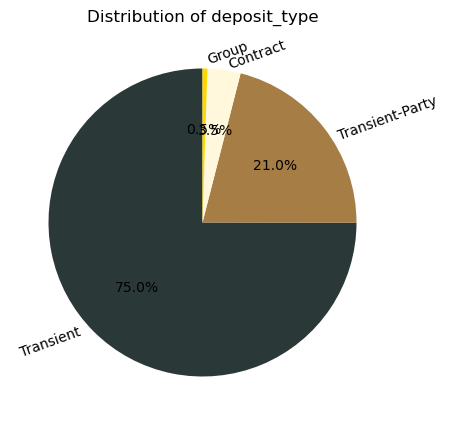

In [12]:
customer_type_counts = df_train['customer_type'].value_counts()
custom_colors = ['#2A3838', '#A67D44', 'cornsilk', 'gold']
fig, ax = plt.subplots(figsize=(5, 5))  # Optional: Adjust figure size
wedges, texts, autotexts = ax.pie(customer_type_counts, 
                                  labels=customer_type_counts.index, 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  colors=custom_colors)

# Rotate only the label text (the category names)
for text in texts:
    text.set_rotation(20)

plt.title('Distribution of deposit_type')

The data indicates that the majority of customers, 75%, fall under the Transient category, meaning most bookings are made independently without any group or contractual association. Additionally, 21% of bookings are classified as Transient-party, where individual bookings are linked to at least one other transient reservation. This suggests that while most guests book independently, a notable portion still travels with companions or small groups. In contrast, Contract and Group bookings make up the smallest share, indicating that corporate agreements and large group reservations are less common. This trend highlights a strong preference for individual and flexible travel arrangements.









#### <span style= "color:#A67D44">**Reserved Room Type**

In [13]:
df_train["reserved_room_type"].unique()

array(['D', 'A', 'F', 'B', 'H', 'E', 'C', 'G', 'P', 'L'], dtype=object)

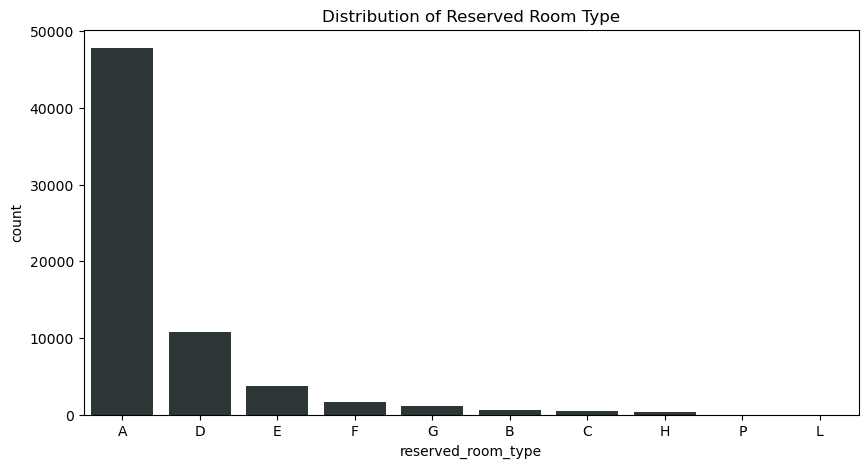

In [14]:
plt.figure(figsize=(10, 5))

market_order = df_train["reserved_room_type"].value_counts().index
sns.countplot(x=df_train["reserved_room_type"], color='#2A3838', order=market_order)
plt.title("Distribution of Reserved Room Type")
plt.show()

The data shows that Room Type A has the highest number of reservations, while Room Types P and L have the lowest. However, this only reflects the booking distribution and does not indicate any specific characteristics about the room types themselves. The variation in reservation numbers could be influenced by factors such as availability, customer preference, or seasonal demand.









#### <span style="color:#A67D44">**Outliers Check Using IQR**

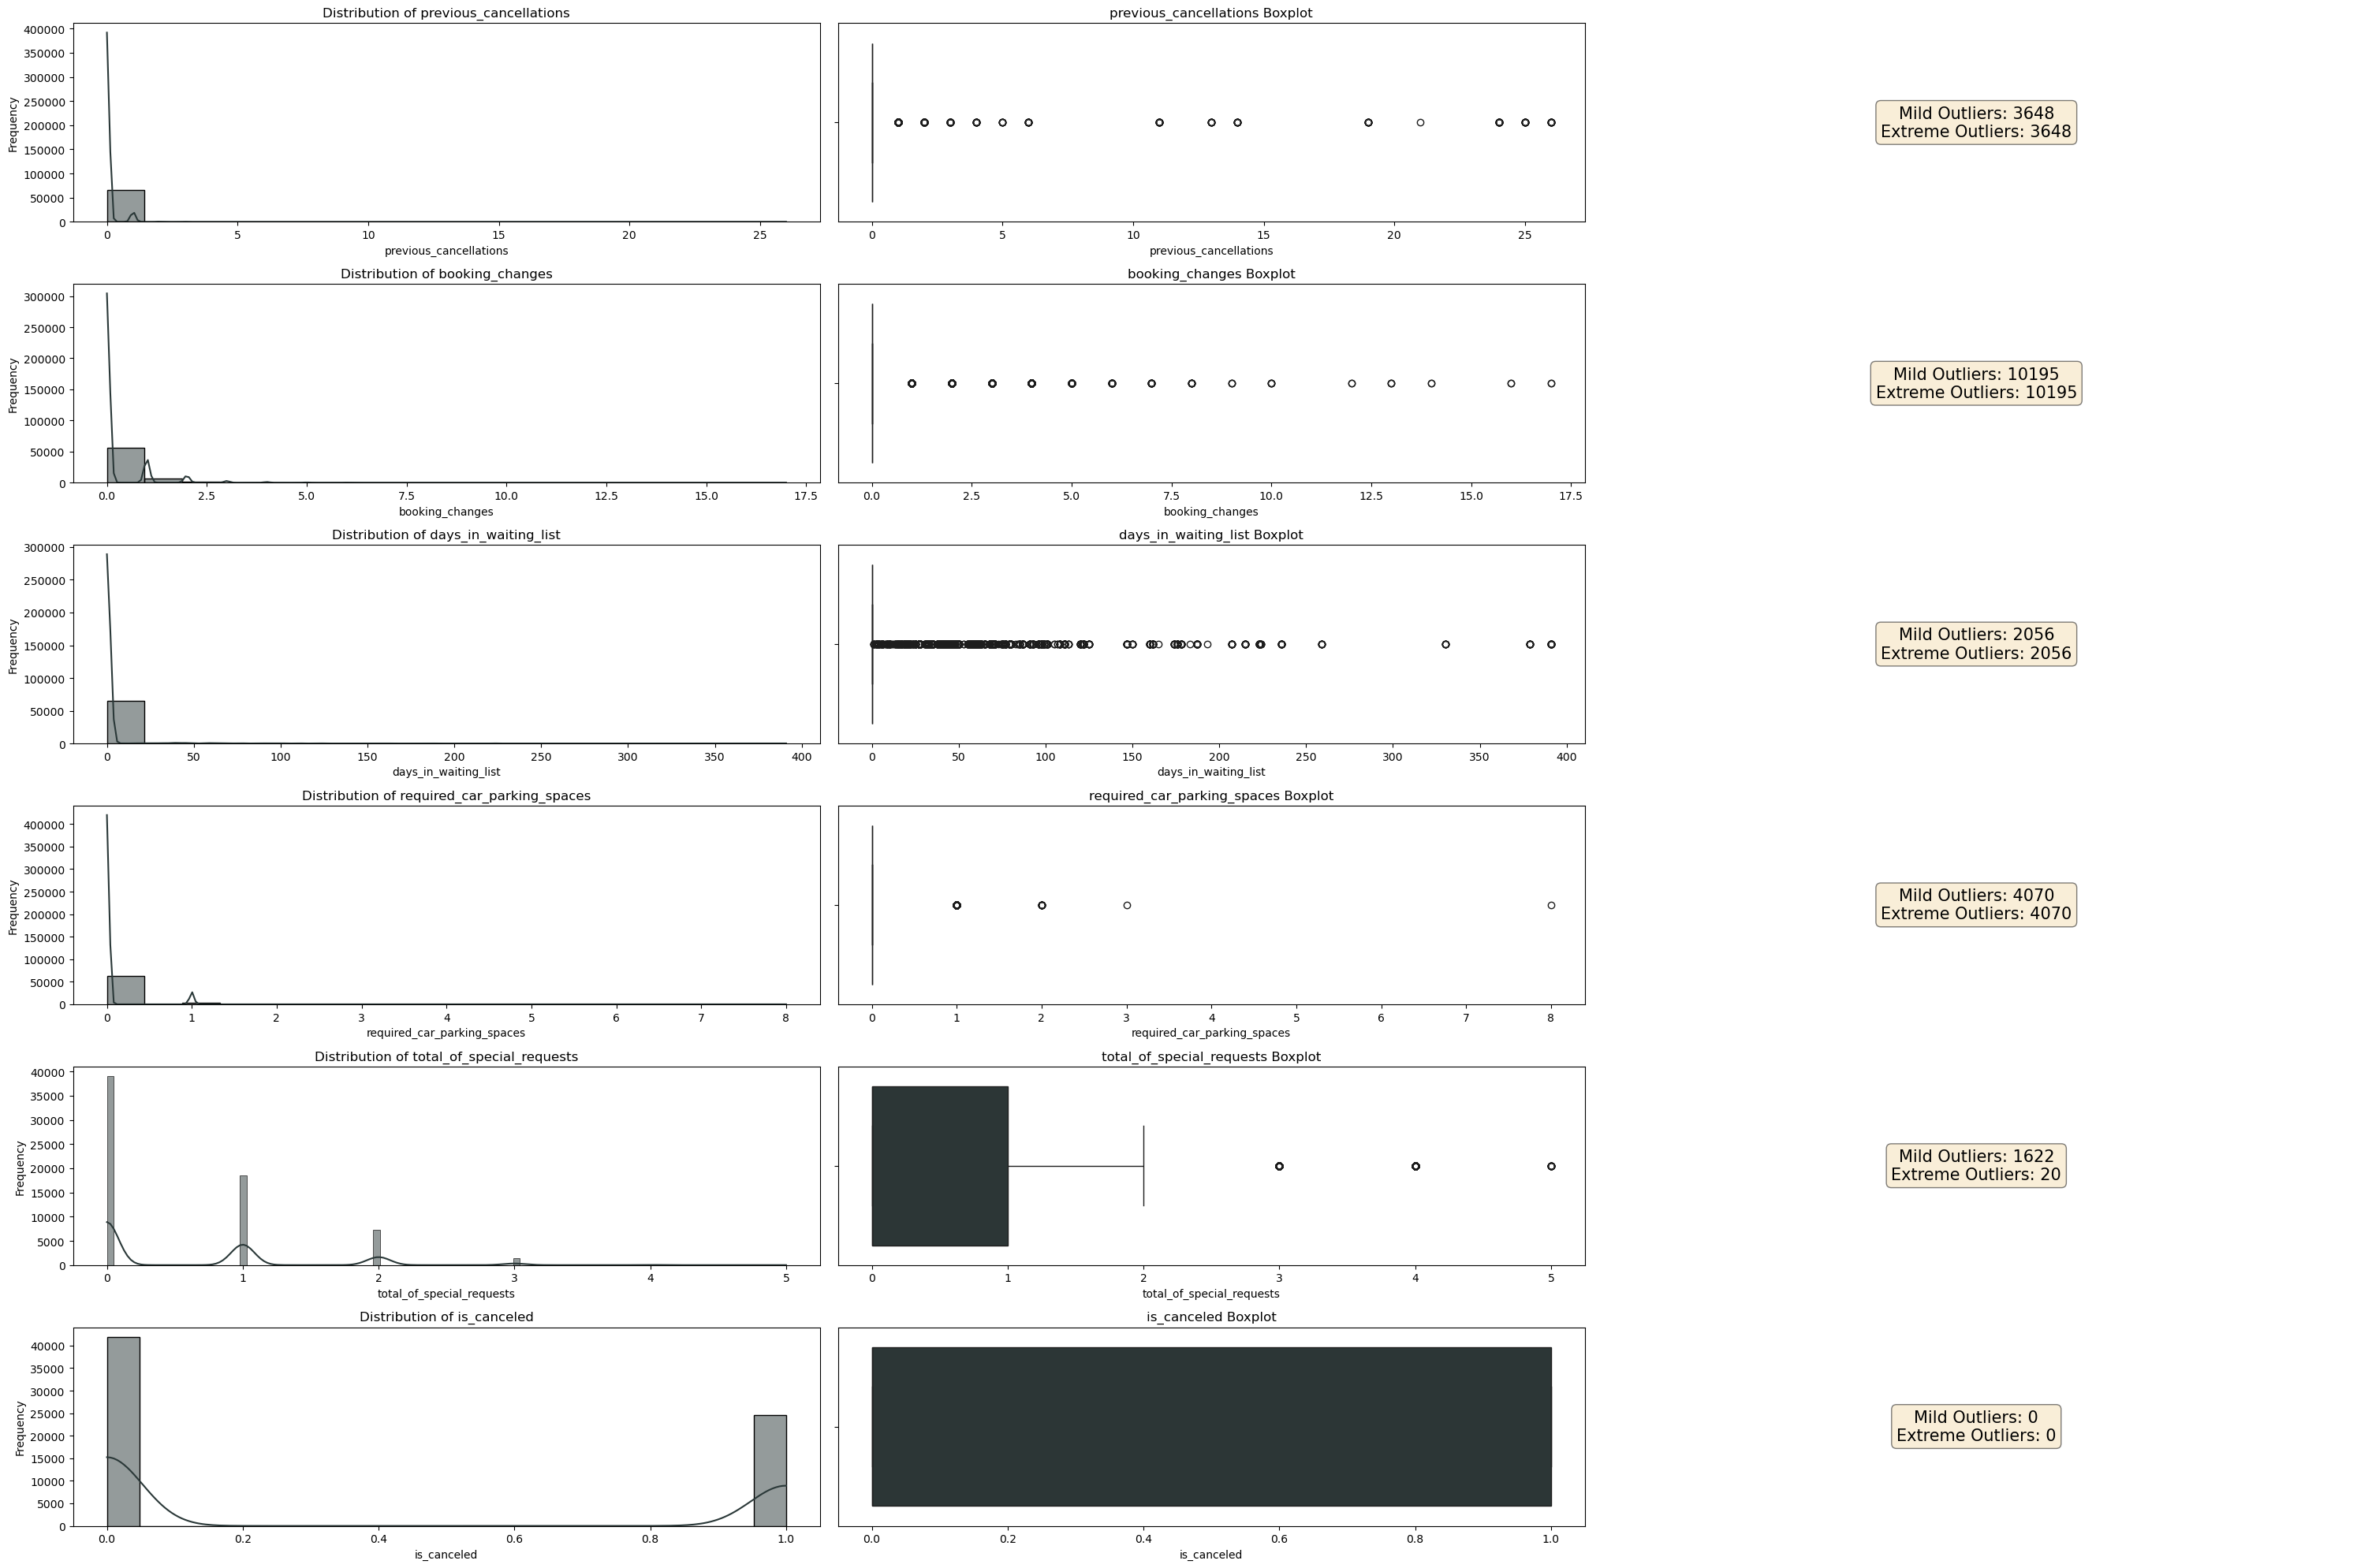

In [15]:
count = 0
fig = plt.figure(figsize=(30, 20))  # Adjust figure size as needed
numeric_columns = df_train.select_dtypes(include=['number'])

# Loop through each column in the dataframe
for col in numeric_columns.columns:
    count += 1

    # Plot the histogram
    plt.subplot(6, 3, count)  
    sns.histplot(numeric_columns[col], kde=True, color='#2A3838')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    count += 1

    # Plot the boxplot
    plt.subplot(6, 3, count)  
    sns.boxplot(x=numeric_columns[col], color='#2A3838')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)

    # Calculate outliers
    Q1 = np.percentile(numeric_columns[col], 25)
    Q3 = np.percentile(numeric_columns[col], 75)
    IQR = Q3 - Q1

    lower_bound_mild = Q1 - 1.5 * IQR
    upper_bound_mild = Q3 + 1.5 * IQR
    lower_bound_extreme = Q1 - 3 * IQR
    upper_bound_extreme = Q3 + 3 * IQR

    mild_outliers = numeric_columns[col][(numeric_columns[col] < lower_bound_mild) | (numeric_columns[col] > upper_bound_mild)]
    extreme_outliers = numeric_columns[col][(numeric_columns[col] < lower_bound_extreme) | (numeric_columns[col] > upper_bound_extreme)]

    count += 1

    # Plot the outlier information
    plt.subplot(6, 3, count)
    outlier_text = (
        f"Mild Outliers: {len(mild_outliers)}\n"
        f"Extreme Outliers: {len(extreme_outliers)}"
    )
    plt.text(
        0.5, 0.5, outlier_text,
        fontsize=15, ha='center', va='center',
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5)
    )
    plt.axis('off')  # Remove the axes for the text subplot

fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Many features have extreme outliers, particularly booking changes, previous cancellations, and waiting list days. The presence of these outliers suggests that while most bookings follow standard patterns, there are occasional cases of high volatility (frequent modifications, long waiting times, or repeat cancellations). The presence of extreme values does not necessarily indicate errors but rather reflects different customer behaviors and booking patterns. Since outliers are not being removed, they remain valuable in understanding variations in customer habits, such as those who frequently cancel, modify, or make long-term reservations. Instead of treating them as anomalies, they can be seen as insights into distinct booking preferences.



### <span style="color:#899481">**6.3 Data Transformation**

Next, we perform data transformation by converting numeric data into categorical data using binning. This process allows us to group continuous numerical values into discrete categories, making it easier to interpret patterns and relationships within the data. By doing so, we can assess whether categorical representations improve model performance compared to using raw numerical values. This step is particularly useful when dealing with skewed distributions or when certain numeric features have non-linear relationships with the target variable. Through binning, we aim to enhance the model's ability to capture meaningful trends while reducing sensitivity to minor fluctuations in the data.









In [16]:
def plot_column(col, df_train):
    fig = plt.figure(figsize=(20, 3))  

    # Plot the histogram
    plt.subplot(1, 3, 1)  
    sns.histplot(df_train[col], kde=True, color='#2A3838')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Plot the boxplot
    plt.subplot(1, 3, 2)  
    sns.boxplot(x=df_train[col], color='#2A3838')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)

    # Calculate outliers
    Q1 = np.percentile(df_train[col], 25)
    Q3 = np.percentile(df_train[col], 75)
    IQR = Q3 - Q1

    lower_bound_mild = Q1 - 1.5 * IQR
    upper_bound_mild = Q3 + 1.5 * IQR
    lower_bound_extreme = Q1 - 3 * IQR
    upper_bound_extreme = Q3 + 3 * IQR

    mild_outliers = df_train[col][(df_train[col] < lower_bound_mild) | (df_train[col] > upper_bound_mild)]
    extreme_outliers = df_train[col][(df_train[col] < lower_bound_extreme) | (df_train[col] > upper_bound_extreme)]

    # Plot the outlier information
    plt.subplot(1, 3, 3)  
    outlier_text = (
        f"Mild Outliers: {len(mild_outliers)}\n"
        f"Extreme Outliers: {len(extreme_outliers)}"
    )
    plt.text(
        0.5, 0.5, outlier_text,
        fontsize=15, ha='center', va='center',
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5)
    )
    plt.axis('off')  # Remove the axes for the text subplot

    fig.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

#### <span style="color:#A67D44">**Previous Cancellations**

- No prev cancellation: previous_cancellations == 0
- Low prev cancellation: previous_cancellations <= 5
- Average prev cancellation: previous_cancellations <= 19                             
- High prev cancellation: previous_cancellations > 19                               

In [17]:
df_train["previous_cancellations"].value_counts()

previous_cancellations
0     62931
1      3391
2        74
3        41
24       28
11       22
4        15
25       14
6        14
26       13
19       11
14       10
13        8
5         6
21        1
Name: count, dtype: int64

In [18]:
df1 = df_train[(df_train["previous_cancellations"] != 0) & (df["previous_cancellations"] != 1)]
df1["previous_cancellations"].describe()

count    257.000000
mean       9.809339
std        9.031554
min        2.000000
25%        2.000000
50%        4.000000
75%       19.000000
max       26.000000
Name: previous_cancellations, dtype: float64

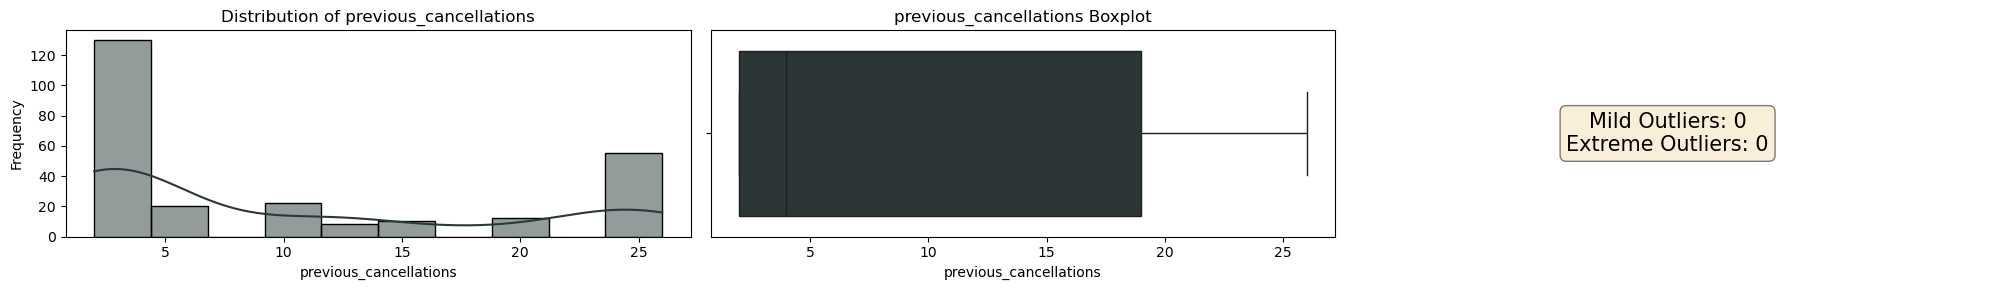

In [19]:
plot_column("previous_cancellations", df1)

In [20]:
import numpy as np

df_train['cat_prev_cancellations'] = np.where(df_train['previous_cancellations'] == 0, 'No prev cancellation', 
                                           np.where(df_train['previous_cancellations'] <= 5, 'Low prev cancellation',
                                                    np.where(df_train['previous_cancellations'] <= 19, 'Average prev cancellation', 'High prev cancellation')))
df_test['cat_prev_cancellations'] = np.where(df_test['previous_cancellations'] == 0, 'No prev cancellation', 
                                           np.where(df_test['previous_cancellations'] <= 5, 'Low prev cancellation',
                                                    np.where(df_test['previous_cancellations'] <= 19, 'Average prev cancellation', 'High prev cancellation')))

df_train["cat_prev_cancellations"].value_counts()

cat_prev_cancellations
No prev cancellation         62931
Low prev cancellation         3527
Average prev cancellation       65
High prev cancellation          56
Name: count, dtype: int64

#### <span style="color:#A67D44">**days_in_waiting_list**

- No waiting list: days_in_waiting_list == 0                                    
- 1-Week WL: days_in_waiting_list <= 7                                    
- 1-Month WL: days_in_waiting_list <= 31                                  
- 3-Months WL: days_in_waiting_list <= 93                                  
- 6-Months WL: days_in_waiting_list <= 176                                
- more than 6-Months WL:days_in_waiting_list > 176                                   

In [21]:
df1 = df_train[(df_train["days_in_waiting_list"] != 0)]
df1["days_in_waiting_list"].describe()

count    2056.000000
mean       76.220817
std        68.361041
min         1.000000
25%        38.000000
50%        57.000000
75%        93.000000
max       391.000000
Name: days_in_waiting_list, dtype: float64

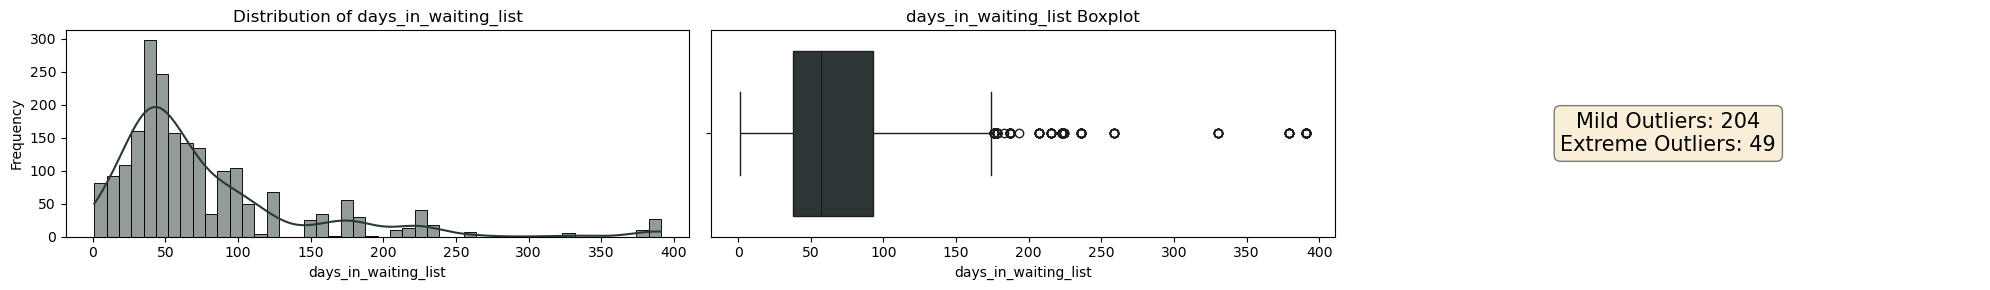

In [22]:
plot_column("days_in_waiting_list", df1)

In [23]:

Q1 = np.percentile(df1["days_in_waiting_list"], 25)
Q3 = np.percentile(df1["days_in_waiting_list"], 75)
IQR = Q3 - Q1

display(Q1, Q3, (Q3 + 1.5*IQR))


38.0

93.0

175.5

In [24]:
df1[df1["days_in_waiting_list"] > 175.5]["days_in_waiting_list"].value_counts().sort_index(ascending=False)

days_in_waiting_list
391    26
379    10
330     6
259     7
236    18
224     4
223    36
215    13
207    10
193     1
187    29
183     1
178    19
176    24
Name: count, dtype: int64

In [25]:
df1[df1["days_in_waiting_list"] < 38]["days_in_waiting_list"].value_counts().sort_index(ascending=True)

days_in_waiting_list
1      5
2      2
3     32
4     16
5      5
6     10
7      1
8      2
9      8
10    13
11     2
12     1
13     2
14     6
15    35
16     3
17    30
18     3
19    17
20    17
21    19
22    33
23     2
24     7
25    11
27    13
28    27
30     1
31    77
32     9
33    18
34    15
35    54
Name: count, dtype: int64

In [26]:
import numpy as np

df_train['cat_waiting_list'] = np.where(df_train['days_in_waiting_list'] == 0, 'No waiting list',
                                                    np.where(df_train['days_in_waiting_list'] <= 31, '1-Month WL',
                                                                      np.where(df_train['days_in_waiting_list'] <= 93, '3-Months WL',
                                                                               np.where(df_train['days_in_waiting_list'] <= 176, '6-Months WL', '>6-Months WL'))))
df_test['cat_waiting_list'] = np.where(df_test['days_in_waiting_list'] == 0, 'No waiting list',
                                                    np.where(df_test['days_in_waiting_list'] <= 31, '1-Month WL',
                                                                      np.where(df_test['days_in_waiting_list'] <= 93, '3-Months WL',
                                                                               np.where(df_test['days_in_waiting_list'] <= 176, '6-Months WL', '>6-Months WL'))))

df_train["cat_waiting_list"].value_counts()

cat_waiting_list
No waiting list    64523
3-Months WL         1154
1-Month WL           400
6-Months WL          322
>6-Months WL         180
Name: count, dtype: int64

#### <span style="color:#A67D44">**required_car_parking_spaces**

- No parking space: required_car_parking_spaces == 0                    
- Need parking space: required_car_parking_spaces >= 0                    

In [27]:
df1 = df_train[(df_train["required_car_parking_spaces"] != 0)]
df1["required_car_parking_spaces"].value_counts()

required_car_parking_spaces
1    4052
2      16
3       1
8       1
Name: count, dtype: int64

In [28]:
import numpy as np

df_train['cat_parking'] = np.where(df_train['required_car_parking_spaces'] == 0, 'No parking need', 'Need parking space')
df_test['cat_parking'] = np.where(df_test['required_car_parking_spaces'] == 0, 'No parking need', 'Need parking space')

df_train["cat_parking"].value_counts()

cat_parking
No parking need       62509
Need parking space     4070
Name: count, dtype: int64

#### <span style="color:#A67D44">**total_of_special_requests**

- No waiting list: Total_of_special_requests == 0                          
- 1-Week WL: Total_of_special_requests >= 0                          

In [29]:
df1 = df_train[(df_train["total_of_special_requests"] != 0)]
df1["total_of_special_requests"].describe()

count    27472.000000
mean         1.390725
std          0.625265
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

In [30]:
df1["total_of_special_requests"].value_counts()

total_of_special_requests
1    18589
2     7261
3     1413
4      189
5       20
Name: count, dtype: int64

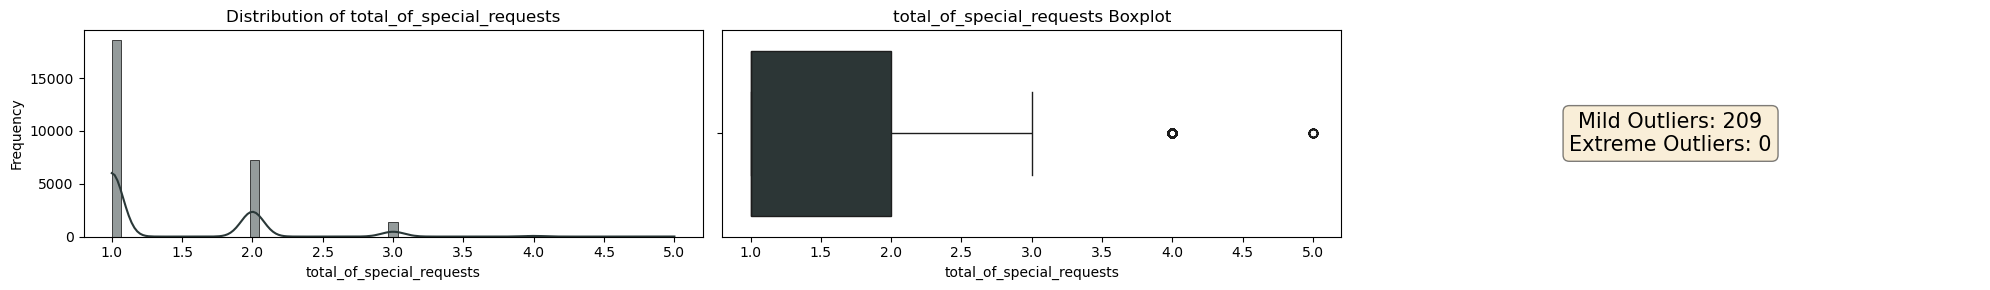

In [31]:
plot_column("total_of_special_requests", df1)

In [32]:
import numpy as np

df_train['cat_requests'] = np.where(df_train['total_of_special_requests'] == 0, 'No request', 
                                           np.where(df_train['total_of_special_requests'] <= 2, 'Average requests', 'High requests'))
df_test['cat_requests'] = np.where(df_test['total_of_special_requests'] == 0, 'No request', 
                                           np.where(df_test['total_of_special_requests'] <= 2, 'Average requests', 'High requests'))


df_train["cat_requests"].value_counts()

cat_requests
No request          39107
Average requests    25850
High requests        1622
Name: count, dtype: int64

In [33]:
df_train.to_csv("fixed_df_train.csv")

### <span style="color:#899481">**6.4 EDA**

Below, we can see the distribution of cancellation status, where 37% of bookings were cancelled and 63% were not cancelled. This indicates an imbalance in the dataset, which could impact the performance of predictive models by causing them to favor the majority class (non-cancelled bookings).

To address this, we may need to apply resampling techniques, such as oversampling the cancelled class or undersampling the non-cancelled class, to ensure the model learns patterns from both classes more effectively.

Text(0.5, 1.0, 'Distribution of Cancellations')

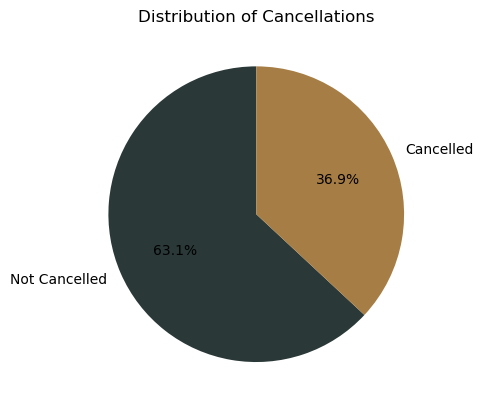

In [ ]:
cancellations_dist = df_train['is_canceled'].value_counts()
custom_colors = ['#2A3838', '#A67D44']
plt.pie(cancellations_dist, labels=["Not Cancelled", "Cancelled"], autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Distribution of Cancellations')

Below, we can observe the distribution of the transformed categorical variable in relation to the cancellation status. This helps us understand whether different levels of previous cancellations have any correlation with the likelihood of a new cancellation.

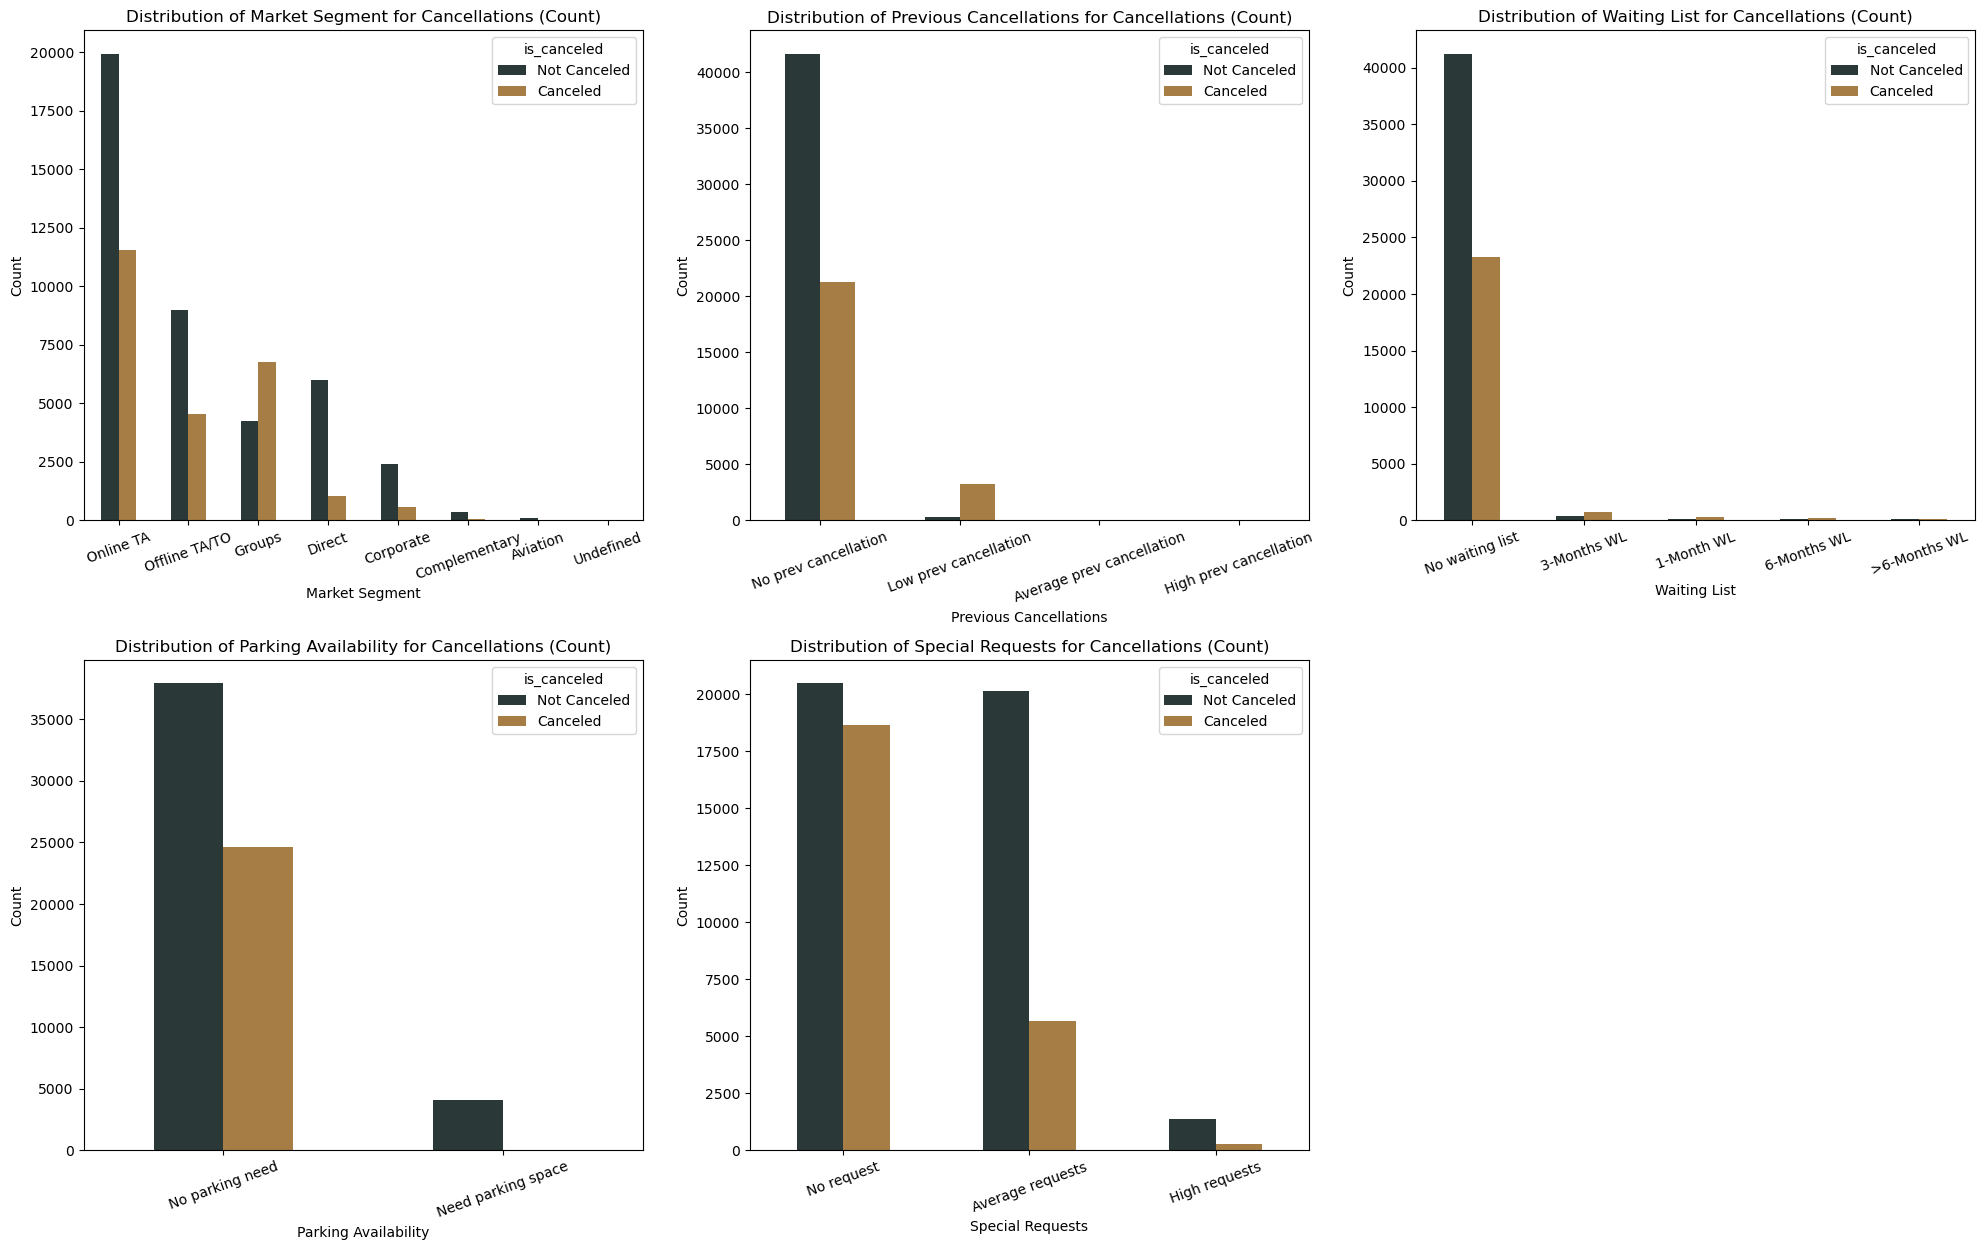

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

columns = ['market_segment', 'cat_prev_cancellations', 'cat_waiting_list', 'cat_parking', 'cat_requests']

plt.figure(figsize=(20, 18))  
custom_colors = ["#2A3838", "#A67D44"]

label_rename_map = {
    'market_segment': 'Market Segment',
    'cat_prev_cancellations': 'Previous Cancellations',
    'cat_waiting_list': 'Waiting List',
    'cat_parking': 'Parking Availability',
    'cat_requests': 'Special Requests',
    0: 'Not Canceled',
    1: 'Canceled'
}

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    
    category_counts = df_train.groupby([col, 'is_canceled']).size().unstack(fill_value=0)
    
    category_counts['total'] = category_counts.sum(axis=1)  # Add a column for total counts
    category_counts = category_counts.sort_values(by='total', ascending=False)  # Sort by total counts
    category_counts.drop('total', axis=1, inplace=True)  # Remove the 'total' column after sorting
    
    category_counts.index = category_counts.index.map(lambda x: label_rename_map.get(x, x))  # Rename index categories
    category_counts.columns = category_counts.columns.map(lambda x: label_rename_map.get(x, x))  # Rename columns

    ax = category_counts.plot(kind='bar', ax=plt.gca(), color=custom_colors, stacked=False)
    
    plt.title(f'Distribution of {label_rename_map.get(col, col)} for Cancellations (Count)')
    plt.xlabel(label_rename_map.get(col, col))
    plt.ylabel('Count')
    plt.xticks(rotation=20)  

plt.tight_layout()
plt.show()


Before proceeding with modeling, we first analyze the correlation between numeric variables to identify potential multicollinearity issues. Multicollinearity occurs when two or more independent variables are highly correlated, which can negatively impact model performance by making it difficult to determine the individual effect of each variable.

Upon examining the correlation matrix, we observe that there is no significant multicollinearity among the numeric variables. This indicates that all numeric features can be used in modeling without major concerns regarding redundancy or distortion in the model’s interpretation.

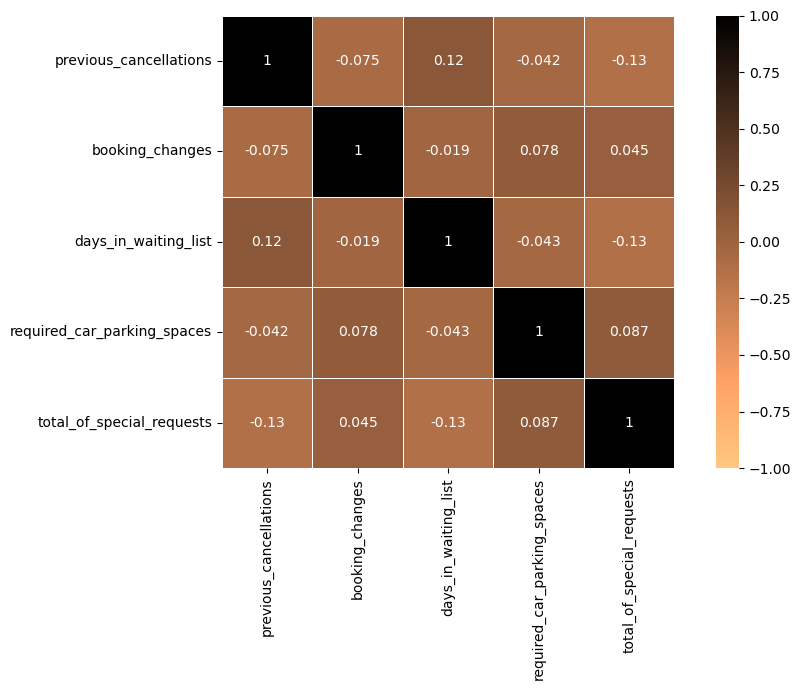

In [36]:
corr = df_train.drop('is_canceled',axis=1).select_dtypes(include='number').corr('spearman')
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='copper_r', annot=True, center=0, vmin=-1, square=True, linewidths=.5)
plt.tight_layout()
plt.show()

---

## <span style="color:#2A3838">**07. Modeling**

In [37]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,FunctionTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression, f_classif
from sklearn.metrics import RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek


import time

### <span style="color:#899481">**7.1 Without Hyperparameter Tuning**

Now, we proceed with modeling **without hyperparameter tuning and without addressing potential multicollinearity between numeric and categorical data**. At this stage, the focus is on establishing a baseline model to evaluate its initial performance before applying further optimizations. Ignoring multicollinearity at this point allows us to observe how the model behaves with all available features without introducing additional complexity. Later, we can refine the model by tuning hyperparameters and addressing any issues related to feature dependencies to improve overall performance.

Before supplying both numerical and categorical features to various classifiers, we employ a preprocessing pipeline in this modelling technique. To guarantee that every data type is transformed correctly, the ColumnTransformer is used:

- **RobustScaler()**, which scales the data while being resilient to outliers, was used to process the **numerical features**.
- **OneHotEncoder()**, encode **categorical features** with handle_unknown='ignore' to avoid problems with unseen categories in test data and drop='first' to prevent multicollinearity.

After preprocessing, the model selection step is performed using param_grid, which defines different resampling methods and classifiers to test. The classifiers included in the grid are:

- **Logistic regression**: A straightforward but powerful baseline model that forecasts probabilities using a weighted combination of input features. It functions best with linearly separable data.
- **K-Nearest Neighbours (KNN)**: Groups data points according to the majority class of their closest neighbours. When comparable data points are near to one another in feature space, it performs well.
- **Random Forest**: A group of several decision trees that average their results to generate predictions. Accuracy is increased and overfitting is decreased.
- **Decision Tree**: A model that creates a structure resembling a tree by dividing data at critical points according to feature values. It is simple to understand, but if it is overly complicated, it may overfit.
- **XGBoost** A boosting technique that generates trees in a sequential fashion, fixing the errors of the previous tree with each new one. It is renowned for its precision and speed.
- **LightGBM**: LightGBM builds trees in a manner that prioritises significant splits, making it faster while preserving performance. It is comparable to XGBoost but is tailored for huge datasets.


In [38]:
X_train = df_train.drop(["is_canceled","country"],axis=1)
y_train = df_train["is_canceled"]

X_test = df_test.drop(["is_canceled","country"],axis=1)
y_test = df_test["is_canceled"]

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, fbeta_score, make_scorer, RocCurveDisplay


categorical_features1 = ["market_segment", "deposit_type", "customer_type", "reserved_room_type", "cat_waiting_list"]
numeric_columns = X_train.select_dtypes(include= 'number').columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num",RobustScaler(), numeric_columns),
        ("cat", OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features1),
        ("or1", OrdinalEncoder(categories=[['No prev cancellation', 'Low prev cancellation', 'Average prev cancellation', 'High prev cancellation']]), ["cat_prev_cancellations"]),
        ("or2", OrdinalEncoder(categories=[['No parking need', 'Need parking space']]), ["cat_parking"]),
        ("or3", OrdinalEncoder(categories=[['No request', 'Average requests', 'High requests']]), ["cat_requests"])
    ],
    remainder="passthrough"  # Keep any remaining columns as they are
)


In [40]:
from imblearn.pipeline import Pipeline as ImbPipeline 

resampling_methods = [
    ('none', None),
    ('smote', SMOTE(random_state=42)),
    ('oversample', RandomOverSampler(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42))
]

param_grid = [
    {
        'resampler': [method[1] for method in resampling_methods],
        'classifier': [
            LogisticRegression(random_state=42),
            KNeighborsClassifier(),
            RandomForestClassifier(random_state=42),
            DecisionTreeClassifier(random_state=42),
            XGBClassifier(random_state=2020),
            LGBMClassifier(random_state=42)
        ],
    },
]

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('resampler', None), 
    ('classifier', LogisticRegression()),
])

# Define the scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Create two GridSearchCV objects
gscv_f1_wo_tuning = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f1_scorer)
gscv_f2_wo_tuning = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer)

# Measure fitting time for F1-score
start_time_f1 = time.time()
gscv_f1_wo_tuning.fit(X_train, y_train)
end_time_f1 = time.time()
fitting_time_f1 = end_time_f1 - start_time_f1
print(f"Fitting time for F1-score: {fitting_time_f1:.2f} seconds")

# Measure fitting time for F2-score
start_time_f2 = time.time()
gscv_f2_wo_tuning.fit(X_train, y_train)
end_time_f2 = time.time()
fitting_time_f2 = end_time_f2 - start_time_f2
print(f"Fitting time for F2-score: {fitting_time_f2:.2f} seconds")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[LightGBM] [Info] Number of positive: 19672, number of negative: 33591
[LightGBM] [Info] Number of positive: 19672, number of negative: 33591
[LightGBM] [Info] Number of positive: 19672, number of negative: 33591
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 53263, number of used features: 30[LightGBM] [Info] Number of data points in the train set: 53263, number of used features: 30

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369337 -> initscore=-0.535062
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369337 -> initsco

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Number of positive: 33591, number of negative: 33591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of positive: 33591, number of negative: 33591
[LightGBM] [Info] Number of data points in the train set: 67182, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 67182, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 67184, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 19672, number of negative: 19672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 39344, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Number of positive: 19672, number of negative: 19672
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 39344, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 19672, number of negative: 19672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 39344, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 19672, number of negat

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting time for F1-score: 81.56 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

[LightGBM] [Info] Number of positive: 19672, number of negative: 33591
[LightGBM] [Info] Number of positive: 19672, number of negative: 33591
[LightGBM] [Info] Number of positive: 19672, number of negative: 33591
[LightGBM] [Info] Number of positive: 19672, number of negative: 33591
[LightGBM] [Info] Number of positive: 19672, number of negative: 33592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.575569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 53263, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369337 -> initscore=-0.535062
[LightGBM] [Info] Start training from score -0.535062
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.465227 seconds.
You can set `force_row_wise=true` to remove the overhea

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Number of positive: 33591, number of negative: 33591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 67182, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33591, number of negative: 33591
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 67182, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33591, number of negat

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Number of positive: 33591, number of negative: 33591
[LightGBM] [Info] Number of positive: 33591, number of negative: 33591
[LightGBM] [Info] Number of positive: 33591, number of negative: 33591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.137123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 67182, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 67182, number of used features: 30
[Lig

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Number of positive: 19672, number of negative: 19672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 39344, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Number of positive: 19672, number of negative: 19672
[LightGBM] [Info] Number of positive: 19672, number of negative: 19672
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 39344, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 39344, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting time for F2-score: 59.10 seconds


In [41]:
print("Best F1-score:", gscv_f1_wo_tuning.best_score_)
best_model_wo_tuning_f1 = gscv_f1_wo_tuning.best_estimator_
display(best_model_wo_tuning_f1)

print("Best F2-score:", gscv_f2_wo_tuning.best_score_)
best_model_wo_tuning_f2 = gscv_f2_wo_tuning.best_estimator_
display(best_model_wo_tuning_f2)



Best F1-score: 0.7016230056267048


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_seg...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=2020, ...))])

Best F2-score: 0.6666774487519311


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_seg...
                                                                              'cancellation']]),
                                                  ['cat_prev_cancellations']),
                                                 ('or2',
                                                  OrdinalEncoder(categories=[['No '
                                                                              'parking '
                                                                              'need',
                                                                              'Need '
                                                                              'parking '
                                                                              'space']]),
                                                  ['cat_parking']),
                                                 ('or3',
                                                  OrdinalEncoder(categories=[['No '
                                                                              'request',
                                                                              'Average '
                                                                              'requests',
                                                                              'High '
                                                                              'requests']]),
                                                  ['cat_requests'])])),
                ('resampler', RandomUnderSampler(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [42]:
list_wo_tuning_f1 = pd.DataFrame(gscv_f1_wo_tuning.cv_results_).sort_values('rank_test_score')
list_wo_tuning_f2 = pd.DataFrame(gscv_f2_wo_tuning.cv_results_).sort_values('rank_test_score')

list_wo_tuning_f1.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       0.993854      0.115801         0.231973        0.064175   
17       6.129100      0.655776         0.164355        0.042040   
9        9.206140      0.693670         0.501381        0.211037   
22       8.218753      0.290278         0.090590        0.029277   
21      11.061953      0.798355         0.088291        0.027379   

                                     param_classifier  \
19  XGBClassifier(base_score=None, booster=None, c...   
17  XGBClassifier(base_score=None, booster=None, c...   
9             RandomForestClassifier(random_state=42)   
22                    LGBMClassifier(random_state=42)   
21                    LGBMClassifier(random_state=42)   

                        param_resampler  \
19  RandomUnderSampler(random_state=42)   
17               SMOTE(random_state=42)   
9                SMOTE(random_state=42)   
22   RandomOverSampler(random_state=42)   
21               SMOTE(random_state=42)   

                                               params  split0_test_score  \
19  {'classifier': XGBClassifier(base_score=None, ...           0.696146   
17  {'classifier': XGBClassifier(base_score=None, ...           0.695779   
9   {'classifier': RandomForestClassifier(random_s...           0.694565   
22  {'classifier': LGBMClassifier(random_state=42)...           0.695056   
21  {'classifier': LGBMClassifier(random_state=42)...           0.695408   

    split1_test_score  split2_test_score  split3_test_score  \
19           0.705986           0.703741           0.702130   
17           0.705316           0.704938           0.702798   
9            0.704185           0.703338           0.703239   
22           0.703733           0.703321           0.702282   
21           0.703604           0.703237           0.703241   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
19           0.700111         0.701623        0.003349                1  
17           0.698733         0.701513        0.003700                2  
9            0.699053         0.700876        0.003626                3  
22           0.699632         0.700805        0.003210                4  
21           0.698452         0.700788        0.003297                5

In [43]:
list_wo_tuning_f2.head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11       2.315143      0.082242         0.185257        0.027640   
19       0.663940      0.131419         0.095723        0.016742   
15       0.463911      0.162036         0.070318        0.037876   
9        6.629374      0.250121         0.250280        0.061021   
10       4.131278      0.225478         0.232831        0.085538   

                                     param_classifier  \
11            RandomForestClassifier(random_state=42)   
19  XGBClassifier(base_score=None, booster=None, c...   
15            DecisionTreeClassifier(random_state=42)   
9             RandomForestClassifier(random_state=42)   
10            RandomForestClassifier(random_state=42)   

                        param_resampler  \
11  RandomUnderSampler(random_state=42)   
19  RandomUnderSampler(random_state=42)   
15  RandomUnderSampler(random_state=42)   
9                SMOTE(random_state=42)   
10   RandomOverSampler(random_state=42)   

                                               params  split0_test_score  \
11  {'classifier': RandomForestClassifier(random_s...           0.659819   
19  {'classifier': XGBClassifier(base_score=None, ...           0.658394   
15  {'classifier': DecisionTreeClassifier(random_s...           0.658879   
9   {'classifier': RandomForestClassifier(random_s...           0.656125   
10  {'classifier': RandomForestClassifier(random_s...           0.654566   

    split1_test_score  split2_test_score  split3_test_score  \
11           0.672646           0.662803           0.675338   
19           0.670422           0.664516           0.672132   
15           0.670583           0.661038           0.674520   
9            0.667424           0.666989           0.673829   
10           0.667199           0.661889           0.673185   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
11           0.662782         0.666677        0.006129                1  
19           0.661777         0.665448        0.005168                2  
15           0.660485         0.665101        0.006250                3  
9            0.661006         0.665074        0.006041                4  
10           0.662362         0.663840        0.006174                5

### <span style="color:#899481">**7.2 With Hyperparameter Tuning**

The top-performing models based on initial results are **Random Forest, XGBoost, and Decision Tree**, which are well-suited for handling structured data and capturing complex patterns. These models excel in predictive tasks due to their ability to manage non-linearity and interactions between features.

Additionally, **Logistic Regression** is also included, despite not being among the top five. This is likely because it serves as a strong baseline model, offering interpretability and a simpler approach compared to tree-based methods. Including Logistic Regression provides a useful comparison to understand how much improvement is gained from more complex models.

To evaluate the models comprehensively, both **F1-score and F2-score** are used as performance metrics. **The F1-score balances precision and recall equally**, making it suitable for general classification tasks. Meanwhile, the **F2-score places more emphasis on recall, prioritizing correct identification of positive cases over precision**. This dual evaluation helps determine which model is best depending on whether precision or recall is'/ more critical for the task.

We experiment with two different feature sets to assess the impact of feature transformation and potential multicollinearity between numeric and categorical data.

- Model 1 uses raw numerical features, with X_train consisting of:
    `market_segment`, `previous_cancellations`, `booking_changes`, `deposit_type`, `days_in_waiting_list`, `customer_type`, `reserved_room_type`, `required_car_parking_spaces`, `total_of_special_requests`.
    This model retains numerical variables in their original form, allowing us to see how well the model performs without categorical transformations.


- Model 2 incorporates transformed categorical features, with X_train2 consisting of:
    `market_segment`, `booking_changes`, `deposit_type`, `customer_type`, `reserved_room_type`, `cat_prev_cancellations`, `cat_waiting_list`, `cat_parking`, `cat_requests`.
    Here, numerical features with potential multicollinearity are replaced with their binned categorical versions, helping us evaluate whether feature transformation improves model performance.
    
By comparing these models, we assess whether addressing multicollinearity and transforming numerical features into categorical bins lead to better predictive accuracy and generalization.
l8^†¨ƒ•¨ø'/
?|







#### <span style="color:darksalmon">**7.2.1 Model 1**

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

X_train = df_train[['market_segment', 'previous_cancellations', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'reserved_room_type', 'required_car_parking_spaces', 'total_of_special_requests']]
y_train = df_train["is_canceled"]

X_test = df_test[['market_segment', 'previous_cancellations', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'reserved_room_type', 'required_car_parking_spaces', 'total_of_special_requests']]
y_test = df_test["is_canceled"]

categorical_features1 = ["market_segment", "deposit_type", "customer_type", "reserved_room_type"]
numeric_columns = X_train.select_dtypes(include= 'number').columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num",RobustScaler(), numeric_columns),
        ("cat", OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features1)
    ],
    remainder="passthrough"  # Keep any remaining columns as they are
)

##### <span style="color:#A67D44">**Logistic Regression**

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure X_train and y_train have matching indices
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to DataFrame if needed
if not isinstance(X_train_processed, pd.DataFrame):
    X_train_processed = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())

if not isinstance(X_test_processed, pd.DataFrame):
    X_test_processed = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())

# Reset index to ensure alignment
X_train_processed = X_train_processed.reset_index(drop=True)
X_test_processed = X_test_processed.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Compute VIF
def calculate_vif(X, threshold=5.0):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print("VIF Data Before Filtering:\n", vif_data)  # Debugging

    # Pastikan tidak menghapus semua kolom
    selected_features = vif_data[vif_data["VIF"] < threshold]["Feature"].tolist()
    if not selected_features:
        raise ValueError("All features were removed by VIF filtering. Consider increasing the threshold.")

    print("Selected features after VIF filtering:", selected_features)  # Debugging
    return X[selected_features]


X_train_vif = calculate_vif(X_train_processed, threshold=10)
X_test_vif = calculate_vif(X_test_processed, threshold=10)

VIF Data Before Filtering:
                                Feature        VIF
0          num__previous_cancellations   1.036009
1                 num__booking_changes   1.166365
2            num__days_in_waiting_list   1.060413
3     num__required_car_parking_spaces   1.123928
4       num__total_of_special_requests   1.913341
5    cat__market_segment_Complementary   1.203939
6        cat__market_segment_Corporate   2.294735
7           cat__market_segment_Direct   4.403684
8           cat__market_segment_Groups   6.377123
9    cat__market_segment_Offline TA/TO   6.305155
10       cat__market_segment_Online TA  15.737868
11       cat__market_segment_Undefined   1.002260
12        cat__deposit_type_Non Refund   2.113848
13        cat__deposit_type_Refundable   1.009591
14            cat__customer_type_Group   1.143745
15        cat__customer_type_Transient  22.312523
16  cat__customer_type_Transient-Party   7.148429
17           cat__reserved_room_type_B   1.032274
18           cat__rese

In [46]:
# Define the resampling methods
resampling_methods = [
    ('oversample', RandomOverSampler(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('smote', SMOTE(random_state=42))
]

# Create the pipeline with a placeholder for resampling
pipeline = ImbPipeline(steps=[
    ("resampling", RandomOverSampler(random_state=42)),  # Default resampling placeholder
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', LogisticRegression())  # Placeholder classifier
])

param_grid = [
    {
        'resampling': [method for _, method in resampling_methods],
        'classifier__C': [0.01, 0.1, 1, 10], 
        'classifier__penalty': ['l1', 'l2'],
        'feature_selection__k': [20, 25, 30, 'all'],  
        'classifier': [LogisticRegression(max_iter=1000, random_state=2020)],
        'classifier__solver': ['lbfgs', 'liblinear']
    }
]

# Define the scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Create two GridSearchCV objects
gscv_f1 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f1_scorer)
gscv_f2 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer)

# Measure fitting time for F1-score
start_time_f1 = time.time()
gscv_f1.fit(X_train_vif, y_train)
end_time_f1 = time.time()
fitting_time_f1 = end_time_f1 - start_time_f1
print(f"Fitting time for F1-score: {fitting_time_f1:.2f} seconds")

# Measure fitting time for F2-score
start_time_f2 = time.time()
gscv_f2.fit(X_train_vif, y_train)
end_time_f2 = time.time()
fitting_time_f2 = end_time_f2 - start_time_f2
print(f"Fitting time for F2-score: {fitting_time_f2:.2f} seconds")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=25 is greater than n_features=24. All the features will be returned.
  warnings.warn(
/opt/anaconda3/li

Fitting time for F1-score: 138.10 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=25 is greater than n_features=24. All the features will be returned.
  warnings.warn(
/opt/anaconda3/li

Fitting time for F2-score: 125.36 seconds


In [47]:
print("Best F1-score:", gscv_f1.best_score_)
best_model_logreg_f1 = gscv_f1.best_estimator_
display(best_model_logreg_f1)

print("Best F2-score:", gscv_f2.best_score_)
best_model_logreg_f2 = gscv_f2.best_estimator_
display(best_model_logreg_f2)



Best F1-score: 0.6860484620049915


Pipeline(steps=[('resampling', RandomUnderSampler(random_state=42)),
                ('feature_selection', SelectKBest(k=25)),
                ('classifier',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    random_state=2020, solver='liblinear'))])

Best F2-score: 0.678248267838131


Pipeline(steps=[('resampling', RandomOverSampler(random_state=42)),
                ('feature_selection', SelectKBest(k=25)),
                ('classifier',
                 LogisticRegression(C=10, max_iter=1000, random_state=2020))])

In [48]:
logreg_model_list_f1 = pd.DataFrame(gscv_f1.cv_results_).sort_values('rank_test_score').head(5)
logreg_model_list_f2 = pd.DataFrame(gscv_f2.cv_results_).sort_values('rank_test_score').head(5)

display(logreg_model_list_f1, logreg_model_list_f2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
64        0.106767      0.021720         0.007590        0.002043   
67        0.066716      0.007525         0.005892        0.002610   
70        0.211550      0.072643         0.010326        0.003434   
162       0.247692      0.049609         0.006005        0.002424   
165       0.114892      0.010899         0.007067        0.002598   

                                      param_classifier  param_classifier__C  \
64   LogisticRegression(max_iter=1000, random_state...                  0.1   
67   LogisticRegression(max_iter=1000, random_state...                  0.1   
70   LogisticRegression(max_iter=1000, random_state...                  0.1   
162  LogisticRegression(max_iter=1000, random_state...                 10.0   
165  LogisticRegression(max_iter=1000, random_state...                 10.0   

    param_classifier__penalty param_classifier__solver  \
64                         l1                liblinear   
67                         l1                liblinear   
70                         l1                liblinear   
162                        l1                liblinear   
165                        l1                liblinear   

    param_feature_selection__k                     param_resampling  \
64                          25  RandomUnderSampler(random_state=42)   
67                          30  RandomUnderSampler(random_state=42)   
70                         all  RandomUnderSampler(random_state=42)   
162                         30   RandomOverSampler(random_state=42)   
165                        all   RandomOverSampler(random_state=42)   

                                                params  split0_test_score  \
64   {'classifier': LogisticRegression(max_iter=100...            0.68260   
67   {'classifier': LogisticRegression(max_iter=100...            0.68260   
70   {'classifier': LogisticRegression(max_iter=100...            0.68260   
162  {'classifier': LogisticRegression(max_iter=100...            0.68179   
165  {'classifier': LogisticRegression(max_iter=100...            0.68179   

     split1_test_score  split2_test_score  split3_test_score  \
64            0.690179           0.688100           0.683099   
67            0.690179           0.688100           0.683099   
70            0.690179           0.688100           0.683099   
162           0.688768           0.688827           0.683114   
165           0.688768           0.688827           0.683114   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
64            0.686264         0.686048        0.002895                1  
67            0.686264         0.686048        0.002895                1  
70            0.686264         0.686048        0.002895                1  
162           0.687578         0.686015        0.002973                4  
165           0.687578         0.686015        0.002973                4

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
171       1.638215      0.190642         0.013562        0.006982   
174       1.601247      0.265565         0.021185        0.005740   
177       3.090899      0.446453         0.024699        0.015929   
165       0.124429      0.028381         0.007275        0.002593   
159       0.350412      0.134081         0.015535        0.006607   

                                      param_classifier  param_classifier__C  \
171  LogisticRegression(max_iter=1000, random_state...                 10.0   
174  LogisticRegression(max_iter=1000, random_state...                 10.0   
177  LogisticRegression(max_iter=1000, random_state...                 10.0   
165  LogisticRegression(max_iter=1000, random_state...                 10.0   
159  LogisticRegression(max_iter=1000, random_state...                 10.0   

    param_classifier__penalty param_classifier__solver  \
171                        l2                    lbfgs   
174                        l2                    lbfgs   
177                        l2                    lbfgs   
165                        l1                liblinear   
159                        l1                liblinear   

    param_feature_selection__k                    param_resampling  \
171                         25  RandomOverSampler(random_state=42)   
174                         30  RandomOverSampler(random_state=42)   
177                        all  RandomOverSampler(random_state=42)   
165                        all  RandomOverSampler(random_state=42)   
159                         25  RandomOverSampler(random_state=42)   

                                                params  split0_test_score  \
171  {'classifier': LogisticRegression(max_iter=100...           0.672319   
174  {'classifier': LogisticRegression(max_iter=100...           0.672319   
177  {'classifier': LogisticRegression(max_iter=100...           0.672319   
165  {'classifier': LogisticRegression(max_iter=100...           0.672303   
159  {'classifier': LogisticRegression(max_iter=100...           0.672303   

     split1_test_score  split2_test_score  split3_test_score  \
171           0.683397            0.68125           0.675111   
174           0.683397            0.68125           0.675111   
177           0.683397            0.68125           0.675111   
165           0.683574            0.68125           0.675177   
159           0.683574            0.68125           0.675177   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
171           0.679164         0.678248        0.004034                1  
174           0.679164         0.678248        0.004034                1  
177           0.679164         0.678248        0.004034                1  
165           0.677413         0.677943        0.004059                4  
159           0.677413         0.677943        0.004059                4

##### <span style="color:#A67D44">**XGBoost**

In [49]:
# Define the resampling methods
resampling_methods = [
    ('oversample', RandomOverSampler(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('smote', SMOTE(random_state=42))
]

# Create the pipeline with a placeholder for resampling
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Your custom preprocessing steps
    ("resampling", RandomOverSampler(random_state=42)),  # Default resampling placeholder
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', XGBClassifier())  # Placeholder classifier
])

param_grid = [
    {
        'resampling': [method for _, method in resampling_methods],
        'feature_selection__k': [10, 15, 20, 'all'],  
        'classifier': [XGBClassifier(random_state=2020)],
        'classifier__n_estimators': [50, 100, 200] 
    }
]

# Define scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Create two GridSearchCV objects
gscv_f1 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f1_scorer)
gscv_f2 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer)

# Measure the fitting time for F1
start_time_f1 = time.time()
gscv_f1.fit(X_train, y_train)
end_time_f1 = time.time()
fitting_time_f1 = end_time_f1 - start_time_f1
print(f"Fitting time for F1-score: {fitting_time_f1:.2f} seconds")

# Measure the fitting time for F2
start_time_f2 = time.time()
gscv_f2.fit(X_train, y_train)
end_time_f2 = time.time()
fitting_time_f2 = end_time_f2 - start_time_f2
print(f"Fitting time for F2-score: {fitting_time_f2:.2f} seconds")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F1-score: 31.86 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F2-score: 27.39 seconds


In [50]:
print("Best F1-score:", gscv_f1.best_score_)
best_model_xgb_f1 = gscv_f1.best_estimator_
display(best_model_xgb_f1)

print("Best F2-score:", gscv_f2.best_score_)
best_model_xgb_f2 = gscv_f2.best_estimator_
display(best_model_xgb_f2)


Best F1-score: 0.7015885385744314


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_seg...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=2020, ...))])

Best F2-score: 0.664893958023835


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_seg...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=2020, ...))])

In [51]:
xgb_model_list_f1 = pd.DataFrame(gscv_f1.cv_results_).sort_values('rank_test_score').head(5)
xgb_model_list_f2 = pd.DataFrame(gscv_f2.cv_results_).sort_values('rank_test_score').head(5)

display(xgb_model_list_f1, xgb_model_list_f2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
23       2.610840      0.060393         0.055415        0.009551   
35       2.275629      0.054203         0.048827        0.002732   
11       2.190823      0.086652         0.053583        0.016142   
22       0.543984      0.095349         0.070976        0.021598   
10       0.262900      0.030322         0.041622        0.008733   

                                     param_classifier  \
23  XGBClassifier(base_score=None, booster=None, c...   
35  XGBClassifier(base_score=None, booster=None, c...   
11  XGBClassifier(base_score=None, booster=None, c...   
22  XGBClassifier(base_score=None, booster=None, c...   
10  XGBClassifier(base_score=None, booster=None, c...   

    param_classifier__n_estimators param_feature_selection__k  \
23                             100                        all   
35                             200                        all   
11                              50                        all   
22                             100                        all   
10                              50                        all   

                       param_resampling  \
23               SMOTE(random_state=42)   
35               SMOTE(random_state=42)   
11               SMOTE(random_state=42)   
22  RandomUnderSampler(random_state=42)   
10  RandomUnderSampler(random_state=42)   

                                               params  split0_test_score  \
23  {'classifier': XGBClassifier(base_score=None, ...           0.695984   
35  {'classifier': XGBClassifier(base_score=None, ...           0.696178   
11  {'classifier': XGBClassifier(base_score=None, ...           0.696082   
22  {'classifier': XGBClassifier(base_score=None, ...           0.696454   
10  {'classifier': XGBClassifier(base_score=None, ...           0.696504   

    split1_test_score  split2_test_score  split3_test_score  \
23           0.705290           0.705292           0.702347   
35           0.705409           0.704583           0.703075   
11           0.704367           0.704612           0.702781   
22           0.705634           0.702400           0.702313   
10           0.703378           0.703745           0.702560   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
23           0.699029         0.701589        0.003632                1  
35           0.698377         0.701525        0.003615                2  
11           0.699236         0.701416        0.003286                3  
22           0.699087         0.701178        0.003141                4  
10           0.699518         0.701141        0.002754                5

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
22       0.371428      0.017153         0.055969        0.003242   
34       0.603209      0.054600         0.082249        0.015617   
31       0.508129      0.031696         0.084349        0.013816   
23       2.294147      0.033808         0.059848        0.009203   
35       2.130695      0.089369         0.077454        0.034437   

                                     param_classifier  \
22  XGBClassifier(base_score=None, booster=None, c...   
34  XGBClassifier(base_score=None, booster=None, c...   
31  XGBClassifier(base_score=None, booster=None, c...   
23  XGBClassifier(base_score=None, booster=None, c...   
35  XGBClassifier(base_score=None, booster=None, c...   

    param_classifier__n_estimators param_feature_selection__k  \
22                             100                        all   
34                             200                        all   
31                             200                         20   
23                             100                        all   
35                             200                        all   

                       param_resampling  \
22  RandomUnderSampler(random_state=42)   
34  RandomUnderSampler(random_state=42)   
31  RandomUnderSampler(random_state=42)   
23               SMOTE(random_state=42)   
35               SMOTE(random_state=42)   

                                               params  split0_test_score  \
22  {'classifier': XGBClassifier(base_score=None, ...           0.659551   
34  {'classifier': XGBClassifier(base_score=None, ...           0.659086   
31  {'classifier': XGBClassifier(base_score=None, ...           0.657712   
23  {'classifier': XGBClassifier(base_score=None, ...           0.655315   
35  {'classifier': XGBClassifier(base_score=None, ...           0.655911   

    split1_test_score  split2_test_score  split3_test_score  \
22           0.669121           0.661541           0.672715   
34           0.671162           0.660780           0.673756   
31           0.668530           0.664448           0.671779   
23           0.665330           0.666905           0.670660   
35           0.665767           0.665866           0.672220   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
22           0.661542         0.664894        0.005100                1  
34           0.659526         0.664862        0.006282                2  
31           0.659171         0.664328        0.005358                3  
23           0.660342         0.663711        0.005347                4  
35           0.658533         0.663659        0.005812                5

##### <span style="color:#A67D44">**Random Forest**

In [54]:
# Define the resampling methods
resampling_methods = [
    ('oversample', RandomOverSampler(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('smote', SMOTE(random_state=42))
]

# Create the pipeline with a placeholder for resampling
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Your custom preprocessing steps
    ("resampling", RandomOverSampler(random_state=42)),  # Default resampling placeholder
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', RandomForestClassifier())  # Placeholder classifier
])

param_grid = [
    # Random Forest hyperparameter tuning
    {
        'resampling': [method for _, method in resampling_methods],
        'feature_selection__k': [10, 15, 20, 'all'],  
        'classifier': [RandomForestClassifier(random_state=2020)],
        'classifier__criterion': ["gini", "entropy", "log_loss"],
        'classifier__n_estimators': [20, 30, 40],
        'classifier__max_depth': [5, 10, 15]
    }
]

# Define the scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Create two GridSearchCV objects
gscv_f1 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f1_scorer)
gscv_f2 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer)

# Measure fitting time for F1-score
start_time_f1 = time.time()
gscv_f1.fit(X_train, y_train)
end_time_f1 = time.time()
fitting_time_f1 = end_time_f1 - start_time_f1
print(f"Fitting time for F1-score: {fitting_time_f1:.2f} seconds")

# Measure fitting time for F2-score
start_time_f2 = time.time()
gscv_f2.fit(X_train, y_train)
end_time_f2 = time.time()
fitting_time_f2 = end_time_f2 - start_time_f2
print(f"Fitting time for F2-score: {fitting_time_f2:.2f} seconds")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F1-score: 319.64 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F2-score: 271.10 seconds


In [55]:
print("Best F1-score:", gscv_f1.best_score_)
best_model_rf_f1 = gscv_f1.best_estimator_
display(best_model_rf_f1)

print("Best F2-score:", gscv_f2.best_score_)
best_model_rf_f2 = gscv_f2.best_estimator_
display(best_model_rf_f2)

Best F1-score: 0.70096540469969


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type'])])),
                ('resampling', SMOTE(random_state=42)),
                ('feature_selection', SelectKBest(k='all')),
                ('classifier',
                 RandomForestClassifier(max_depth=15, n_estimators=30,
                                        random_state=2020))])

Best F2-score: 0.6619727516927325


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('feature_selection', SelectKBest(k='all')),
                ('classifier',
                 RandomForestClassifier(max_depth=15, n_estimators=30,
                                        random_state=2020))])

In [56]:
rf_model_list_f1 = pd.DataFrame(gscv_f1.cv_results_).sort_values('rank_test_score').head(5)
rf_model_list_f2 = pd.DataFrame(gscv_f2.cv_results_).sort_values('rank_test_score').head(5)

display(rf_model_list_f1, rf_model_list_f2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
95        3.753746      0.080667         0.100353        0.016173   
107       4.010569      0.125626         0.095610        0.009119   
311       2.727380      0.050078         0.047651        0.009727   
203       2.675955      0.095055         0.053179        0.019606   
299       2.382945      0.053470         0.043205        0.009853   

                              param_classifier param_classifier__criterion  \
95   RandomForestClassifier(random_state=2020)                        gini   
107  RandomForestClassifier(random_state=2020)                        gini   
311  RandomForestClassifier(random_state=2020)                    log_loss   
203  RandomForestClassifier(random_state=2020)                     entropy   
299  RandomForestClassifier(random_state=2020)                    log_loss   

     param_classifier__max_depth  param_classifier__n_estimators  \
95                            15                              30   
107                           15                              40   
311                           15                              30   
203                           15                              30   
299                           15                              20   

    param_feature_selection__k        param_resampling  \
95                         all  SMOTE(random_state=42)   
107                        all  SMOTE(random_state=42)   
311                        all  SMOTE(random_state=42)   
203                        all  SMOTE(random_state=42)   
299                        all  SMOTE(random_state=42)   

                                                params  split0_test_score  \
95   {'classifier': RandomForestClassifier(random_s...           0.695564   
107  {'classifier': RandomForestClassifier(random_s...           0.695623   
311  {'classifier': RandomForestClassifier(random_s...           0.695251   
203  {'classifier': RandomForestClassifier(random_s...           0.695251   
299  {'classifier': RandomForestClassifier(random_s...           0.694995   

     split1_test_score  split2_test_score  split3_test_score  \
95            0.704108           0.702940           0.702889   
107           0.704412           0.702745           0.702889   
311           0.704783           0.702624           0.702769   
203           0.704783           0.702624           0.702769   
299           0.705012           0.702569           0.702035   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
95            0.699326         0.700965        0.003141                1  
107           0.698484         0.700831        0.003267                2  
311           0.698698         0.700825        0.003414                3  
203           0.698698         0.700825        0.003414                3  
299           0.698776         0.700678        0.003467                5

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
94        0.606274      0.014451         0.048309        0.007909   
199       0.513127      0.062016         0.053128        0.009064   
307       0.521207      0.022133         0.062870        0.024918   
319       0.668811      0.056274         0.066126        0.011352   
211       0.683134      0.106070         0.063762        0.008190   

                              param_classifier param_classifier__criterion  \
94   RandomForestClassifier(random_state=2020)                        gini   
199  RandomForestClassifier(random_state=2020)                     entropy   
307  RandomForestClassifier(random_state=2020)                    log_loss   
319  RandomForestClassifier(random_state=2020)                    log_loss   
211  RandomForestClassifier(random_state=2020)                     entropy   

     param_classifier__max_depth  param_classifier__n_estimators  \
94                            15                              30   
199                           15                              30   
307                           15                              30   
319                           15                              40   
211                           15                              40   

    param_feature_selection__k                     param_resampling  \
94                         all  RandomUnderSampler(random_state=42)   
199                         20  RandomUnderSampler(random_state=42)   
307                         20  RandomUnderSampler(random_state=42)   
319                         20  RandomUnderSampler(random_state=42)   
211                         20  RandomUnderSampler(random_state=42)   

                                                params  split0_test_score  \
94   {'classifier': RandomForestClassifier(random_s...           0.657523   
199  {'classifier': RandomForestClassifier(random_s...           0.658006   
307  {'classifier': RandomForestClassifier(random_s...           0.658006   
319  {'classifier': RandomForestClassifier(random_s...           0.657245   
211  {'classifier': RandomForestClassifier(random_s...           0.657245   

     split1_test_score  split2_test_score  split3_test_score  \
94            0.668238           0.659775           0.667100   
199           0.666007           0.659891           0.669235   
307           0.666007           0.659891           0.669235   
319           0.666526           0.660106           0.668998   
211           0.666526           0.660106           0.668998   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
94            0.657227         0.661973        0.004747                1  
199           0.656610         0.661950        0.004855                2  
307           0.656610         0.661950        0.004855                2  
319           0.656354         0.661846        0.005048                4  
211           0.656354         0.661846        0.005048                4

##### <span style="color:#A67D44">**Decision Tree**

In [57]:
# Define the resampling methods
resampling_methods = [
    ('oversample', RandomOverSampler(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('smote', SMOTE(random_state=42))
]

# Create the pipeline with a placeholder for resampling
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Your custom preprocessing steps
    ("resampling", RandomOverSampler(random_state=42)),  # Default resampling placeholder
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', DecisionTreeClassifier())  # Placeholder classifier
])

param_grid = [
    # Decision Tree hyperparameter tuning
    {
        'resampling': [method for _, method in resampling_methods],
        'feature_selection__k': [10, 15, 20, 'all'],  
        'classifier': [DecisionTreeClassifier(random_state=2020)],
        'classifier__criterion': ["gini", "entropy", "log_loss"],
        'classifier__max_depth': [10, 15, 20, 25, 30]
    }
]

# Define the scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Create two GridSearchCV objects
gscv_f1 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f1_scorer)
gscv_f2 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer)

# Measure fitting time for F1-score
start_time_f1 = time.time()
gscv_f1.fit(X_train, y_train)
end_time_f1 = time.time()
fitting_time_f1 = end_time_f1 - start_time_f1
print(f"Fitting time for F1-score: {fitting_time_f1:.2f} seconds")

# Measure fitting time for F2-score
start_time_f2 = time.time()
gscv_f2.fit(X_train, y_train)
end_time_f2 = time.time()
fitting_time_f2 = end_time_f2 - start_time_f2
print(f"Fitting time for F2-score: {fitting_time_f2:.2f} seconds")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F1-score: 93.43 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F2-score: 95.42 seconds


In [58]:
print("Best F1-score:", gscv_f1.best_score_)
best_model_dt_f1 = gscv_f1.best_estimator_
display(best_model_dt_f1)

print("Best F2-score:", gscv_f2.best_score_)
best_model_dt_f2 = gscv_f2.best_estimator_
display(best_model_dt_f2)

Best F1-score: 0.700269947275199


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type'])])),
                ('resampling', SMOTE(random_state=42)),
                ('feature_selection', SelectKBest(k='all')),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=20,
                                        random_state=2020))])

Best F2-score: 0.6652047867546079


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('feature_selection', SelectKBest(k='all')),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=30,
                                        random_state=2020))])

In [59]:
dt_model_list_f1 = pd.DataFrame(gscv_f1.cv_results_).sort_values('rank_test_score').head(5)
dt_model_list_f2 = pd.DataFrame(gscv_f2.cv_results_).sort_values('rank_test_score').head(5)

display(dt_model_list_f1, dt_model_list_f2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
95        1.995979      0.047987         0.032543        0.005594   
155       1.996170      0.113248         0.027154        0.005914   
107       2.019501      0.092987         0.035791        0.012925   
167       1.947478      0.045616         0.035741        0.011317   
179       1.672547      0.112122         0.023841        0.004572   

                              param_classifier param_classifier__criterion  \
95   DecisionTreeClassifier(random_state=2020)                     entropy   
155  DecisionTreeClassifier(random_state=2020)                    log_loss   
107  DecisionTreeClassifier(random_state=2020)                     entropy   
167  DecisionTreeClassifier(random_state=2020)                    log_loss   
179  DecisionTreeClassifier(random_state=2020)                    log_loss   

     param_classifier__max_depth param_feature_selection__k  \
95                            20                        all   
155                           20                        all   
107                           25                        all   
167                           25                        all   
179                           30                        all   

           param_resampling  \
95   SMOTE(random_state=42)   
155  SMOTE(random_state=42)   
107  SMOTE(random_state=42)   
167  SMOTE(random_state=42)   
179  SMOTE(random_state=42)   

                                                params  split0_test_score  \
95   {'classifier': DecisionTreeClassifier(random_s...           0.694261   
155  {'classifier': DecisionTreeClassifier(random_s...           0.694261   
107  {'classifier': DecisionTreeClassifier(random_s...           0.694174   
167  {'classifier': DecisionTreeClassifier(random_s...           0.694174   
179  {'classifier': DecisionTreeClassifier(random_s...           0.694174   

     split1_test_score  split2_test_score  split3_test_score  \
95            0.703708           0.702305           0.702620   
155           0.703708           0.702305           0.702620   
107           0.703221           0.702511           0.702956   
167           0.703221           0.702511           0.702956   
179           0.703221           0.702511           0.702880   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
95            0.698455         0.700270        0.003490                1  
155           0.698455         0.700270        0.003490                1  
107           0.698416         0.700256        0.003508                3  
167           0.698416         0.700256        0.003508                3  
179           0.698416         0.700240        0.003497                5

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
178       0.133752      0.011658         0.029933        0.006532   
118       0.129634      0.005502         0.022851        0.001695   
106       0.130143      0.006327         0.020442        0.002613   
166       0.133905      0.007908         0.026124        0.004439   
58        0.139054      0.013301         0.026953        0.002755   

                              param_classifier param_classifier__criterion  \
178  DecisionTreeClassifier(random_state=2020)                    log_loss   
118  DecisionTreeClassifier(random_state=2020)                     entropy   
106  DecisionTreeClassifier(random_state=2020)                     entropy   
166  DecisionTreeClassifier(random_state=2020)                    log_loss   
58   DecisionTreeClassifier(random_state=2020)                        gini   

     param_classifier__max_depth param_feature_selection__k  \
178                           30                        all   
118                           30                        all   
106                           25                        all   
166                           25                        all   
58                            30                        all   

                        param_resampling  \
178  RandomUnderSampler(random_state=42)   
118  RandomUnderSampler(random_state=42)   
106  RandomUnderSampler(random_state=42)   
166  RandomUnderSampler(random_state=42)   
58   RandomUnderSampler(random_state=42)   

                                                params  split0_test_score  \
178  {'classifier': DecisionTreeClassifier(random_s...           0.658851   
118  {'classifier': DecisionTreeClassifier(random_s...           0.658851   
106  {'classifier': DecisionTreeClassifier(random_s...           0.658851   
166  {'classifier': DecisionTreeClassifier(random_s...           0.658851   
58   {'classifier': DecisionTreeClassifier(random_s...           0.658923   

     split1_test_score  split2_test_score  split3_test_score  \
178           0.670975           0.660939           0.674464   
118           0.670975           0.660939           0.674464   
106           0.670975           0.660939           0.674464   
166           0.670975           0.660939           0.674464   
58            0.670555           0.661038           0.674549   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
178           0.660795         0.665205        0.006278                1  
118           0.660795         0.665205        0.006278                1  
106           0.660767         0.665199        0.006282                3  
166           0.660767         0.665199        0.006282                3  
58            0.660274         0.665068        0.006277                5

##### <span style="color:#A67D44">**Utilize F1 and F2 Best Model**

After completing the modeling process with hyperparameter tuning for Logistic Regression, XGBoost, Random Forest, and Decision Tree, the next step is to determine the best-performing model based on both F1-score and F2-score. The F1-score provides a balance between precision and recall, making it useful for evaluating overall model performance. Meanwhile, the F2-score places more emphasis on recall, which is particularly important in cases where minimizing false negatives is a priority. By analyzing both metrics, we can identify the model that offers the best trade-off between precision and recall, ensuring it aligns with the specific objectives of the task.

In [60]:
# f1 best models

top_logreg_f1 = logreg_model_list_f1.head(3)
top_xgb_f1 = xgb_model_list_f1.head(3)
top_rf_f1 = rf_model_list_f1.head(3)
top_dt_f1 = dt_model_list_f1.head(3)

result_f1 = pd.concat([top_logreg_f1, top_xgb_f1, top_rf_f1, top_dt_f1], ignore_index=True)
result_f1 = result_f1.sort_values(by="mean_test_score", ascending=False)
display(result_f1)

best_classifier = result_f1.iloc[0]["param_classifier"]

# Pilih model berdasarkan nilai param_classifier
if "XGBClassifier" in str(best_classifier):
    model_f1 = best_model_xgb_f1
elif "RandomForestClassifier" in str(best_classifier):
    model_f1 = best_model_rf_f1
elif "LogisticRegression" in str(best_classifier):
    model_f1 = best_model_logreg_f1
elif "DecisionTreeClassifier" in str(best_classifier):
    model_f1 = best_model_dt_f1


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3        2.610840      0.060393         0.055415        0.009551   
4        2.275629      0.054203         0.048827        0.002732   
5        2.190823      0.086652         0.053583        0.016142   
6        3.753746      0.080667         0.100353        0.016173   
7        4.010569      0.125626         0.095610        0.009119   
8        2.727380      0.050078         0.047651        0.009727   
9        1.995979      0.047987         0.032543        0.005594   
10       1.996170      0.113248         0.027154        0.005914   
11       2.019501      0.092987         0.035791        0.012925   
0        0.106767      0.021720         0.007590        0.002043   
1        0.066716      0.007525         0.005892        0.002610   
2        0.211550      0.072643         0.010326        0.003434   

                                     param_classifier  param_classifier__C  \
3   XGBClassifier(base_score=None, booster=None, c...                  NaN   
4   XGBClassifier(base_score=None, booster=None, c...                  NaN   
5   XGBClassifier(base_score=None, booster=None, c...                  NaN   
6           RandomForestClassifier(random_state=2020)                  NaN   
7           RandomForestClassifier(random_state=2020)                  NaN   
8           RandomForestClassifier(random_state=2020)                  NaN   
9           DecisionTreeClassifier(random_state=2020)                  NaN   
10          DecisionTreeClassifier(random_state=2020)                  NaN   
11          DecisionTreeClassifier(random_state=2020)                  NaN   
0   LogisticRegression(max_iter=1000, random_state...                  0.1   
1   LogisticRegression(max_iter=1000, random_state...                  0.1   
2   LogisticRegression(max_iter=1000, random_state...                  0.1   

   param_classifier__penalty param_classifier__solver  \
3                        NaN                      NaN   
4                        NaN                      NaN   
5                        NaN                      NaN   
6                        NaN                      NaN   
7                        NaN                      NaN   
8                        NaN                      NaN   
9                        NaN                      NaN   
10                       NaN                      NaN   
11                       NaN                      NaN   
0                         l1                liblinear   
1                         l1                liblinear   
2                         l1                liblinear   

   param_feature_selection__k                     param_resampling  ...  \
3                         all               SMOTE(random_state=42)  ...   
4                         all               SMOTE(random_state=42)  ...   
5                         all               SMOTE(random_state=42)  ...   
6                         all               SMOTE(random_state=42)  ...   
7                         all               SMOTE(random_state=42)  ...   
8                         all               SMOTE(random_state=42)  ...   
9                         all               SMOTE(random_state=42)  ...   
10                        all               SMOTE(random_state=42)  ...   
11                        all               SMOTE(random_state=42)  ...   
0                          25  RandomUnderSampler(random_state=42)  ...   
1                          30  RandomUnderSampler(random_state=42)  ...   
2                         all  RandomUnderSampler(random_state=42)  ...   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.705290           0.705292           0.702347           0.699029   
4           0.705409           0.704583           0.703075           0.698377   
5           0.704367           0.704612           0.702781           0.699236   
6           0.704108           0.702940           0.702889    

The best model based on F1-score is XGBoost, which consistently outperforms the other models in balancing precision and recall. XGBoost's ability to handle non-linearity, manage missing values, and optimize performance through boosting techniques makes it highly effective for structured data tasks.

The table above provides key performance metrics, including fit time, score time, and test scores across multiple splits, confirming that XGBoost achieves the highest mean test F1-score with relatively low variance. Additionally, the model was trained using SMOTE resampling, indicating that handling class imbalance contributed to its strong predictive ability.

In [82]:
# f2 best models

top_logreg_f2 = logreg_model_list_f2.head(3)
top_xgb_f2 = xgb_model_list_f2.head(3)
top_rf_f2 = rf_model_list_f2.head(3)
top_dt_f2 = dt_model_list_f2.head(3)

result_f2 = pd.concat([top_logreg_f2, top_xgb_f2, top_rf_f2, top_dt_f2], ignore_index=True)
result_f2 = result_f2.sort_values(by="mean_test_score", ascending=False)
display(result_f2)

best_classifier = result_f2.iloc[0]["param_classifier"]

# Pilih model berdasarkan nilai dalam param_classifier
if "XGBClassifier" in str(best_classifier):
    model_f2 = best_model_xgb_f2
elif "RandomForestClassifier" in str(best_classifier):
    model_f2 = best_model_rf_f2
elif "LogisticRegression" in str(best_classifier):
    model_f2 = best_model_logreg_f2
elif "DecisionTreeClassifier" in str(best_classifier):
    model_f2 = best_model_dt_f2



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.638215      0.190642         0.013562        0.006982   
1        1.601247      0.265565         0.021185        0.005740   
2        3.090899      0.446453         0.024699        0.015929   
9        0.133752      0.011658         0.029933        0.006532   
10       0.129634      0.005502         0.022851        0.001695   
11       0.130143      0.006327         0.020442        0.002613   
3        0.371428      0.017153         0.055969        0.003242   
4        0.603209      0.054600         0.082249        0.015617   
5        0.508129      0.031696         0.084349        0.013816   
6        0.606274      0.014451         0.048309        0.007909   
7        0.513127      0.062016         0.053128        0.009064   
8        0.521207      0.022133         0.062870        0.024918   

                                     param_classifier  param_classifier__C  \
0   LogisticRegression(max_iter=1000, random_state...                 10.0   
1   LogisticRegression(max_iter=1000, random_state...                 10.0   
2   LogisticRegression(max_iter=1000, random_state...                 10.0   
9           DecisionTreeClassifier(random_state=2020)                  NaN   
10          DecisionTreeClassifier(random_state=2020)                  NaN   
11          DecisionTreeClassifier(random_state=2020)                  NaN   
3   XGBClassifier(base_score=None, booster=None, c...                  NaN   
4   XGBClassifier(base_score=None, booster=None, c...                  NaN   
5   XGBClassifier(base_score=None, booster=None, c...                  NaN   
6           RandomForestClassifier(random_state=2020)                  NaN   
7           RandomForestClassifier(random_state=2020)                  NaN   
8           RandomForestClassifier(random_state=2020)                  NaN   

   param_classifier__penalty param_classifier__solver  \
0                         l2                    lbfgs   
1                         l2                    lbfgs   
2                         l2                    lbfgs   
9                        NaN                      NaN   
10                       NaN                      NaN   
11                       NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   
5                        NaN                      NaN   
6                        NaN                      NaN   
7                        NaN                      NaN   
8                        NaN                      NaN   

   param_feature_selection__k                     param_resampling  ...  \
0                          25   RandomOverSampler(random_state=42)  ...   
1                          30   RandomOverSampler(random_state=42)  ...   
2                         all   RandomOverSampler(random_state=42)  ...   
9                         all  RandomUnderSampler(random_state=42)  ...   
10                        all  RandomUnderSampler(random_state=42)  ...   
11                        all  RandomUnderSampler(random_state=42)  ...   
3                         all  RandomUnderSampler(random_state=42)  ...   
4                         all  RandomUnderSampler(random_state=42)  ...   
5                          20  RandomUnderSampler(random_state=42)  ...   
6                         all  RandomUnderSampler(random_state=42)  ...   
7                          20  RandomUnderSampler(random_state=42)  ...   
8                          20  RandomUnderSampler(random_state=42)  ...   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.683397           0.681250           0.675111           0.679164   
1           0.683397           0.681250           0.675111           0.679164   
2           0.683397           0.681250           0.675111           0.679164   
9           0.670975           0.660939           0.674464    

The best model based on the F2-score is Logistic Regression, which prioritizes recall over precision, making it particularly useful for scenarios where minimizing false negatives is more important. This suggests that Logistic Regression, despite being a simpler model compared to tree-based methods, effectively captures patterns that help in identifying positive cases.

From the table, we can see that SMOTE resampling was also applied, which likely improved the model’s ability to handle class imbalance. The mean F2-score is higher compared to other models, indicating that Logistic Regression is better suited when recall is a key priority, such as in risk-sensitive applications.

In [83]:
missing_features = set(X_train_vif.columns) - set(X_test_vif.columns)
extra_features = set(X_test_vif.columns) - set(X_train_vif.columns)

for feature in missing_features:
    X_test_vif[feature] = 0  # Atau nilai default yang sesuai

X_test_vif = X_test_vif.drop(columns=extra_features)


In [84]:
# Pastikan kolom X_test_vif memiliki urutan yang sama dengan X_train_vif
X_test_vif = X_test_vif[X_train_vif.columns]


In [85]:
y_pred_train = model_f1.predict(X_train)
y_pred_test = model_f1.predict(X_test)

print(f'Train Data Performance:\nF1-score = {round(fbeta_score(y_train,y_pred_train,beta=2),5)}\n{classification_report(y_train,y_pred_train)}')
print(f'Test Data Performance:\nF1-score = {round(fbeta_score(y_test,y_pred_test,beta=2),5)}\n{classification_report(y_test,y_pred_test)}')

y_pred_train = model_f2.predict(X_train_vif)
y_pred_test = model_f2.predict(X_test_vif)

print(f'Train Data Performance:\nF2-score = {round(f1_score(y_train,y_pred_train),5)}\n{classification_report(y_train,y_pred_train)}')
print(f'Test Data Performance:\nF2-score = {round(f1_score(y_test,y_pred_test),5)}\n{classification_report(y_test,y_pred_test)}')

Train Data Performance:
F1-score = 0.66513
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     41989
           1       0.78      0.64      0.70     24590

    accuracy                           0.80     66579
   macro avg       0.80      0.77      0.78     66579
weighted avg       0.80      0.80      0.80     66579

Test Data Performance:
F1-score = 0.66444
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     10559
           1       0.77      0.64      0.70      6156

    accuracy                           0.80     16715
   macro avg       0.79      0.77      0.77     16715
weighted avg       0.80      0.80      0.79     16715

Train Data Performance:
F2-score = 0.68553
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     41989
           1       0.70      0.67      0.69     24590

    accuracy                           0.77     66579


Train Data Performance:
- F1-score: 0.6651, indicating a moderate balance between precision (78%) and recall (64%).
- F2-score: 0.6855, showing slightly better performance when recall is given more weight.
- Accuracy: 80%, with class 1 recall at 64-67%, meaning the model captures positive cases moderately well.

Test Data Performance:
- F1-score: 0.6644, maintaining consistency with the training set.
- F2-score: 0.6839, slightly lower than the train set but still stable.
- Accuracy: 80%, and class 1 recall remains at 64-67%, suggesting good generalization.

The model demonstrates stable performance across both training and test data, with minimal performance drop. The F1 and F2 scores indicate a balanced trade-off between precision and recall, making it suitable for scenarios where both need to be considered without heavily prioritizing one over the other.

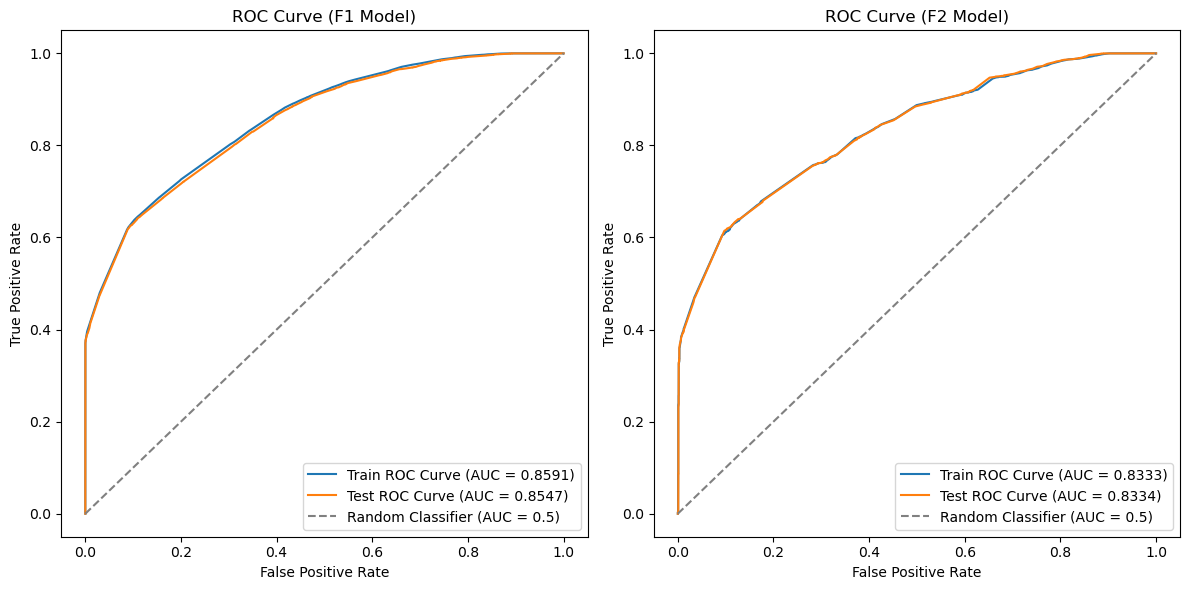

Train AUC (F1): 0.8591
Test AUC (F1): 0.8547
Train AUC (F2): 0.8333
Test AUC (F2): 0.8334


In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities instead of labels
y_train_prob_f1 = model_f1.predict_proba(X_train)[:, 1]  # Probability for the positive class
y_test_prob_f1 = model_f1.predict_proba(X_test)[:, 1]

# Compute ROC-AUC
roc_auc_train_f1 = roc_auc_score(y_train, y_train_prob_f1)
roc_auc_test_f1 = roc_auc_score(y_test, y_test_prob_f1)

# Predict probabilities instead of labels
y_train_prob_f2 = model_f2.predict_proba(X_train_vif)[:, 1]  # Probability for the positive class
y_test_prob_f2 = model_f2.predict_proba(X_test_vif)[:, 1]

# Compute ROC-AUC
roc_auc_train_f2 = roc_auc_score(y_train, y_train_prob_f2)
roc_auc_test_f2 = roc_auc_score(y_test, y_test_prob_f2)

# Get ROC curve points for train and test data (F1 and F2 models)
fpr_train_f1, tpr_train_f1, _ = roc_curve(y_train, y_train_prob_f1)
fpr_test_f1, tpr_test_f1, _ = roc_curve(y_test, y_test_prob_f1)

fpr_train_f2, tpr_train_f2, _ = roc_curve(y_train, y_train_prob_f2)
fpr_test_f2, tpr_test_f2, _ = roc_curve(y_test, y_test_prob_f2)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve for F1 model
axes[0].plot(fpr_train_f1, tpr_train_f1, label=f"Train ROC Curve (AUC = {roc_auc_train_f1:.4f})", linestyle="-")
axes[0].plot(fpr_test_f1, tpr_test_f1, label=f"Test ROC Curve (AUC = {roc_auc_test_f1:.4f})", linestyle="-")
axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.5)")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve (F1 Model)")
axes[0].legend()

# ROC Curve for F2 model
axes[1].plot(fpr_train_f2, tpr_train_f2, label=f"Train ROC Curve (AUC = {roc_auc_train_f2:.4f})", linestyle="-")
axes[1].plot(fpr_test_f2, tpr_test_f2, label=f"Test ROC Curve (AUC = {roc_auc_test_f2:.4f})", linestyle="-")
axes[1].plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.5)")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (F2 Model)")
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Print AUC values
print(f"Train AUC (F1): {roc_auc_train_f1:.4f}")
print(f"Test AUC (F1): {roc_auc_test_f1:.4f}")
print(f"Train AUC (F2): {roc_auc_train_f2:.4f}")
print(f"Test AUC (F2): {roc_auc_test_f2:.4f}")


The ROC-AUC scores for both models indicate that they perform similarly in distinguishing between the two classes.

- Train AUC (F1): 0.8591 | Test AUC (F1): 0.8547
- Train AUC (F2): 0.8333 | Test AUC (F2): 0.8334

Both models achieve an AUC of ~0.85, meaning they have a strong ability to differentiate between positive and negative classes. The small difference between Train and Test AUC suggests that the models generalize well and are not overfitting.

The fact that F1 and F2 optimization result in nearly identical AUC scores implies that adjusting the balance between precision and recall (as done with F1 vs. F2) does not significantly impact the model’s overall discriminative power. Instead, the difference would primarily be reflected in how recall is weighted relative to precision in decision-making.

Since AUC alone does not determine the best decision threshold, we will now check which threshold maximizes F1-score and F2-score. Adjusting the threshold can help balance precision and recall, ensuring that the model aligns better with our specific objectives.

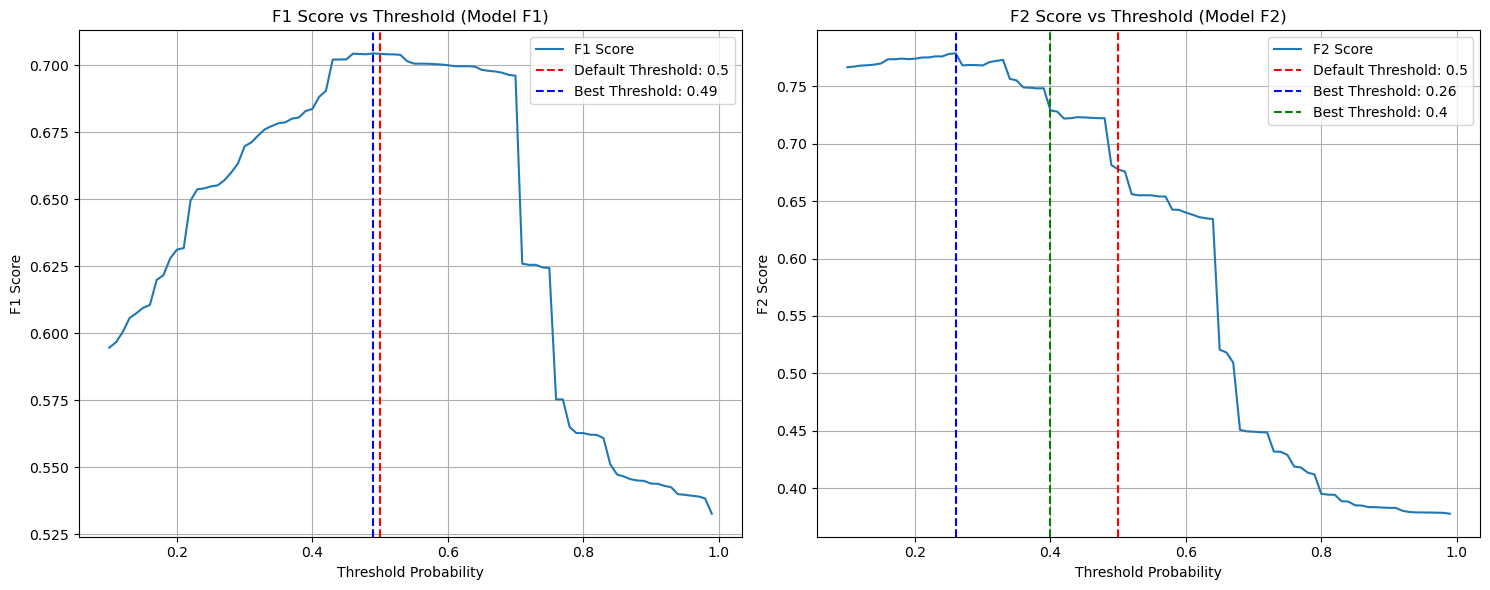

Best Threshold for Model F1: 0.49
Best Threshold for Model F2: 0.26


In [87]:
# Calculate threshold values
th_value = [i/100 for i in range(10, 100)]

# Initialize lists to store scores
score_list_f1 = []
score_list_f2 = []

# Compute F1 scores for model_f1
for i in th_value:
    y_pred_proba_f1 = model_f1.predict_proba(X_train)[:, 1]
    y_pred_f1 = np.where(y_pred_proba_f1 > i, 1, 0)
    score_f1 = fbeta_score(y_train, y_pred_f1, beta=1)  # F1 Score
    score_list_f1.append(score_f1)

# Compute F2 scores for model_f2
for i in th_value:
    y_pred_proba_f2 = model_f2.predict_proba(X_train_vif)[:, 1]
    y_pred_f2 = np.where(y_pred_proba_f2 > i, 1, 0)
    score_f2 = fbeta_score(y_train, y_pred_f2, beta=2)  # F2 Score
    score_list_f2.append(score_f2)


# Find best threshold for each model
best_threshold_f1 = th_value[np.argmax(score_list_f1)]
best_threshold_f2 = th_value[np.argmax(score_list_f2)]

# Plot the F2 score vs threshold probability for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Model F1
sns.lineplot(ax=axes[0], x=th_value, y=score_list_f1, label="F1 Score")
axes[0].axvline(x=0.5, color='red', linestyle="--", label='Default Threshold: 0.5')
axes[0].axvline(x=best_threshold_f1, color='blue', linestyle="--", label=f'Best Threshold: {best_threshold_f1:.2f}')
axes[0].set_xlabel("Threshold Probability")
axes[0].set_ylabel("F1 Score")
axes[0].set_title("F1 Score vs Threshold (Model F1)")
axes[0].grid()
axes[0].legend()

# Model F2
sns.lineplot(ax=axes[1], x=th_value, y=score_list_f2, label="F2 Score")
axes[1].axvline(x=0.5, color='red', linestyle="--", label='Default Threshold: 0.5')
axes[1].axvline(x=best_threshold_f2, color='blue', linestyle="--", label=f'Best Threshold: {best_threshold_f2:.2f}')
axes[1].axvline(x=0.4, color='green', linestyle="--", label=f'Best Threshold: 0.4')
axes[1].set_xlabel("Threshold Probability")
axes[1].set_ylabel("F2 Score")
axes[1].set_title("F2 Score vs Threshold (Model F2)")
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()

# Print best threshold values
print(f"Best Threshold for Model F1: {best_threshold_f1:.2f}")
print(f"Best Threshold for Model F2: {best_threshold_f2:.2f}")


After evaluating different thresholds, we found the following:

- Best Threshold for Model F1: 0.49 → This threshold balances precision and recall, optimizing the F1-score. It's close to the default 0.5 but slightly lower, indicating that a small increase in recall helps improve the balance.
- Best Threshold for Model F2: 0.26 → This threshold prioritizes recall over precision, as F2-score gives more weight to recall. A lower threshold means the model classifies more instances as positive (1), reducing false negatives at the cost of some false positives.
- Recommended Threshold: 0.4 → This threshold shows a good F2-score while serving as a balanced middle ground between 0.5 and 0.26. It ensures that "cancelled" cases are not overly filtered, preventing the model from making excessive guesses while still improving recall.

Model F1 (Threshold = 0.5)
Train F1-score: 0.7043
Test F1-score: 0.70153
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     10559
           1       0.77      0.64      0.70      6156

    accuracy                           0.80     16715
   macro avg       0.79      0.77      0.77     16715
weighted avg       0.80      0.80      0.79     16715


Model F2 (Threshold = 0.5)
Train F2-score: 0.67771
Test F2-score: 0.6784
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     10559
           1       0.69      0.67      0.68      6156

    accuracy                           0.77     16715
   macro avg       0.75      0.75      0.75     16715
weighted avg       0.77      0.77      0.77     16715



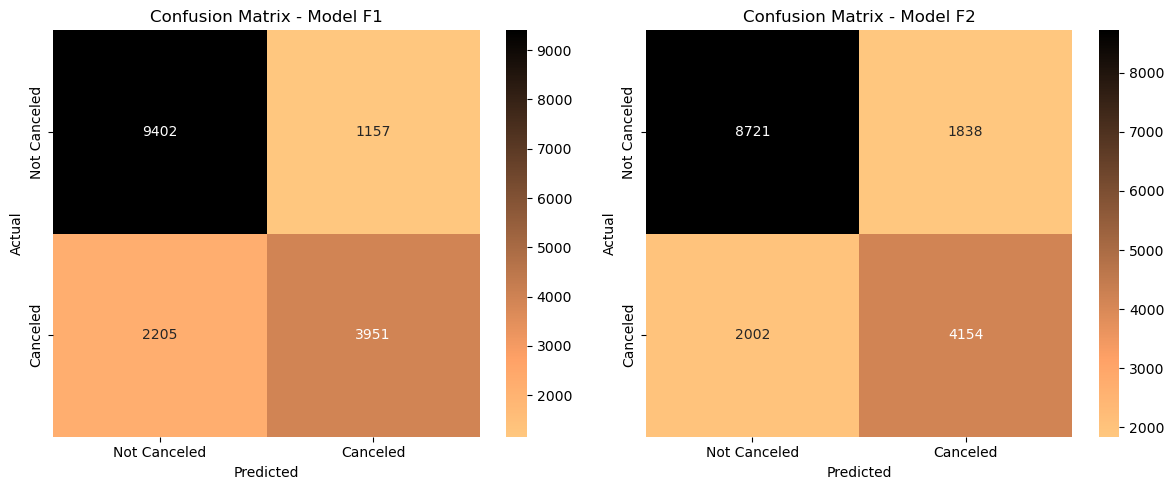

In [88]:
from sklearn.metrics import confusion_matrix

# Predict probabilities for both models
y_pred_train_f1 = model_f1.predict_proba(X_train)[:, 1]
y_pred_test_f1 = model_f1.predict_proba(X_test)[:, 1]

y_pred_train_f2 = model_f2.predict_proba(X_train_vif)[:, 1]
y_pred_test_f2 = model_f2.predict_proba(X_test_vif)[:, 1]

# Convert probabilities to binary predictions (using threshold 0.5)
y_pred_train_f1 = np.where(y_pred_train_f1 > 0.5, 1, 0)
y_pred_test_f1 = np.where(y_pred_test_f1 > 0.5, 1, 0)

y_pred_train_f2 = np.where(y_pred_train_f2 > 0.5, 1, 0)
y_pred_test_f2 = np.where(y_pred_test_f2 > 0.5, 1, 0)

# Print performance metrics
print(f"Model F1 (Threshold = 0.5)")
print(f"Train F1-score: {round(f1_score(y_train, y_pred_train_f1), 5)}")
print(f"Test F1-score: {round(f1_score(y_test, y_pred_test_f1), 5)}")
print(classification_report(y_test, y_pred_test_f1))

print(f"\nModel F2 (Threshold = 0.5)")
print(f"Train F2-score: {round(fbeta_score(y_train, y_pred_train_f2, beta=2), 5)}")
print(f"Test F2-score: {round(fbeta_score(y_test, y_pred_test_f2, beta=2), 5)}")
print(classification_report(y_test, y_pred_test_f2))

# Generate confusion matrices
conf_matrix_f1 = confusion_matrix(y_test, y_pred_test_f1)
conf_matrix_f2 = confusion_matrix(y_test, y_pred_test_f2)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix for Model F1
sns.heatmap(conf_matrix_f1, annot=True, fmt='d', cmap='copper_r', xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"], ax=axes[0])
axes[0].set_title("Confusion Matrix - Model F1")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion matrix for Model F2
sns.heatmap(conf_matrix_f2, annot=True, fmt='d', cmap='copper_r', xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"], ax=axes[1])
axes[1].set_title("Confusion Matrix - Model F2")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


Model F1 (Threshold = 0.49)
Test F1-score: 0.701
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     10559
           1       0.77      0.64      0.70      6156

    accuracy                           0.80     16715
   macro avg       0.79      0.77      0.77     16715
weighted avg       0.79      0.80      0.79     16715


Model F2 (Threshold = 0.26)
Test F2-score: 0.78027
              precision    recall  f1-score   support

           0       0.92      0.34      0.50     10559
           1       0.46      0.95      0.62      6156

    accuracy                           0.57     16715
   macro avg       0.69      0.65      0.56     16715
weighted avg       0.75      0.57      0.54     16715


Model F2 (Threshold = 0.4)
Test F2-score: 0.72845
              precision    recall  f1-score   support

           0       0.84      0.67      0.75     10559
           1       0.58      0.78      0.66      6156

    accuracy                  

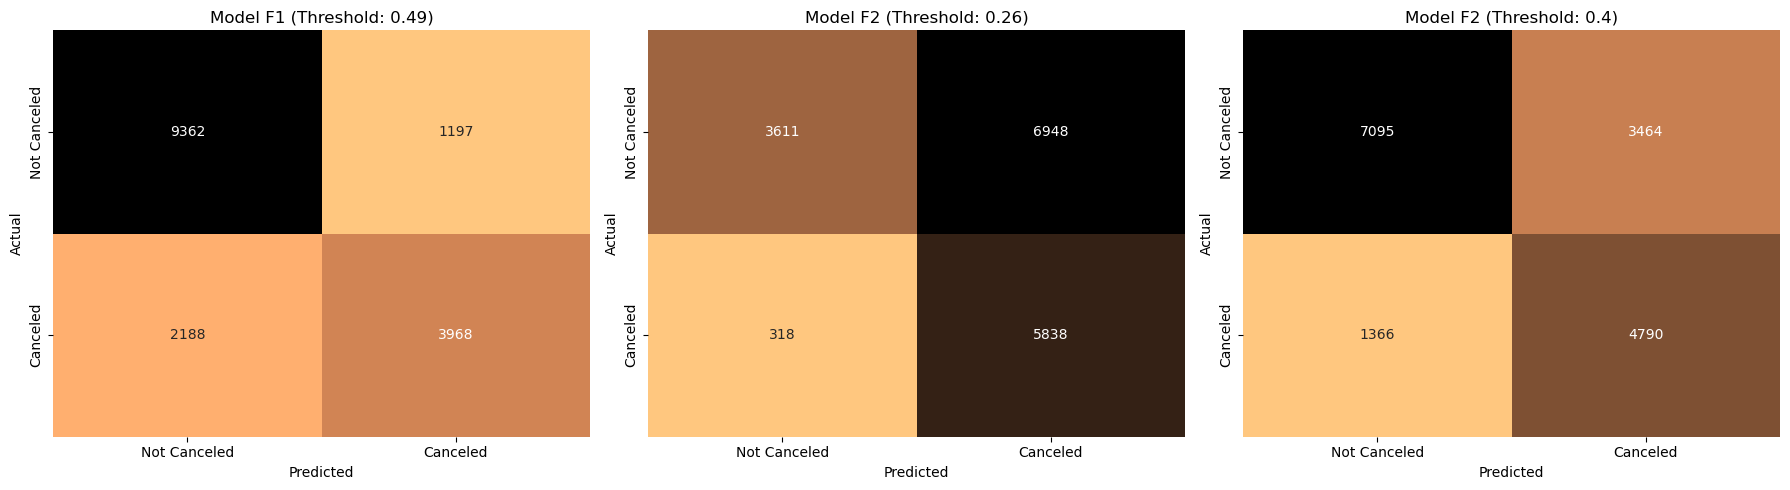

In [89]:
# Generate final predictions using the best thresholds
y_pred_f1 = np.where(model_f1.predict_proba(X_test)[:, 1] > best_threshold_f1, 1, 0)
y_pred_f2 = np.where(model_f2.predict_proba(X_test_vif)[:, 1] > best_threshold_f2, 1, 0)
y_pred_f2_04 = np.where(model_f2.predict_proba(X_test_vif)[:, 1] > 0.4, 1, 0)

# Print performance metrics
print(f"Model F1 (Threshold = {best_threshold_f1})")
print(f"Test F1-score: {round(f1_score(y_test, y_pred_f1), 5)}")
print(classification_report(y_test, y_pred_f1))

print(f"\nModel F2 (Threshold = {best_threshold_f2})")
print(f"Test F2-score: {round(fbeta_score(y_test, y_pred_f2, beta=2), 5)}")
print(classification_report(y_test, y_pred_f2))

print(f"\nModel F2 (Threshold = 0.4)")
print(f"Test F2-score: {round(fbeta_score(y_test, y_pred_f2_04, beta=2), 5)}")
print(classification_report(y_test, y_pred_f2_04))

# Create confusion matrices
conf_matrix_f1 = confusion_matrix(y_test, y_pred_f1)
conf_matrix_f2 = confusion_matrix(y_test, y_pred_f2)
conf_matrix_f2_04 = confusion_matrix(y_test, y_pred_f2_04)

# Plot all confusion matrices in 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Model F1 Confusion Matrix
sns.heatmap(conf_matrix_f1, annot=True, fmt='d', cmap='copper_r', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'],
            ax=axes[0])
axes[0].set_title(f'Model F1 (Threshold: {best_threshold_f1})')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Model F2 Confusion Matrix (Best Threshold)
sns.heatmap(conf_matrix_f2, annot=True, fmt='d', cmap='copper_r', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'],
            ax=axes[1])
axes[1].set_title(f'Model F2 (Threshold: {best_threshold_f2})')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Model F2 Confusion Matrix (Threshold 0.4)
sns.heatmap(conf_matrix_f2_04, annot=True, fmt='d', cmap='copper_r', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'],
            ax=axes[2])
axes[2].set_title('Model F2 (Threshold: 0.4)')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


After fine-tuning the decision thresholds, we analyzed how they impact F1-score and F2-score across training and testing data.

**Model F1 (Threshold = 0.49)**
- Test F1-score: 0.701
- Test Precision (Class 1): 0.77 | Recall (Class 1): 0.64
- Accuracy: 80%

This model maintains a well-balanced trade-off between precision and recall. The similarity between train and test scores suggests that the model is generalizing well and is not overfitting.

**Model F2 (Threshold = 0.26)**
- Test F2-score: 0.7803
- Test Precision (Class 1): 0.46 | Recall (Class 1): 0.95
- Accuracy: 57%

Lowering the threshold for Model F2 to 0.26 maximizes recall (95%) but significantly lowers precision (46%) and accuracy. This means the model catches almost all positive cases but generates a high number of false positives.

**Model F2 (Threshold = 0.4)**
- Test F2-score: 0.7285
- Test Precision (Class 1): 0.58 | Recall (Class 1): 0.78
- Accuracy: 71%

At a threshold of 0.4, the model achieves a better balance between precision and recall compared to 0.26. While recall is lower (78%), it still captures a majority of positive cases without drastically sacrificing precision. The accuracy also improves to 71%.


#### <span style="color:darksalmon">**7.2.2 Model 2**

In [90]:
X_train2 = df_train[['market_segment', 'booking_changes', 'deposit_type', 'customer_type', 'reserved_room_type', 'cat_prev_cancellations', 'cat_waiting_list', 'cat_parking', 'cat_requests']]
y_train2 = df_train["is_canceled"]

X_test2 = df_test[['market_segment', 'booking_changes', 'deposit_type', 'customer_type', 'reserved_room_type', 'cat_prev_cancellations', 'cat_waiting_list', 'cat_parking', 'cat_requests']]
y_test2 = df_test["is_canceled"]

categorical_features1 = ["market_segment", "deposit_type", "customer_type", "reserved_room_type", "cat_waiting_list"]
numeric_columns = X_train2.select_dtypes(include= 'number').columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num",RobustScaler(), numeric_columns),
        ("cat", OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features1),
        ("or1", OrdinalEncoder(categories=[['No prev cancellation', 'Low prev cancellation', 'Average prev cancellation', 'High prev cancellation']]), ["cat_prev_cancellations"]),
        ("or2", OrdinalEncoder(categories=[['No parking need', 'Need parking space']]), ["cat_parking"]),
        ("or3", OrdinalEncoder(categories=[['No request', 'Average requests', 'High requests']]), ["cat_requests"])
    ],
    remainder="passthrough"  # Keep any remaining columns as they are
)

##### <span style="color:#A67D44">**Logistic Regression**

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure X_train and y_train have matching indices
X_train_processed2 = preprocessor.fit_transform(X_train2)
X_test_processed2 = preprocessor.transform(X_test2)

# Convert to DataFrame if needed
if not isinstance(X_train_processed2, pd.DataFrame):
    X_train_processed2 = pd.DataFrame(X_train_processed2, columns=preprocessor.get_feature_names_out())

if not isinstance(X_test_processed2, pd.DataFrame):
    X_test_processed2 = pd.DataFrame(X_test_processed2, columns=preprocessor.get_feature_names_out())

# Reset index to ensure alignment
X_train_processed2 = X_train_processed2.reset_index(drop=True)
X_test_processed2 = X_test_processed2.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Compute VIF
def calculate_vif(X, threshold=5.0):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print("VIF Data Before Filtering:\n", vif_data)  # Debugging

    # Pastikan tidak menghapus semua kolom
    selected_features = vif_data[vif_data["VIF"] < threshold]["Feature"].tolist()
    if not selected_features:
        raise ValueError("All features were removed by VIF filtering. Consider increasing the threshold.")

    print("Selected features after VIF filtering:", selected_features)  # Debugging
    return X[selected_features]


X_train_vif2 = calculate_vif(X_train_processed2, threshold=10)
X_test_vif2 = calculate_vif(X_test_processed2, threshold=10)

VIF Data Before Filtering:
                                   Feature         VIF
0                    num__booking_changes    1.166755
1       cat__market_segment_Complementary    1.917039
2           cat__market_segment_Corporate    7.477947
3              cat__market_segment_Direct   16.751826
4              cat__market_segment_Groups   26.098174
5       cat__market_segment_Offline TA/TO   30.082678
6           cat__market_segment_Online TA   71.126086
7           cat__market_segment_Undefined    1.004042
8            cat__deposit_type_Non Refund    2.271650
9            cat__deposit_type_Refundable    1.010498
10               cat__customer_type_Group    1.147102
11           cat__customer_type_Transient   22.935662
12     cat__customer_type_Transient-Party    7.259368
13              cat__reserved_room_type_B    1.032487
14              cat__reserved_room_type_C    1.024603
15              cat__reserved_room_type_D    1.319693
16              cat__reserved_room_type_E    1.120576


In [111]:
# Define the resampling methods
resampling_methods = [
    ('oversample', RandomOverSampler(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('smote', SMOTE(random_state=42))
]

# Create the pipeline with a placeholder for resampling
pipeline = ImbPipeline(steps=[
    ("resampling", RandomOverSampler(random_state=42)),  # Default resampling placeholder
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', LogisticRegression())  # Placeholder classifier
])

param_grid = [
    {
        'resampling': [method for _, method in resampling_methods],
        'classifier__C': [0.01, 0.1, 1, 10], 
        'classifier__penalty': ['l1', 'l2'],
        'feature_selection__k': [20, 25, 30, 'all'],  
        'classifier': [LogisticRegression(max_iter=1000, random_state=2020)],
        'classifier__solver': ['lbfgs', 'liblinear']
    }
]

# Define the scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Create two GridSearchCV objects
gscv_f1 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f1_scorer)
gscv_f2 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer)

# Measure fitting time for F1-score
start_time_f1 = time.time()
gscv_f1.fit(X_train_vif2, y_train2)
end_time_f1 = time.time()
fitting_time_f1 = end_time_f1 - start_time_f1
print(f"Fitting time for F1-score: {fitting_time_f1:.2f} seconds")

# Measure fitting time for F2-score
start_time_f2 = time.time()
gscv_f2.fit(X_train_vif2, y_train2)
end_time_f2 = time.time()
fitting_time_f2 = end_time_f2 - start_time_f2
print(f"Fitting time for F2-score: {fitting_time_f2:.2f} seconds")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=25 is greater than n_features=23. All the features will be returned.
  warnings.warn(
/opt/anaconda3/lib/

Fitting time for F1-score: 97.58 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=25 is greater than n_features=23. All the features will be returned.
  warnings.warn(
/opt/anaconda3/lib/

Fitting time for F2-score: 113.78 seconds


In [112]:
print("Best F1-score:", gscv_f1.best_score_)
best_model_logreg2_f1 = gscv_f1.best_estimator_
display(best_model_logreg2_f1)

print("Best F2-score:", gscv_f2.best_score_)
best_model_logreg2_f2 = gscv_f2.best_estimator_
display(best_model_logreg2_f2)

Best F1-score: 0.6422432046112102


Pipeline(steps=[('resampling', SMOTE(random_state=42)),
                ('feature_selection', SelectKBest(k=25)),
                ('classifier',
                 LogisticRegression(C=10, max_iter=1000, penalty='l1',
                                    random_state=2020, solver='liblinear'))])

Best F2-score: 0.6529270198651921


Pipeline(steps=[('resampling', RandomUnderSampler(random_state=42)),
                ('feature_selection', SelectKBest(k=25)),
                ('classifier',
                 LogisticRegression(C=10, max_iter=1000, random_state=2020))])

In [93]:
logreg_model_list2_f1 = pd.DataFrame(gscv_f1.cv_results_).sort_values('rank_test_score').head(5)
logreg_model_list2_f2 = pd.DataFrame(gscv_f2.cv_results_).sort_values('rank_test_score').head(5)

display(logreg_model_list2_f1, logreg_model_list2_f2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
191       1.893086      0.030358         0.009592        0.002116   
164       1.768973      0.038167         0.008756        0.001912   
167       1.858303      0.104132         0.009807        0.001505   
185       1.896075      0.045501         0.011125        0.002471   
161       1.846595      0.067575         0.006057        0.001239   

                                      param_classifier  param_classifier__C  \
191  LogisticRegression(max_iter=1000, random_state...                 10.0   
164  LogisticRegression(max_iter=1000, random_state...                 10.0   
167  LogisticRegression(max_iter=1000, random_state...                 10.0   
185  LogisticRegression(max_iter=1000, random_state...                 10.0   
161  LogisticRegression(max_iter=1000, random_state...                 10.0   

    param_classifier__penalty param_classifier__solver  \
191                        l2                liblinear   
164                        l1                liblinear   
167                        l1                liblinear   
185                        l2                liblinear   
161                        l1                liblinear   

    param_feature_selection__k        param_resampling  \
191                        all  SMOTE(random_state=42)   
164                         30  SMOTE(random_state=42)   
167                        all  SMOTE(random_state=42)   
185                         25  SMOTE(random_state=42)   
161                         25  SMOTE(random_state=42)   

                                                params  split0_test_score  \
191  {'classifier': LogisticRegression(max_iter=100...           0.636516   
164  {'classifier': LogisticRegression(max_iter=100...           0.636516   
167  {'classifier': LogisticRegression(max_iter=100...           0.636516   
185  {'classifier': LogisticRegression(max_iter=100...           0.636516   
161  {'classifier': LogisticRegression(max_iter=100...           0.636516   

     split1_test_score  split2_test_score  split3_test_score  \
191           0.648198            0.64642           0.639662   
164           0.648198            0.64642           0.639662   
167           0.648198            0.64642           0.639662   
185           0.648198            0.64642           0.639662   
161           0.648198            0.64642           0.639662   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
191            0.64042         0.642243        0.004375                1  
164            0.64042         0.642243        0.004375                1  
167            0.64042         0.642243        0.004375                1  
185            0.64042         0.642243        0.004375                1  
161            0.64042         0.642243        0.004375                1

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
172       0.126687      0.011389         0.004880        0.000830   
175       0.122983      0.019644         0.005889        0.001943   
178       0.126809      0.032493         0.005197        0.001205   
191       1.559562      0.092774         0.005027        0.000883   
164       1.852886      0.081169         0.008306        0.004962   

                                      param_classifier  param_classifier__C  \
172  LogisticRegression(max_iter=1000, random_state...                 10.0   
175  LogisticRegression(max_iter=1000, random_state...                 10.0   
178  LogisticRegression(max_iter=1000, random_state...                 10.0   
191  LogisticRegression(max_iter=1000, random_state...                 10.0   
164  LogisticRegression(max_iter=1000, random_state...                 10.0   

    param_classifier__penalty param_classifier__solver  \
172                        l2                    lbfgs   
175                        l2                    lbfgs   
178                        l2                    lbfgs   
191                        l2                liblinear   
164                        l1                liblinear   

    param_feature_selection__k                     param_resampling  \
172                         25  RandomUnderSampler(random_state=42)   
175                         30  RandomUnderSampler(random_state=42)   
178                        all  RandomUnderSampler(random_state=42)   
191                        all               SMOTE(random_state=42)   
164                         30               SMOTE(random_state=42)   

                                                params  split0_test_score  \
172  {'classifier': LogisticRegression(max_iter=100...           0.649549   
175  {'classifier': LogisticRegression(max_iter=100...           0.649549   
178  {'classifier': LogisticRegression(max_iter=100...           0.649549   
191  {'classifier': LogisticRegression(max_iter=100...           0.649348   
164  {'classifier': LogisticRegression(max_iter=100...           0.649348   

     split1_test_score  split2_test_score  split3_test_score  \
172           0.658630           0.654995           0.651450   
175           0.658630           0.654995           0.651450   
178           0.658630           0.654995           0.651450   
191           0.657402           0.654515           0.652558   
164           0.657402           0.654515           0.652558   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
172           0.650012         0.652927        0.003432                1  
175           0.650012         0.652927        0.003432                1  
178           0.650012         0.652927        0.003432                1  
191           0.650012         0.652767        0.002962                4  
164           0.650012         0.652767        0.002962                4

##### <span style="color:#A67D44">**XGBoost**

In [94]:
# Define the resampling methods
resampling_methods = [
    ('oversample', RandomOverSampler(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('smote', SMOTE(random_state=42))
]

# Create the pipeline with a placeholder for resampling
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Your custom preprocessing steps
    ("resampling", RandomOverSampler(random_state=42)),  # Default resampling placeholder
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', XGBClassifier())  # Placeholder classifier
])

param_grid = [
    {
        'resampling': [method for _, method in resampling_methods],
        'feature_selection__k': [10, 15, 20, 'all'],  
        'classifier': [XGBClassifier(random_state=2020)],
        'classifier__n_estimators': [50, 100, 200] 
    }
]

# Define scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Create two GridSearchCV objects
gscv_f1 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f1_scorer)
gscv_f2 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer)

# Measure the fitting time for F1
start_time_f1 = time.time()
gscv_f1.fit(X_train2, y_train2)
end_time_f1 = time.time()
fitting_time_f1 = end_time_f1 - start_time_f1
print(f"Fitting time for F1-score: {fitting_time_f1:.2f} seconds")

# Measure the fitting time for F2
start_time_f2 = time.time()
gscv_f2.fit(X_train2, y_train2)
end_time_f2 = time.time()
fitting_time_f2 = end_time_f2 - start_time_f2
print(f"Fitting time for F2-score: {fitting_time_f2:.2f} seconds")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F1-score: 33.83 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F2-score: 34.30 seconds


In [95]:
print("Best F1-score:", gscv_f1.best_score_)
best_model_xgb2_f1 = gscv_f1.best_estimator_
display(best_model_xgb2_f1)

print("Best F2-score:", gscv_f2.best_score_)
best_model_xgb2_f2 = gscv_f2.best_estimator_
display(best_model_xgb2_f2)


Best F1-score: 0.6990426305672595


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['booking_changes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type',
                                                   'cat_waiting_list']),
                                                 ('or1',
                                                  OrdinalEncoder(categ...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=2020, ...))])

Best F2-score: 0.6648025593297116


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['booking_changes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type',
                                                   'cat_waiting_list']),
                                                 ('or1',
                                                  OrdinalEncoder(categ...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=2020, ...))])

In [96]:
xgb_model_list2_f1 = pd.DataFrame(gscv_f1.cv_results_).sort_values('rank_test_score').head(5)
xgb_model_list2_f2 = pd.DataFrame(gscv_f2.cv_results_).sort_values('rank_test_score').head(5)

display(xgb_model_list2_f1, xgb_model_list2_f2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
23       2.778987      0.072939         0.078759        0.005208   
11       2.422702      0.084886         0.054037        0.013607   
22       0.471851      0.040980         0.073383        0.014471   
10       0.332492      0.041088         0.047780        0.004004   
9        0.509840      0.065228         0.047327        0.009787   

                                     param_classifier  \
23  XGBClassifier(base_score=None, booster=None, c...   
11  XGBClassifier(base_score=None, booster=None, c...   
22  XGBClassifier(base_score=None, booster=None, c...   
10  XGBClassifier(base_score=None, booster=None, c...   
9   XGBClassifier(base_score=None, booster=None, c...   

    param_classifier__n_estimators param_feature_selection__k  \
23                             100                        all   
11                              50                        all   
22                             100                        all   
10                              50                        all   
9                               50                        all   

                       param_resampling  \
23               SMOTE(random_state=42)   
11               SMOTE(random_state=42)   
22  RandomUnderSampler(random_state=42)   
10  RandomUnderSampler(random_state=42)   
9    RandomOverSampler(random_state=42)   

                                               params  split0_test_score  \
23  {'classifier': XGBClassifier(base_score=None, ...           0.694522   
11  {'classifier': XGBClassifier(base_score=None, ...           0.694137   
22  {'classifier': XGBClassifier(base_score=None, ...           0.695075   
10  {'classifier': XGBClassifier(base_score=None, ...           0.694968   
9   {'classifier': XGBClassifier(base_score=None, ...           0.693140   

    split1_test_score  split2_test_score  split3_test_score  \
23           0.702159           0.701519           0.699308   
11           0.701825           0.701188           0.699624   
22           0.703091           0.699755           0.698062   
10           0.701696           0.701238           0.698312   
9            0.701754           0.701896           0.699194   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
23           0.697705         0.699043        0.002762                1  
11           0.697406         0.698836        0.002800                2  
22           0.696278         0.698452        0.002811                3  
10           0.695662         0.698375        0.002764                4  
9            0.695884         0.698374        0.003409                5

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
34       0.732725      0.048286         0.105513        0.022797   
22       0.439976      0.037390         0.068232        0.011538   
23       2.674282      0.094832         0.075116        0.016087   
35       2.417486      0.055944         0.059367        0.005414   
21       0.673536      0.053823         0.057873        0.006910   

                                     param_classifier  \
34  XGBClassifier(base_score=None, booster=None, c...   
22  XGBClassifier(base_score=None, booster=None, c...   
23  XGBClassifier(base_score=None, booster=None, c...   
35  XGBClassifier(base_score=None, booster=None, c...   
21  XGBClassifier(base_score=None, booster=None, c...   

    param_classifier__n_estimators param_feature_selection__k  \
34                             200                        all   
22                             100                        all   
23                             100                        all   
35                             200                        all   
21                             100                        all   

                       param_resampling  \
34  RandomUnderSampler(random_state=42)   
22  RandomUnderSampler(random_state=42)   
23               SMOTE(random_state=42)   
35               SMOTE(random_state=42)   
21   RandomOverSampler(random_state=42)   

                                               params  split0_test_score  \
34  {'classifier': XGBClassifier(base_score=None, ...           0.660029   
22  {'classifier': XGBClassifier(base_score=None, ...           0.659969   
23  {'classifier': XGBClassifier(base_score=None, ...           0.657812   
35  {'classifier': XGBClassifier(base_score=None, ...           0.659604   
21  {'classifier': XGBClassifier(base_score=None, ...           0.654210   

    split1_test_score  split2_test_score  split3_test_score  \
34           0.668612           0.661960           0.672083   
22           0.668724           0.661256           0.671919   
23           0.662376           0.662280           0.667351   
35           0.662590           0.660763           0.667769   
21           0.662801           0.661858           0.668145   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
34           0.661329         0.664803        0.004700                1  
22           0.660794         0.664532        0.004851                2  
23           0.661830         0.662330        0.003029                3  
35           0.659523         0.662050        0.003067                4  
21           0.658848         0.661172        0.004596                5

##### <span style="color:#A67D44">**Random Forest**

In [97]:
# Define the resampling methods
resampling_methods = [
    ('oversample', RandomOverSampler(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('smote', SMOTE(random_state=42))
]

# Create the pipeline with a placeholder for resampling
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Your custom preprocessing steps
    ("resampling", RandomOverSampler(random_state=42)),  # Default resampling placeholder
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', RandomForestClassifier())  # Placeholder classifier
])

param_grid = [
    # Random Forest hyperparameter tuning
    {
        'resampling': [method for _, method in resampling_methods],
        'feature_selection__k': [10, 15, 20, 'all'],  
        'classifier': [RandomForestClassifier(random_state=2020)],
        'classifier__criterion': ["gini", "entropy", "log_loss"],
        'classifier__n_estimators': [20, 30, 40],
        'classifier__max_depth': [5, 10, 15]
    }
]

# Define the scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Create two GridSearchCV objects
gscv_f1 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f1_scorer)
gscv_f2 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer)

# Measure fitting time for F1-score
start_time_f1 = time.time()
gscv_f1.fit(X_train2, y_train2)
end_time_f1 = time.time()
fitting_time_f1 = end_time_f1 - start_time_f1
print(f"Fitting time for F1-score: {fitting_time_f1:.2f} seconds")

# Measure fitting time for F2-score
start_time_f2 = time.time()
gscv_f2.fit(X_train2, y_train2)
end_time_f2 = time.time()
fitting_time_f2 = end_time_f2 - start_time_f2
print(f"Fitting time for F2-score: {fitting_time_f2:.2f} seconds")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F1-score: 377.48 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F2-score: 409.49 seconds


In [98]:
print("Best F1-score:", gscv_f1.best_score_)
best_model_rf2_f1 = gscv_f1.best_estimator_
display(best_model_rf2_f1)

print("Best F2-score:", gscv_f2.best_score_)
best_model_rf2_f2 = gscv_f2.best_estimator_
display(best_model_rf2_f2)

Best F1-score: 0.6978169209975151


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['booking_changes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type',
                                                   'cat_waiting_list']),
                                                 ('or1',
                                                  OrdinalEncoder(categ...
                                                                              'Need '
                                                                              'parking '
                                                                              'space']]),
                                                  ['cat_parking']),
                                                 ('or3',
                                                  OrdinalEncoder(categories=[['No '
                                                                              'request',
                                                                              'Average '
                                                                              'requests',
                                                                              'High '
                                                                              'requests']]),
                                                  ['cat_requests'])])),
                ('resampling', RandomOverSampler(random_state=42)),
                ('feature_selection', SelectKBest(k='all')),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=30, random_state=2020))])

Best F2-score: 0.6599944224623948


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['booking_changes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type',
                                                   'cat_waiting_list']),
                                                 ('or1',
                                                  OrdinalEncoder(categ...
                                                  OrdinalEncoder(categories=[['No '
                                                                              'parking '
                                                                              'need',
                                                                              'Need '
                                                                              'parking '
                                                                              'space']]),
                                                  ['cat_parking']),
                                                 ('or3',
                                                  OrdinalEncoder(categories=[['No '
                                                                              'request',
                                                                              'Average '
                                                                              'requests',
                                                                              'High '
                                                                              'requests']]),
                                                  ['cat_requests'])])),
                ('resampling', RandomOverSampler(random_state=42)),
                ('feature_selection', SelectKBest(k='all')),
                ('classifier',
                 RandomForestClassifier(max_depth=15, n_estimators=20,
                                        random_state=2020))])

In [99]:
rf_model_list2_f1 = pd.DataFrame(gscv_f1.cv_results_).sort_values('rank_test_score').head(5)
rf_model_list2_f2 = pd.DataFrame(gscv_f2.cv_results_).sort_values('rank_test_score').head(5)

display(rf_model_list2_f1, rf_model_list2_f2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
201       1.075581      0.070150         0.063388        0.007292   
309       1.807990      0.258258         0.102148        0.006973   
81        0.843663      0.083781         0.062859        0.003823   
299       2.748129      0.043124         0.071827        0.011169   
191       2.775695      0.067368         0.075084        0.012615   

                              param_classifier param_classifier__criterion  \
201  RandomForestClassifier(random_state=2020)                     entropy   
309  RandomForestClassifier(random_state=2020)                    log_loss   
81   RandomForestClassifier(random_state=2020)                        gini   
299  RandomForestClassifier(random_state=2020)                    log_loss   
191  RandomForestClassifier(random_state=2020)                     entropy   

     param_classifier__max_depth  param_classifier__n_estimators  \
201                           15                              30   
309                           15                              30   
81                            15                              20   
299                           15                              20   
191                           15                              20   

    param_feature_selection__k                    param_resampling  \
201                        all  RandomOverSampler(random_state=42)   
309                        all  RandomOverSampler(random_state=42)   
81                         all  RandomOverSampler(random_state=42)   
299                        all              SMOTE(random_state=42)   
191                        all              SMOTE(random_state=42)   

                                                params  split0_test_score  \
201  {'classifier': RandomForestClassifier(random_s...           0.693603   
309  {'classifier': RandomForestClassifier(random_s...           0.693603   
81   {'classifier': RandomForestClassifier(random_s...           0.693681   
299  {'classifier': RandomForestClassifier(random_s...           0.693465   
191  {'classifier': RandomForestClassifier(random_s...           0.693465   

     split1_test_score  split2_test_score  split3_test_score  \
201           0.701183           0.701774           0.696533   
309           0.701183           0.701774           0.696533   
81            0.700771           0.700738           0.698721   
299           0.700194           0.702496           0.694982   
191           0.700194           0.702496           0.694982   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
201           0.695992         0.697817        0.003154                1  
309           0.695992         0.697817        0.003154                1  
81            0.694641         0.697710        0.003007                3  
299           0.697242         0.697676        0.003309                4  
191           0.697242         0.697676        0.003309                4

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
81        1.516481      0.182976         0.106574        0.033558   
310       0.702392      0.081915         0.061914        0.007862   
202       0.647297      0.064532         0.072156        0.010676   
90        1.117175      0.145272         0.076520        0.017027   
78        1.663125      0.176801         0.353306        0.131373   

                              param_classifier param_classifier__criterion  \
81   RandomForestClassifier(random_state=2020)                        gini   
310  RandomForestClassifier(random_state=2020)                    log_loss   
202  RandomForestClassifier(random_state=2020)                     entropy   
90   RandomForestClassifier(random_state=2020)                        gini   
78   RandomForestClassifier(random_state=2020)                        gini   

     param_classifier__max_depth  param_classifier__n_estimators  \
81                            15                              20   
310                           15                              30   
202                           15                              30   
90                            15                              30   
78                            15                              20   

    param_feature_selection__k                     param_resampling  \
81                         all   RandomOverSampler(random_state=42)   
310                        all  RandomUnderSampler(random_state=42)   
202                        all  RandomUnderSampler(random_state=42)   
90                          20   RandomOverSampler(random_state=42)   
78                          20   RandomOverSampler(random_state=42)   

                                                params  split0_test_score  \
81   {'classifier': RandomForestClassifier(random_s...           0.652918   
310  {'classifier': RandomForestClassifier(random_s...           0.657989   
202  {'classifier': RandomForestClassifier(random_s...           0.657989   
90   {'classifier': RandomForestClassifier(random_s...           0.651493   
78   {'classifier': RandomForestClassifier(random_s...           0.650537   

     split1_test_score  split2_test_score  split3_test_score  \
81            0.661619           0.661082           0.664932   
310           0.663437           0.659350           0.666750   
202           0.663437           0.659350           0.666750   
90            0.659781           0.657978           0.664683   
78            0.659725           0.658034           0.664655   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
81            0.659422         0.659994        0.003965                1  
310           0.648573         0.659220        0.006154                2  
202           0.648573         0.659220        0.006154                2  
90            0.656246         0.658036        0.004318                4  
78            0.656402         0.657871        0.004592                5

##### <span style="color:#A67D44">**Decision Tree**

In [100]:
# Define the resampling methods
resampling_methods = [
    ('oversample', RandomOverSampler(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('smote', SMOTE(random_state=42))
]

# Create the pipeline with a placeholder for resampling
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Your custom preprocessing steps
    ("resampling", RandomOverSampler(random_state=42)),  # Default resampling placeholder
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', DecisionTreeClassifier())  # Placeholder classifier
])

param_grid = [
    # Decision Tree hyperparameter tuning
    {
        'resampling': [method for _, method in resampling_methods],
        'feature_selection__k': [10, 15, 20, 'all'],  
        'classifier': [DecisionTreeClassifier(random_state=2020)],
        'classifier__criterion': ["gini", "entropy", "log_loss"],
        'classifier__max_depth': [10, 15, 20, 25, 30]
    }
]

# Define the scorers
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Create two GridSearchCV objects
gscv_f1 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f1_scorer)
gscv_f2 = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer)

# Measure fitting time for F1-score
start_time_f1 = time.time()
gscv_f1.fit(X_train2, y_train2)
end_time_f1 = time.time()
fitting_time_f1 = end_time_f1 - start_time_f1
print(f"Fitting time for F1-score: {fitting_time_f1:.2f} seconds")

# Measure fitting time for F2-score
start_time_f2 = time.time()
gscv_f2.fit(X_train2, y_train2)
end_time_f2 = time.time()
fitting_time_f2 = end_time_f2 - start_time_f2
print(f"Fitting time for F2-score: {fitting_time_f2:.2f} seconds")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F1-score: 142.66 seconds


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

Fitting time for F2-score: 190.59 seconds


In [101]:
print("Best F1-score:", gscv_f1.best_score_)
best_model_dt2_f1 = gscv_f1.best_estimator_
display(best_model_dt2_f1)

print("Best F2-score:", gscv_f2.best_score_)
best_model_dt2_f2 = gscv_f2.best_estimator_
display(best_model_dt2_f2)

Best F1-score: 0.6975913998034337


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['booking_changes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type',
                                                   'cat_waiting_list']),
                                                 ('or1',
                                                  OrdinalEncoder(categ...
                                                  OrdinalEncoder(categories=[['No '
                                                                              'parking '
                                                                              'need',
                                                                              'Need '
                                                                              'parking '
                                                                              'space']]),
                                                  ['cat_parking']),
                                                 ('or3',
                                                  OrdinalEncoder(categories=[['No '
                                                                              'request',
                                                                              'Average '
                                                                              'requests',
                                                                              'High '
                                                                              'requests']]),
                                                  ['cat_requests'])])),
                ('resampling', SMOTE(random_state=42)),
                ('feature_selection', SelectKBest(k='all')),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=15,
                                        random_state=2020))])

Best F2-score: 0.6640906139962605


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['booking_changes'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type',
                                                   'cat_waiting_list']),
                                                 ('or1',
                                                  OrdinalEncoder(categ...
                                                  OrdinalEncoder(categories=[['No '
                                                                              'parking '
                                                                              'need',
                                                                              'Need '
                                                                              'parking '
                                                                              'space']]),
                                                  ['cat_parking']),
                                                 ('or3',
                                                  OrdinalEncoder(categories=[['No '
                                                                              'request',
                                                                              'Average '
                                                                              'requests',
                                                                              'High '
                                                                              'requests']]),
                                                  ['cat_requests'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('feature_selection', SelectKBest(k='all')),
                ('classifier',
                 DecisionTreeClassifier(max_depth=25, random_state=2020))])

In [102]:
dt_model_list2_f1 = pd.DataFrame(gscv_f1.cv_results_).sort_values('rank_test_score').head(5)
dt_model_list2_f2 = pd.DataFrame(gscv_f2.cv_results_).sort_values('rank_test_score').head(5)

display(dt_model_list2_f1, dt_model_list2_f2)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
143       2.695143      0.119006         0.076669        0.041309   
83        2.513917      0.071260         0.066546        0.026106   
23        2.362087      0.037444         0.094576        0.038800   
47        2.538010      0.095598         0.036446        0.004010   
59        2.384302      0.021911         0.049518        0.013788   

                              param_classifier param_classifier__criterion  \
143  DecisionTreeClassifier(random_state=2020)                    log_loss   
83   DecisionTreeClassifier(random_state=2020)                     entropy   
23   DecisionTreeClassifier(random_state=2020)                        gini   
47   DecisionTreeClassifier(random_state=2020)                        gini   
59   DecisionTreeClassifier(random_state=2020)                        gini   

     param_classifier__max_depth param_feature_selection__k  \
143                           15                        all   
83                            15                        all   
23                            15                        all   
47                            25                        all   
59                            30                        all   

           param_resampling  \
143  SMOTE(random_state=42)   
83   SMOTE(random_state=42)   
23   SMOTE(random_state=42)   
47   SMOTE(random_state=42)   
59   SMOTE(random_state=42)   

                                                params  split0_test_score  \
143  {'classifier': DecisionTreeClassifier(random_s...           0.691914   
83   {'classifier': DecisionTreeClassifier(random_s...           0.691914   
23   {'classifier': DecisionTreeClassifier(random_s...           0.691776   
47   {'classifier': DecisionTreeClassifier(random_s...           0.691416   
59   {'classifier': DecisionTreeClassifier(random_s...           0.691416   

     split1_test_score  split2_test_score  split3_test_score  \
143           0.699911           0.700550           0.698698   
83            0.699911           0.700550           0.698698   
23            0.699547           0.701232           0.698378   
47            0.700665           0.700111           0.698541   
59            0.700665           0.700111           0.698541   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
143           0.696885         0.697591        0.003101                1  
83            0.696885         0.697591        0.003101                1  
23            0.696642         0.697515        0.003237                3  
47            0.696619         0.697470        0.003338                4  
59            0.696619         0.697470        0.003338                4

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
58        0.591925      0.149042         0.151085        0.068278   
46        0.402119      0.067903         0.106572        0.050852   
166       0.584724      0.256321         0.083030        0.030422   
178       0.205691      0.015560         0.039404        0.007971   
106       0.392995      0.036947         0.097225        0.039050   

                              param_classifier param_classifier__criterion  \
58   DecisionTreeClassifier(random_state=2020)                        gini   
46   DecisionTreeClassifier(random_state=2020)                        gini   
166  DecisionTreeClassifier(random_state=2020)                    log_loss   
178  DecisionTreeClassifier(random_state=2020)                    log_loss   
106  DecisionTreeClassifier(random_state=2020)                     entropy   

     param_classifier__max_depth param_feature_selection__k  \
58                            30                        all   
46                            25                        all   
166                           25                        all   
178                           30                        all   
106                           25                        all   

                        param_resampling  \
58   RandomUnderSampler(random_state=42)   
46   RandomUnderSampler(random_state=42)   
166  RandomUnderSampler(random_state=42)   
178  RandomUnderSampler(random_state=42)   
106  RandomUnderSampler(random_state=42)   

                                                params  split0_test_score  \
58   {'classifier': DecisionTreeClassifier(random_s...           0.659760   
46   {'classifier': DecisionTreeClassifier(random_s...           0.659760   
166  {'classifier': DecisionTreeClassifier(random_s...           0.659887   
178  {'classifier': DecisionTreeClassifier(random_s...           0.659887   
106  {'classifier': DecisionTreeClassifier(random_s...           0.659887   

     split1_test_score  split2_test_score  split3_test_score  \
58            0.669001           0.660047           0.672216   
46            0.669001           0.660047           0.672216   
166           0.668847           0.660075           0.672064   
178           0.668847           0.660075           0.672064   
106           0.668847           0.660075           0.672064   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
58            0.659429         0.664091        0.005422                1  
46            0.659429         0.664091        0.005422                1  
166           0.659456         0.664066        0.005319                3  
178           0.659456         0.664066        0.005319                3  
106           0.659456         0.664066        0.005319                3

##### <span style="color:#A67D44">**Utilize F1 and F2 Best Model**

In [103]:
# f1 best models

top_logreg2_f1 = logreg_model_list2_f1.head(3)
top_xgb2_f1 = xgb_model_list2_f1.head(3)
top_rf2_f1 = rf_model_list2_f1.head(3)
top_dt2_f1 = dt_model_list2_f1.head(3)

result2_f1 = pd.concat([top_logreg2_f1, top_xgb2_f1, top_rf2_f1, top_dt2_f1], ignore_index=True)
result2_f1 = result2_f1.sort_values(by="mean_test_score", ascending=False)
display(result2_f1)

best_classifier = result2_f1.iloc[0]["param_classifier"]

# Pilih model berdasarkan nilai param_classifier
if "XGBClassifier" in str(best_classifier):
    model2_f1 = best_model_xgb2_f1
elif "RandomForestClassifier" in str(best_classifier):
    model2_f1 = best_model_rf2_f1
elif "LogisticRegression" in str(best_classifier):
    model2_f1 = best_model_logreg2_f1
elif "DecisionTreeClassifier" in str(best_classifier):
    model2_f1 = best_model_dt2_f1


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3        2.778987      0.072939         0.078759        0.005208   
4        2.422702      0.084886         0.054037        0.013607   
5        0.471851      0.040980         0.073383        0.014471   
6        1.075581      0.070150         0.063388        0.007292   
7        1.807990      0.258258         0.102148        0.006973   
8        0.843663      0.083781         0.062859        0.003823   
9        2.695143      0.119006         0.076669        0.041309   
10       2.513917      0.071260         0.066546        0.026106   
11       2.362087      0.037444         0.094576        0.038800   
0        1.893086      0.030358         0.009592        0.002116   
1        1.768973      0.038167         0.008756        0.001912   
2        1.858303      0.104132         0.009807        0.001505   

                                     param_classifier  param_classifier__C  \
3   XGBClassifier(base_score=None, booster=None, c...                  NaN   
4   XGBClassifier(base_score=None, booster=None, c...                  NaN   
5   XGBClassifier(base_score=None, booster=None, c...                  NaN   
6           RandomForestClassifier(random_state=2020)                  NaN   
7           RandomForestClassifier(random_state=2020)                  NaN   
8           RandomForestClassifier(random_state=2020)                  NaN   
9           DecisionTreeClassifier(random_state=2020)                  NaN   
10          DecisionTreeClassifier(random_state=2020)                  NaN   
11          DecisionTreeClassifier(random_state=2020)                  NaN   
0   LogisticRegression(max_iter=1000, random_state...                 10.0   
1   LogisticRegression(max_iter=1000, random_state...                 10.0   
2   LogisticRegression(max_iter=1000, random_state...                 10.0   

   param_classifier__penalty param_classifier__solver  \
3                        NaN                      NaN   
4                        NaN                      NaN   
5                        NaN                      NaN   
6                        NaN                      NaN   
7                        NaN                      NaN   
8                        NaN                      NaN   
9                        NaN                      NaN   
10                       NaN                      NaN   
11                       NaN                      NaN   
0                         l2                liblinear   
1                         l1                liblinear   
2                         l1                liblinear   

   param_feature_selection__k                     param_resampling  ...  \
3                         all               SMOTE(random_state=42)  ...   
4                         all               SMOTE(random_state=42)  ...   
5                         all  RandomUnderSampler(random_state=42)  ...   
6                         all   RandomOverSampler(random_state=42)  ...   
7                         all   RandomOverSampler(random_state=42)  ...   
8                         all   RandomOverSampler(random_state=42)  ...   
9                         all               SMOTE(random_state=42)  ...   
10                        all               SMOTE(random_state=42)  ...   
11                        all               SMOTE(random_state=42)  ...   
0                         all               SMOTE(random_state=42)  ...   
1                          30               SMOTE(random_state=42)  ...   
2                         all               SMOTE(random_state=42)  ...   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.702159           0.701519           0.699308           0.697705   
4           0.701825           0.701188           0.699624           0.697406   
5           0.703091           0.699755           0.698062           0.696278   
6           0.701183           0.701774           0.696533    

In [113]:
# f2 best models

top_logreg2_f2 = logreg_model_list2_f2.head(3)
top_xgb2_f2 = xgb_model_list2_f2.head(3)
top_rf2_f2 = rf_model_list2_f2.head(3)
top_dt2_f2 = dt_model_list2_f2.head(3)

result2_f2 = pd.concat([top_logreg2_f2, top_xgb2_f2, top_rf2_f2, top_dt2_f2], ignore_index=True)
result2_f2 = result2_f2.sort_values(by="mean_test_score", ascending=False)
display(result2_f2)

best_classifier = result2_f2.iloc[0]["param_classifier"]

# Pilih model berdasarkan nilai param_classifier
if "XGBClassifier" in str(best_classifier):
    model2_f2 = best_model_xgb2_f2
elif "RandomForestClassifier" in str(best_classifier):
    model2_f2 = best_model_rf2_f2
elif "LogisticRegression" in str(best_classifier):
    model2_f2 = best_model_logreg2_f2
elif "DecisionTreeClassifier" in str(best_classifier):
    model2_f2 = best_model_dt2_f2


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3        0.732725      0.048286         0.105513        0.022797   
4        0.439976      0.037390         0.068232        0.011538   
9        0.591925      0.149042         0.151085        0.068278   
10       0.402119      0.067903         0.106572        0.050852   
11       0.584724      0.256321         0.083030        0.030422   
5        2.674282      0.094832         0.075116        0.016087   
6        1.516481      0.182976         0.106574        0.033558   
7        0.702392      0.081915         0.061914        0.007862   
8        0.647297      0.064532         0.072156        0.010676   
0        0.126687      0.011389         0.004880        0.000830   
1        0.122983      0.019644         0.005889        0.001943   
2        0.126809      0.032493         0.005197        0.001205   

                                     param_classifier  param_classifier__C  \
3   XGBClassifier(base_score=None, booster=None, c...                  NaN   
4   XGBClassifier(base_score=None, booster=None, c...                  NaN   
9           DecisionTreeClassifier(random_state=2020)                  NaN   
10          DecisionTreeClassifier(random_state=2020)                  NaN   
11          DecisionTreeClassifier(random_state=2020)                  NaN   
5   XGBClassifier(base_score=None, booster=None, c...                  NaN   
6           RandomForestClassifier(random_state=2020)                  NaN   
7           RandomForestClassifier(random_state=2020)                  NaN   
8           RandomForestClassifier(random_state=2020)                  NaN   
0   LogisticRegression(max_iter=1000, random_state...                 10.0   
1   LogisticRegression(max_iter=1000, random_state...                 10.0   
2   LogisticRegression(max_iter=1000, random_state...                 10.0   

   param_classifier__penalty param_classifier__solver  \
3                        NaN                      NaN   
4                        NaN                      NaN   
9                        NaN                      NaN   
10                       NaN                      NaN   
11                       NaN                      NaN   
5                        NaN                      NaN   
6                        NaN                      NaN   
7                        NaN                      NaN   
8                        NaN                      NaN   
0                         l2                    lbfgs   
1                         l2                    lbfgs   
2                         l2                    lbfgs   

   param_feature_selection__k                     param_resampling  ...  \
3                         all  RandomUnderSampler(random_state=42)  ...   
4                         all  RandomUnderSampler(random_state=42)  ...   
9                         all  RandomUnderSampler(random_state=42)  ...   
10                        all  RandomUnderSampler(random_state=42)  ...   
11                        all  RandomUnderSampler(random_state=42)  ...   
5                         all               SMOTE(random_state=42)  ...   
6                         all   RandomOverSampler(random_state=42)  ...   
7                         all  RandomUnderSampler(random_state=42)  ...   
8                         all  RandomUnderSampler(random_state=42)  ...   
0                          25  RandomUnderSampler(random_state=42)  ...   
1                          30  RandomUnderSampler(random_state=42)  ...   
2                         all  RandomUnderSampler(random_state=42)  ...   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.668612           0.661960           0.672083           0.661329   
4           0.668724           0.661256           0.671919           0.660794   
9           0.669001           0.660047           0.672216           0.659429   
10          0.669001           0.660047           0.672216    

F1 best model and F2 best model indicate that XGBoost performs the best. However, we will proceed with the Logistic Regression (LogReg) best model instead for F2.

The reason for this choice is that the mean and standard deviation of the test data are not significantly different from those of the best-performing model. This suggests that LogReg provides a more stable and interpretable solution while maintaining competitive performance.

In [114]:
model2_f2 = best_model_logreg2_f2

In [115]:
missing_features = set(X_train_vif2.columns) - set(X_test_vif2.columns)
extra_features = set(X_test_vif2.columns) - set(X_train_vif2.columns)

for feature in missing_features:
    X_test_vif2[feature] = 0  # Atau nilai default yang sesuai

X_test_vif2 = X_test_vif2.drop(columns=extra_features)

# Pastikan kolom X_test_vif memiliki urutan yang sama dengan X_train_vif
X_test_vif2 = X_test_vif2[X_train_vif2.columns]



In [116]:
y_pred_train2 = model2_f1.predict(X_train2)
y_pred_test2 = model2_f1.predict(X_test2)

print(f'Train data performance:\nF1-score = {round(f1_score(y_train2,y_pred_train2),5)}\n{classification_report(y_train2,y_pred_train2)}')
print(f'Test data performance:\nF1-score = {round(f1_score(y_test2,y_pred_test2),5)}\n{classification_report(y_test2,y_pred_test2)}')

y_pred_train2 = model2_f2.predict(X_train_vif2)
y_pred_test2 = model2_f2.predict(X_test_vif2)

print(f'Train data performance:\nF2-score = {round(fbeta_score(y_train2,y_pred_train2,beta=2),5)}\n{classification_report(y_train2,y_pred_train2)}')
print(f'Test data performance:\nF2-score = {round(fbeta_score(y_test2,y_pred_test2,beta=2),5)}\n{classification_report(y_test2,y_pred_test2)}')


Train data performance:
F1-score = 0.70141
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     41989
           1       0.77      0.64      0.70     24590

    accuracy                           0.80     66579
   macro avg       0.79      0.77      0.77     66579
weighted avg       0.80      0.80      0.79     66579

Test data performance:
F1-score = 0.69937
              precision    recall  f1-score   support

           0       0.81      0.88      0.85     10559
           1       0.76      0.65      0.70      6156

    accuracy                           0.80     16715
   macro avg       0.79      0.76      0.77     16715
weighted avg       0.79      0.80      0.79     16715

Train data performance:
F2-score = 0.65107
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     41989
           1       0.62      0.66      0.64     24590

    accuracy                           0.73     66579


Train Data Performance
- F1-score: 0.7014, indicating a moderate balance between precision (77%) and recall (64%).
- F2-score: 0.6511, showing a slight improvement in recall at the cost of precision.
- Accuracy: 80%, with class 1 recall at 64%, meaning the model captures positive cases moderately well.

Test Data Performance
- F1-score: 0.6994, maintaining consistency with the training set.
- F2-score: 0.6602, slightly higher than the train set, showing stable recall.
- Accuracy: 80%, and class 1 recall remains at 65%, suggesting good generalization.

Overall, the model demonstrates stable performance across both training and test data, with minimal overfitting. It maintains strong precision while moderately capturing positive cases, making it suitable for scenarios requiring a balance between precision and recall.

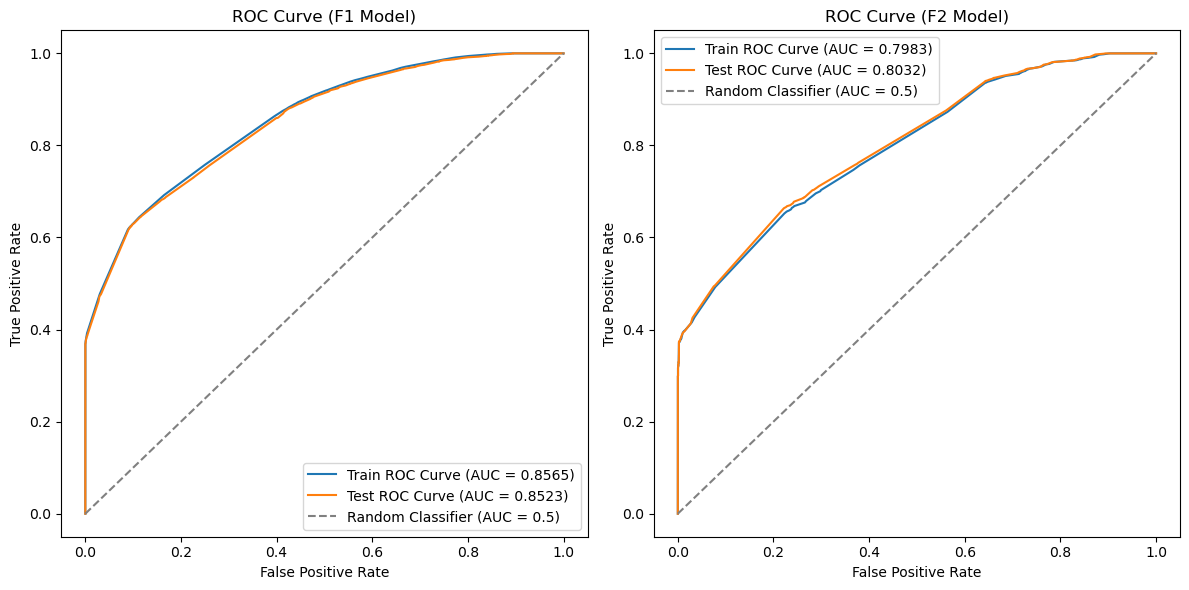

Train AUC (F1): 0.8565
Test AUC (F1): 0.8523
Train AUC (F2): 0.7983
Test AUC (F2): 0.8032


In [117]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities instead of labels
y_train_prob2_f1 = model2_f1.predict_proba(X_train2)[:, 1]  # Probability for the positive class
y_test_prob2_f1 = model2_f1.predict_proba(X_test2)[:, 1]

# Compute ROC-AUC
roc_auc_train2_f1 = roc_auc_score(y_train2, y_train_prob2_f1)
roc_auc_test2_f1 = roc_auc_score(y_test2, y_test_prob2_f1)

# Predict probabilities instead of labels
y_train_prob2_f2 = model2_f2.predict_proba(X_train_vif2)[:, 1]  # Probability for the positive class
y_test_prob2_f2 = model2_f2.predict_proba(X_test_vif2)[:, 1]

# Compute ROC-AUC
roc_auc_train2_f2 = roc_auc_score(y_train2, y_train_prob2_f2)
roc_auc_test2_f2 = roc_auc_score(y_test2, y_test_prob2_f2)

# Get ROC curve points for train and test data (F1 and F2 models)
fpr_train2_f1, tpr_train2_f1, _ = roc_curve(y_train2, y_train_prob2_f1)
fpr_test2_f1, tpr_test2_f1, _ = roc_curve(y_test2, y_test_prob2_f1)

fpr_train2_f2, tpr_train2_f2, _ = roc_curve(y_train2, y_train_prob2_f2)
fpr_test2_f2, tpr_test2_f2, _ = roc_curve(y_test2, y_test_prob2_f2)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve for F1 model
axes[0].plot(fpr_train2_f1, tpr_train2_f1, label=f"Train ROC Curve (AUC = {roc_auc_train2_f1:.4f})", linestyle="-")
axes[0].plot(fpr_test2_f1, tpr_test2_f1, label=f"Test ROC Curve (AUC = {roc_auc_test2_f1:.4f})", linestyle="-")
axes[0].plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.5)")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve (F1 Model)")
axes[0].legend()

# ROC Curve for F2 model
axes[1].plot(fpr_train2_f2, tpr_train2_f2, label=f"Train ROC Curve (AUC = {roc_auc_train2_f2:.4f})", linestyle="-")
axes[1].plot(fpr_test2_f2, tpr_test2_f2, label=f"Test ROC Curve (AUC = {roc_auc_test2_f2:.4f})", linestyle="-")
axes[1].plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier (AUC = 0.5)")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (F2 Model)")
axes[1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Print AUC values
print(f"Train AUC (F1): {roc_auc_train2_f1:.4f}")
print(f"Test AUC (F1): {roc_auc_test2_f1:.4f}")
print(f"Train AUC (F2): {roc_auc_train2_f2:.4f}")
print(f"Test AUC (F2): {roc_auc_test2_f2:.4f}")


The ROC-AUC scores for both models indicate that they perform similarly in distinguishing between the two classes.

- Train AUC (F1): 0.8565 | Test AUC (F1): 0.8523
- Train AUC (F2): 0.7983 | Test AUC (F2): 0.8032

The AUC scores indicate that the model has a strong ability to distinguish between classes. The minimal difference between train and test AUC suggests good generalization. F1 optimization results in higher AUC compared to F2, implying that prioritizing a balance between precision and recall leads to better overall discriminative power.

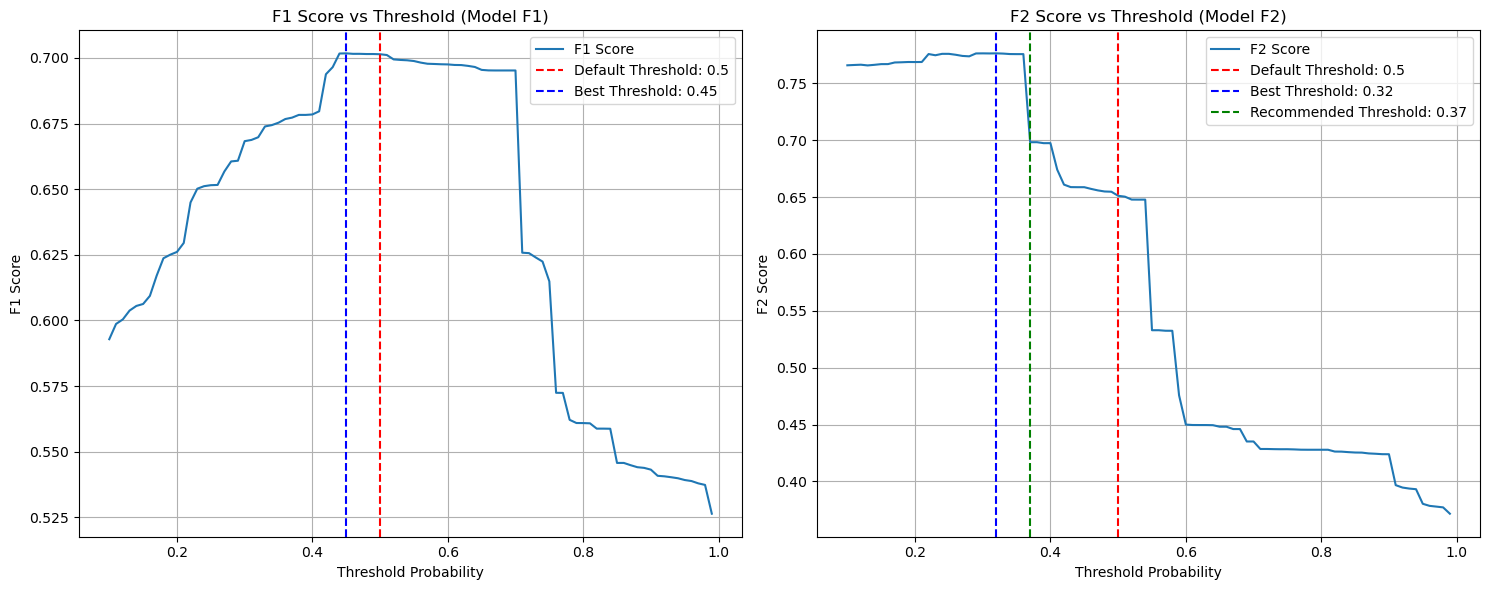

Best Threshold for Model F1: 0.45
Best Threshold for Model F2: 0.32


In [118]:
# Calculate threshold values
th_value = [i/100 for i in range(10, 100)]

# Initialize lists to store scores
score_list2_f1 = []
score_list2_f2 = []

# Compute F1 scores for model_f2
for i in th_value:
    y_pred_proba_f1 = model2_f1.predict_proba(X_train2)[:, 1]
    y_pred_f1 = np.where(y_pred_proba_f1 > i, 1, 0)
    score_f1 = fbeta_score(y_train, y_pred_f1, beta=1)  # F1 Score
    score_list2_f1.append(score_f1)

# Compute F2 scores for model_f2
for i in th_value:
    y_pred_proba_f2 = model2_f2.predict_proba(X_train_vif2)[:, 1]
    y_pred_f2 = np.where(y_pred_proba_f2 > i, 1, 0)
    score_f2 = fbeta_score(y_train, y_pred_f2, beta=2)  # F2 Score
    score_list2_f2.append(score_f2)


# Find best threshold for each model
best_threshold2_f1 = th_value[np.argmax(score_list2_f1)]
best_threshold2_f2 = th_value[np.argmax(score_list2_f2)]

# Plot the F2 score vs threshold probability for both models
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Model F1
sns.lineplot(ax=axes[0], x=th_value, y=score_list2_f1, label="F1 Score")
axes[0].axvline(x=0.5, color='red', linestyle="--", label='Default Threshold: 0.5')
axes[0].axvline(x=best_threshold2_f1, color='blue', linestyle="--", label=f'Best Threshold: {best_threshold2_f1:.2f}')
axes[0].set_xlabel("Threshold Probability")
axes[0].set_ylabel("F1 Score")
axes[0].set_title("F1 Score vs Threshold (Model F1)")
axes[0].grid()
axes[0].legend()

# Model F2
sns.lineplot(ax=axes[1], x=th_value, y=score_list2_f2, label="F2 Score")
axes[1].axvline(x=0.5, color='red', linestyle="--", label='Default Threshold: 0.5')
axes[1].axvline(x=best_threshold2_f2, color='blue', linestyle="--", label=f'Best Threshold: {best_threshold2_f2:.2f}')
axes[1].axvline(x=0.37, color='green', linestyle="--", label=f'Recommended Threshold: 0.37')
axes[1].set_xlabel("Threshold Probability")
axes[1].set_ylabel("F2 Score")
axes[1].set_title("F2 Score vs Threshold (Model F2)")
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()

# Print best threshold values
print(f"Best Threshold for Model F1: {best_threshold2_f1:.2f}")
print(f"Best Threshold for Model F2: {best_threshold2_f2:.2f}")

After evaluating different thresholds, we found the following:

- Best Threshold for Model F1: 0.45 → This threshold balances precision and recall, optimizing the F1-score. It slightly lowers the default 0.5 threshold, allowing for a better trade-off between false positives and false negatives.
- Best Threshold for Model F2: 0.32 → This threshold prioritizes recall over precision, as the F2-score gives more weight to recall. A lower threshold results in more instances being classified as positive (1), reducing false negatives but increasing false positives. This is beneficial in scenarios where capturing positive cases is more critical than minimizing false alarms.
- Recommended Threshold: 0.37 → This threshold shows a good F2-score while serving as a balanced middle ground between 0.5 and 0.32. It ensures that "cancelled" cases are not overly filtered, preventing the model from making excessive guesses while still improving recall.

Model F1 (Threshold = 0.5)
Train F1-score: 0.70141
Test F1-score: 0.69937
              precision    recall  f1-score   support

           0       0.81      0.88      0.85     10559
           1       0.76      0.65      0.70      6156

    accuracy                           0.80     16715
   macro avg       0.79      0.76      0.77     16715
weighted avg       0.79      0.80      0.79     16715


Model F2 (Threshold = 0.5)
Train F2-score: 0.65107
Test F2-score: 0.66023
              precision    recall  f1-score   support

           0       0.80      0.77      0.78     10559
           1       0.63      0.67      0.65      6156

    accuracy                           0.73     16715
   macro avg       0.71      0.72      0.72     16715
weighted avg       0.74      0.73      0.73     16715



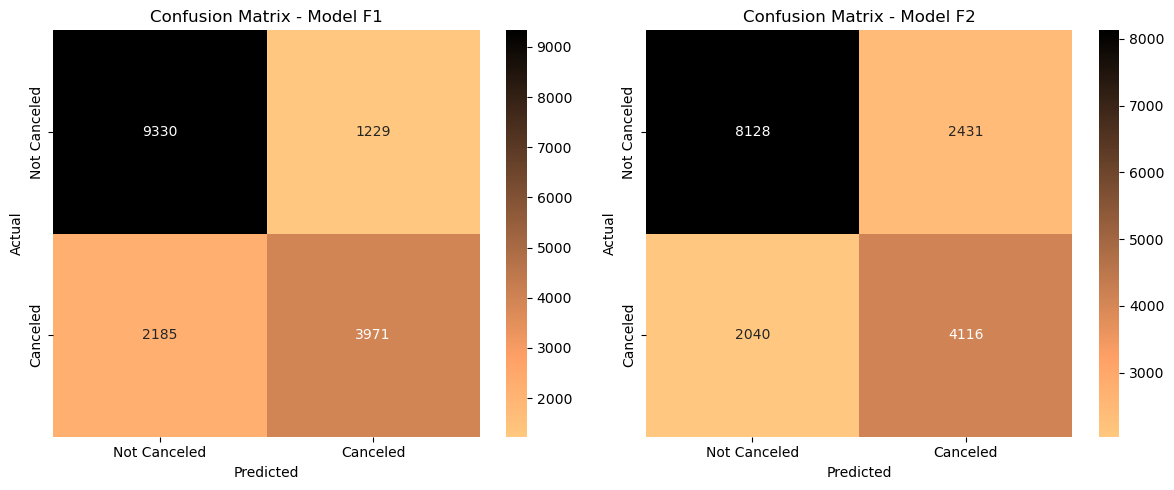

In [119]:
from sklearn.metrics import confusion_matrix

# Predict probabilities for both models
y_pred_train2_f1 = model2_f1.predict_proba(X_train2)[:, 1]
y_pred_test2_f1 = model2_f1.predict_proba(X_test2)[:, 1]

y_pred_train2_f2 = model2_f2.predict_proba(X_train_vif2)[:, 1]
y_pred_test2_f2 = model2_f2.predict_proba(X_test_vif2)[:, 1]

# Convert probabilities to binary predictions (using threshold 0.5)
y_pred_train2_f1 = np.where(y_pred_train2_f1 > 0.5, 1, 0)
y_pred_test2_f1 = np.where(y_pred_test2_f1 > 0.5, 1, 0)

y_pred_train2_f2 = np.where(y_pred_train2_f2 > 0.5, 1, 0)
y_pred_test2_f2 = np.where(y_pred_test2_f2 > 0.5, 1, 0)

# Print performance metrics
print(f"Model F1 (Threshold = 0.5)")
print(f"Train F1-score: {round(f1_score(y_train2, y_pred_train2_f1), 5)}")
print(f"Test F1-score: {round(f1_score(y_test2, y_pred_test2_f1), 5)}")
print(classification_report(y_test2, y_pred_test2_f1))

print(f"\nModel F2 (Threshold = 0.5)")
print(f"Train F2-score: {round(fbeta_score(y_train2, y_pred_train2_f2, beta=2), 5)}")
print(f"Test F2-score: {round(fbeta_score(y_test2, y_pred_test2_f2, beta=2), 5)}")
print(classification_report(y_test2, y_pred_test2_f2))

# Generate confusion matrices
conf_matrix2_f1 = confusion_matrix(y_test2, y_pred_test2_f1)
conf_matrix2_f2 = confusion_matrix(y_test2, y_pred_test2_f2)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix for Model F1
sns.heatmap(conf_matrix2_f1, annot=True, fmt='d', cmap='copper_r', xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"], ax=axes[0])
axes[0].set_title("Confusion Matrix - Model F1")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion matrix for Model F2
sns.heatmap(conf_matrix2_f2, annot=True, fmt='d', cmap='copper_r', xticklabels=["Not Canceled", "Canceled"], 
            yticklabels=["Not Canceled", "Canceled"], ax=axes[1])
axes[1].set_title("Confusion Matrix - Model F2")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


Model F1 (Threshold = 0.45)
Test F1-score: 0.69575
              precision    recall  f1-score   support

           0       0.82      0.83      0.83     10559
           1       0.71      0.69      0.70      6156

    accuracy                           0.78     16715
   macro avg       0.76      0.76      0.76     16715
weighted avg       0.78      0.78      0.78     16715


Model F2 (Threshold = 0.32)
Test F2-score: 0.77797
              precision    recall  f1-score   support

           0       0.91      0.34      0.50     10559
           1       0.46      0.94      0.61      6156

    accuracy                           0.56     16715
   macro avg       0.69      0.64      0.56     16715
weighted avg       0.75      0.56      0.54     16715


Model F2 (Threshold = 0.37)
Test F2-score: 0.70287
              precision    recall  f1-score   support

           0       0.82      0.63      0.71     10559
           1       0.54      0.76      0.63      6156

    accuracy               

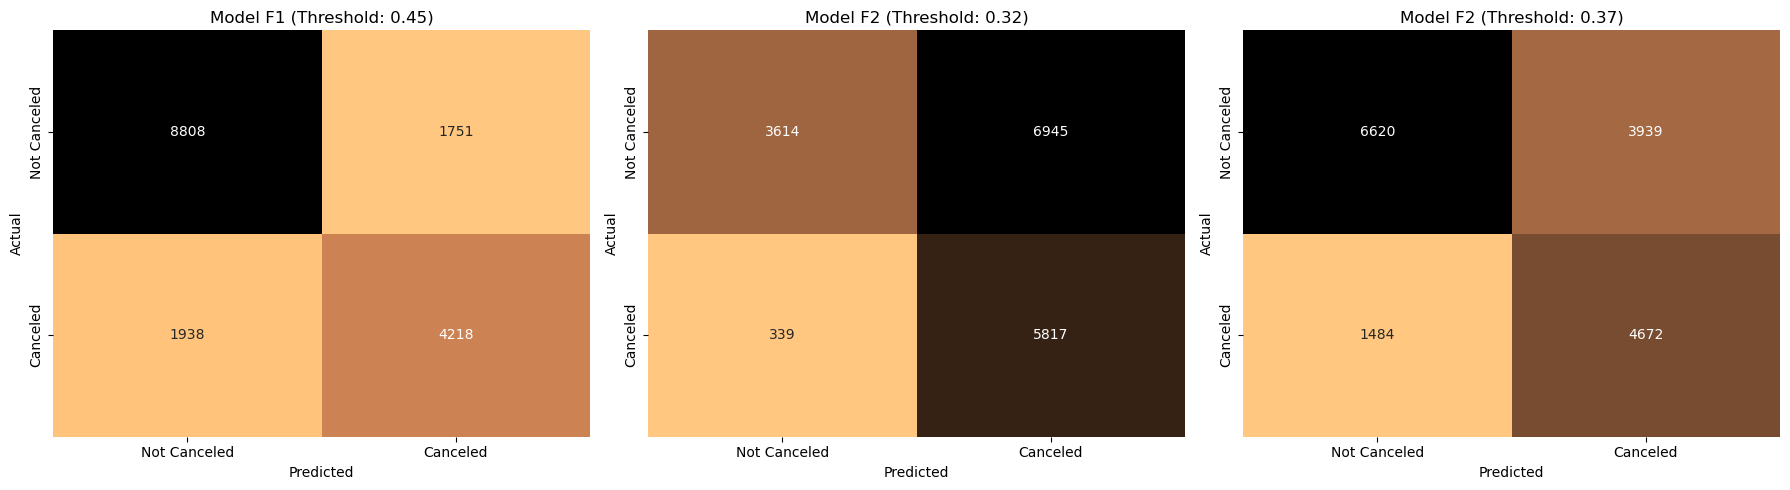

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score, classification_report, confusion_matrix

# Generate final predictions using the best thresholds
y_pred2_f1 = np.where(model2_f1.predict_proba(X_test2)[:, 1] > best_threshold2_f1, 1, 0)
y_pred2_f2 = np.where(model2_f2.predict_proba(X_test_vif2)[:, 1] > best_threshold2_f2, 1, 0)
y_pred2_f2_037 = np.where(model2_f2.predict_proba(X_test_vif2)[:, 1] > 0.38, 1, 0)

# Print performance metrics
print(f"Model F1 (Threshold = {best_threshold2_f1})")
print(f"Test F1-score: {round(f1_score(y_test2, y_pred2_f1), 5)}")
print(classification_report(y_test2, y_pred2_f1))

print(f"\nModel F2 (Threshold = {best_threshold2_f2})")
print(f"Test F2-score: {round(fbeta_score(y_test2, y_pred2_f2, beta=2), 5)}")
print(classification_report(y_test2, y_pred2_f2))

print(f"\nModel F2 (Threshold = 0.37)")
print(f"Test F2-score: {round(fbeta_score(y_test, y_pred2_f2_037, beta=2), 5)}")
print(classification_report(y_test, y_pred2_f2_037))

# Create confusion matrices
conf_matrix_f1 = confusion_matrix(y_test2, y_pred2_f1)
conf_matrix_f2 = confusion_matrix(y_test2, y_pred2_f2)
conf_matrix_f2_037 = confusion_matrix(y_test, y_pred2_f2_037)

# Plot both confusion matrices in 1 row, 2 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Model F1 Confusion Matrix
sns.heatmap(conf_matrix_f1, annot=True, fmt='d', cmap='copper_r', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'],
            ax=axes[0])
axes[0].set_title(f'Model F1 (Threshold: {best_threshold2_f1})')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Model F2 Confusion Matrix
sns.heatmap(conf_matrix_f2, annot=True, fmt='d', cmap='copper_r', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'],
            ax=axes[1])
axes[1].set_title(f'Model F2 (Threshold: {best_threshold2_f2})')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Model F2 Confusion Matrix (Threshold 0.37)
sns.heatmap(conf_matrix_f2_037, annot=True, fmt='d', cmap='copper_r', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'],
            ax=axes[2])
axes[2].set_title('Model F2 (Threshold: 0.37)')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


After fine-tuning the decision thresholds, we analyzed how they impact F1-score and F2-score across training and testing data.

**Model F1 (Threshold = 0.49)**
- Test F1-score : 0.69575
- Test Precision (Class 1): 0.71 | Recall (Class 1): 0.69
- Accuracy: 78%

This model provides a balanced trade-off between precision and recall, maintaining an overall strong performance. The accuracy remains high at 78%, with both precision and recall relatively close, ensuring stable generalization.

**Model F2 (Threshold = 0.32)**
- Test F2-score : 0.77797
- Test Precision (Class 1): 0.46 | Recall (Class 1): 0.94
- Accuracy: 56%

Lowering the threshold to 0.32 significantly boosts recall (94%) but at the cost of lower precision (46%) and overall accuracy (56%). This results in a model that captures almost all positive cases but misclassifies many negatives as positives. This trade-off is useful in scenarios where recall is more critical than precision, such as fraud detection or safety monitoring.

**Model F2 (Threshold = 0.37)**
- Test F2-score : 0.70287
- Test Precision (Class 1): 0.54 | Recall (Class 1): 0.76
- Accuracy: 68%

Raising the threshold slightly to 0.37 reduces recall (76%) but improves precision (54%) and accuracy (68%). This provides a more balanced F2-score while reducing excessive false positives.

Overall, while 0.32 maximizes recall, the 0.37 threshold offers a better compromise by retaining a strong F2-score while improving accuracy.

### <span style="color:#899481">**7.3 Model Interpretation**

After comparing the F2 and F1 scores of Model 1 and Model 2, we decided to use Model 1 as our final model. Model 1 achieved higher F2 and F1 scores, indicating better overall performance, with a stronger emphasis on recall while still maintaining a good balance with precision. This aligns with our objectives, ensuring that we minimize false negatives without sacrificing too much accuracy. Additionally, we utilized logistic regression for Model 1, which offers a significant advantage in terms of interpretability. The simplicity and transparency of logistic regression make it easier to understand the impact of different features on the predictions, aiding in better decision-making and communication of results.

Next, we're going to analyze feature importance to better understand the model and identify which variables contribute the most to its predictions.

In [121]:
display(model_f1)
display(model_f2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_seg...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=2020, ...))])

Pipeline(steps=[('resampling', RandomOverSampler(random_state=42)),
                ('feature_selection', SelectKBest(k=25)),
                ('classifier',
                 LogisticRegression(C=10, max_iter=1000, random_state=2020))])

##### <span style="color:#A67D44">**Feature Importance for Model 1 Focusing in F1**

In [122]:
final_estimator = model_f1.named_steps['classifier']
transformer = model_f1.named_steps['preprocessor']

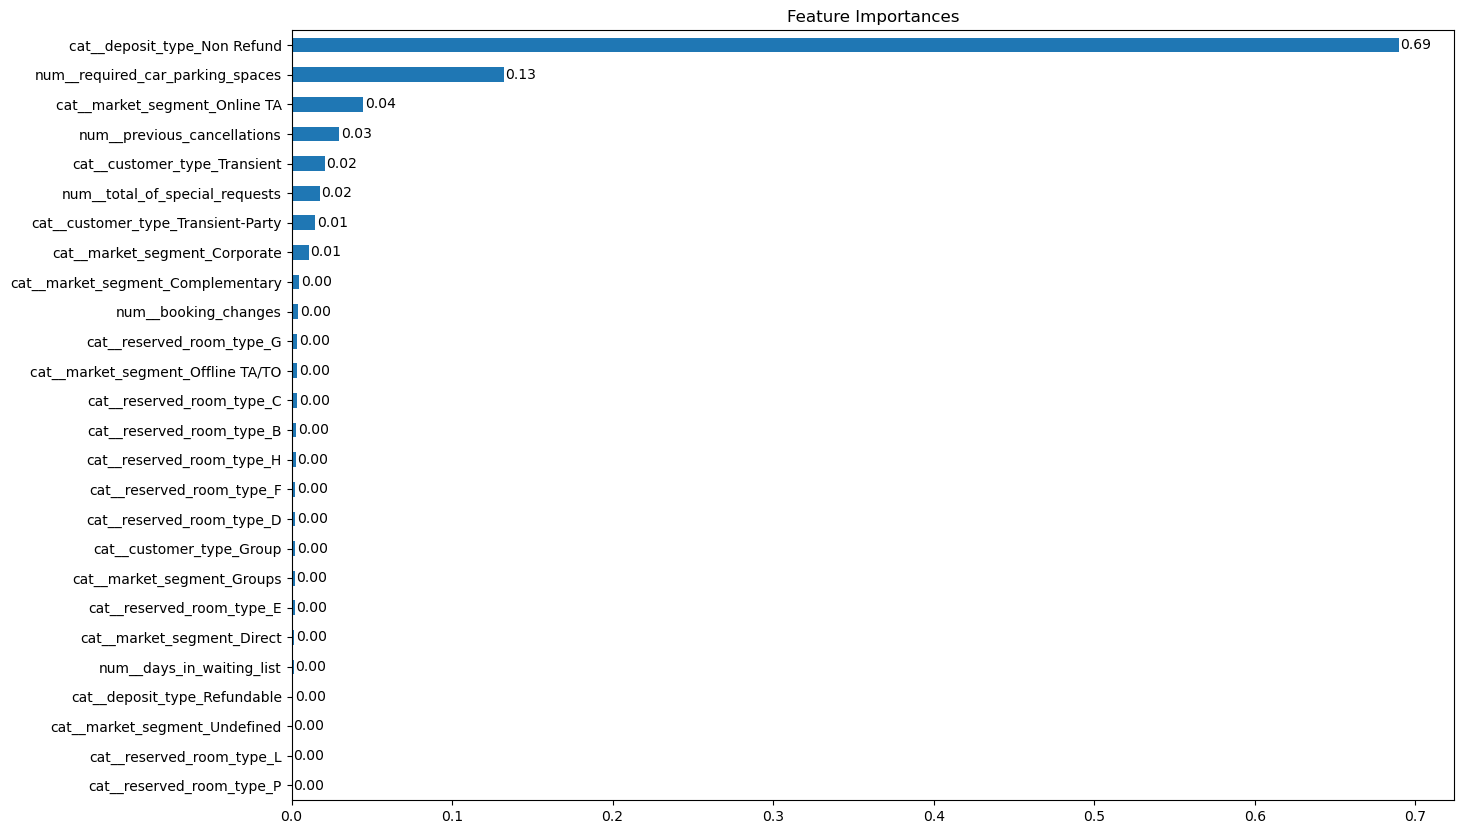

In [123]:
import statsmodels.api as sm

# Get the feature importances from the final estimator
feature_importances = final_estimator.feature_importances_

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Transform X_train using the transformer
X_train_encoded = transformer.transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_train_encoded

# Create a Series with feature importances and sort it
model_coef = pd.Series(feature_importances, index=X_train_encoded.columns).sort_values()

# Plot the feature importances

plt.figure(figsize=(15, 10))
ax = model_coef.plot(kind='barh', title='Feature Importances')


# Add annotations to the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.001,  # position x (at the end of the bar)
            i.get_y() + i.get_height() / 2,  # position y (middle of the bar)
            f'{i.get_width():.2f}',  # text to display (feature importance value)
            ha='left',  # horizontal alignment (left align)
            va='center')  # vertical alignment (center align)
plt.show()


The most influential features in predicting cancellations based on XGBoost importance scores are:

1. **Deposit Type: Non-Refundable (0.69)**
    
    Deposit Type: Non-Refundable is the most significant factor. If a booking has a non-refundable deposit, it strongly increases the likelihood of cancellation.
1. **Required Car Parking Spaces (0.13)**
    
    Needing a parking space is another major predictor. It could indicate certain customer behaviors or booking patterns that correlate with cancellation risk.
1. **Market Segment: Online Travel Agency (0.04)**
    
    Bookings made through Online Travel Agencies (OTAs) tend to have a higher cancellation rate.
1. **Previous Cancellations (0.03)**
    
    A customer with a history of cancellations is more likely to cancel again.
1. **Customer Type: Transient (0.02)**
    
    Transient customers, who do not belong to a specific group or corporate booking, are more likely to cancel.
1. **Total Special Requests (0.02)**
    
    Customers making more special requests may be more likely to cancel.
1. **Customer Type: Transient-Party (0.01)**
    
    Similar to Transient customers but traveling in a small group.
1. **Market Segment: Corporate (0.01)**
    
    Corporate bookings appear to have a minor influence.

 98%|===================| 65503/66579 [01:07<00:01]        

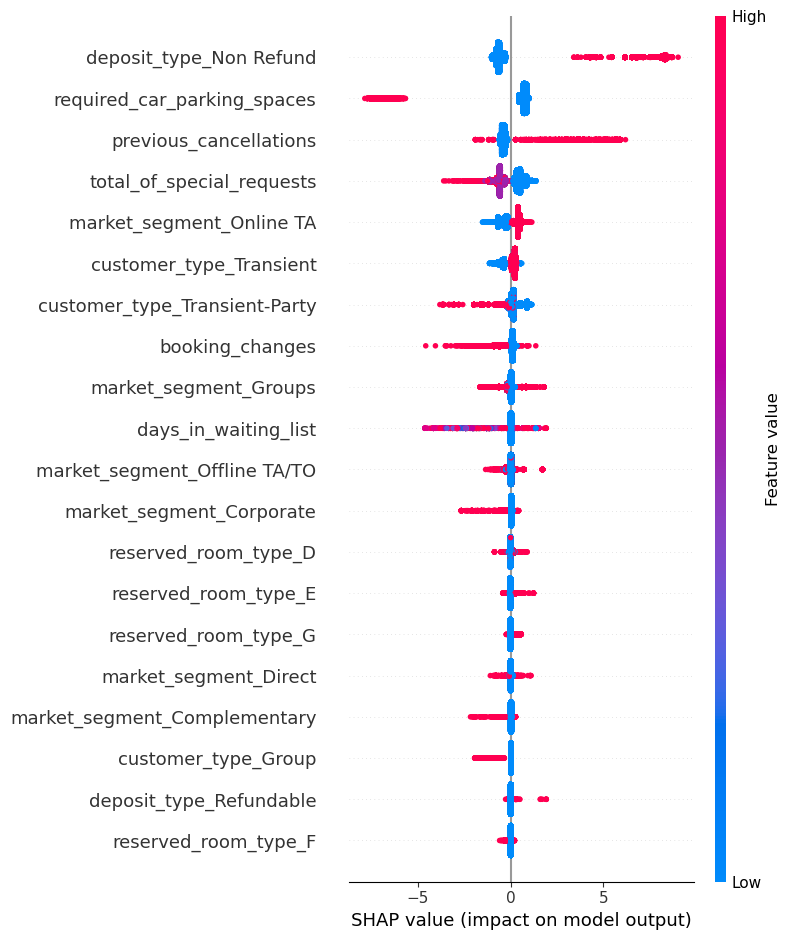

In [124]:
import numpy as np
import pandas as pd
import shap

# Transform training data
X_train_transformed = model_f1.named_steps['preprocessor'].transform(X_train)

# Ambil semua transformer dari pipeline
transformers = model_f1.named_steps['preprocessor'].transformers_

# Ambil nama fitur numerik
numeric_feature_names = transformers[0][2]  # Kolom numerik sesuai preprocessor

# Ambil nama fitur setelah OneHotEncoding
onehot_encoder = transformers[1][1]  # Ambil OneHotEncoder dari pipeline
onehot_feature_names = onehot_encoder.get_feature_names_out()  # Tidak perlu argumen

# Gabungkan semua fitur
all_feature_names = np.concatenate([numeric_feature_names, onehot_feature_names])

# Konversi hasil transformasi ke DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_feature_names)

# Jalankan SHAP
explainer = shap.Explainer(model_f1.named_steps['classifier'], X_train_transformed_df)
shap_values = explainer(X_train_transformed_df)

# Plot SHAP
shap.summary_plot(shap_values, X_train_transformed_df, feature_names=all_feature_names)


Next, we analyze the SHAP summary plot (shown in the image) to see how each feature influences model predictions at an individual level.

1. **Deposit Type: Non-Refundable (strongest influence)**
    - High values (Non-Refundable) increase the likelihood of cancellation.
    - Low values (Refundable) reduce the likelihood of cancellation.
1. **Required Car Parking Spaces**
    -  Having a parking space (high feature value in red) increases cancellation probability.
    -  Customers without parking spaces (low values in blue) are less likely to cancel.
1. **Previous Cancellations & Total Special Requests**
    - More cancellations or special requests increase cancellation likelihood.
1. **Market Segment: Online TA & Transient Customers**
    - These groups tend to increase the likelihood of cancellation.
1. **Booking Changes & Days in Waiting List**
    - More changes or longer wait times slightly increase the probability of cancellation.

##### <span style="color:#A67D44">**Feature Importance for Model 1 Focusing in F2**

In [125]:
import statsmodels.api as sm

# Add intercept column (needed for statsmodels)
X_train_vif_const = sm.add_constant(X_train_vif)

zero_variance_features = X_train_vif_const.columns[X_train_vif_const.nunique() == 1]

# If any found, drop them
X_train_vif_const = X_train_vif_const.drop(columns=zero_variance_features)

logit_model = sm.Logit(y_train, X_train_vif_const)
result = logit_model.fit_regularized(method='l1', alpha=0.01)  # L1 regularization
print(result.summary())


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.45390477746635405
            Iterations: 195
            Function evaluations: 198
            Gradient evaluations: 195


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 7 out of 24 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                66579
Model:                          Logit   Df Residuals:                    66555
Method:                           MLE   Df Model:                           23
Date:                Sun, 16 Feb 2025   Pseudo R-squ.:                  0.3108
Time:                        18:11:03   Log-Likelihood:                -30219.
converged:                       True   LL-Null:                       -43849.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
num__previous_cancellations            1.6415      0.055     30.076      0.000       1.535       1.749
num__booking_changes                  -0.3366      0.020   

In [126]:
import statsmodels.api as sm
import pandas as pd

# Extract the logistic regression model from the pipeline
log_reg_f2 = model_f2.named_steps['classifier']

# Extract feature names (ensure alignment with X_train_vif)
feature_names = X_train_vif.columns

# Create DataFrame for coefficients
coef_f2_df = pd.DataFrame({"Feature": feature_names, "Coefficient": log_reg_f2.coef_.flatten()})

# Sort by absolute coefficient values for better interpretation
coef_f2_df = coef_f2_df.reindex(coef_f2_df["Coefficient"].abs().sort_values(ascending=False).index)

# Display the top features
print("\nTop coefficients (F2-score model):\n", coef_f2_df.head(10))



Top coefficients (F2-score model):
                               Feature  Coefficient
3    num__required_car_parking_spaces   -10.262168
11       cat__deposit_type_Non Refund     5.880644
6       cat__market_segment_Corporate    -1.852538
0         num__previous_cancellations     1.782300
5   cat__market_segment_Complementary    -1.707165
9   cat__market_segment_Offline TA/TO    -1.421926
7          cat__market_segment_Direct    -1.308111
13           cat__customer_type_Group    -1.228772
8          cat__market_segment_Groups    -0.838696
16          cat__reserved_room_type_C     0.686239


Our logistic regression model successfully converged after 195 iterations, achieving a log-likelihood of -30,219, significantly better than the null model (-43,849), indicating a strong improvement in predictive power. The pseudo R² value of 0.3108 suggests that our model explains approximately 31.08% of the variance in cancellations. The model includes 23 independent variables, representing both numerical and categorical factors affecting cancellations.

Each coefficient represents the log-odds of a cancellation occurring. A positive coefficient means that an increase in the variable raises the probability of cancellation, while a negative coefficient reduces it.

**Significant Predictors of Cancellation**
1. **Previous Cancellations (+1.6415, p < 0.001)**
    
    The strongest predictor. Customers with a history of cancellations are far more likely to cancel again.
1. **Booking Changes (-0.3366, p < 0.001)**
    
    More changes reduce the likelihood of cancellation. This suggests that customers modifying their bookings are still committed to their reservations.
1. **Special Requests (-0.6332, p < 0.001)**
    
    The more special requests a customer makes, the less likely they are to cancel, possibly due to stronger commitment to the booking.
1. **Deposit Type (Non-Refundable: +5.8697, p < 0.001)**
    
    Having a non-refundable deposit drastically increases cancellation likelihood. This could be due to cases where customers abandon their booking but don’t officially cancel.
1. **Market Segment (Corporate: -1.8508, p < 0.001; Groups: -0.7119, p < 0.001)**
    
    Corporate and group bookings are significantly less likely to cancel than individual bookings.
1. **Reserved Room Type (L: +1.9042, p = 0.198; P: +3.0803, p = 0.372, not significant)**
    
    Some room types (e.g., Type L & P) have high cancellation likelihoods, but the results are not statistically significant, possibly due to small sample sizes.

---

## <span style="color:#2A3838">**08. Model Constraint**

In [127]:
X_train.describe()

pd.set_option('display.max_colwidth', None)


columns = X_train.select_dtypes(exclude='number').columns
values = []
nunique_list = []
for i in columns:
    value = X_train[i].unique()
    nunique = X_train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

columns  \
0      market_segment   
1        deposit_type   
2       customer_type   
3  reserved_room_type   

                                                                                      values  \
0  [Groups, Direct, Online TA, Offline TA/TO, Complementary, Corporate, Aviation, Undefined]   
1                                                       [Non Refund, No Deposit, Refundable]   
2                                              [Transient, Transient-Party, Contract, Group]   
3                                                             [D, A, F, B, H, E, C, G, P, L]   

   nunique  
0        8  
1        3  
2        4  
3       10

In [128]:
X_train.describe()

previous_cancellations  booking_changes  days_in_waiting_list  \
count            66579.000000     66579.000000          66579.000000   
mean                 0.088797         0.221947              2.353745   
std                  0.853302         0.643428             17.835669   
min                  0.000000         0.000000              0.000000   
25%                  0.000000         0.000000              0.000000   
50%                  0.000000         0.000000              0.000000   
75%                  0.000000         0.000000              0.000000   
max                 26.000000        17.000000            391.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 66579.000000               66579.000000  
mean                      0.061506                   0.573845  
std                       0.243178                   0.793778  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000                   1.000000  
max                       8.000000                   5.000000

The following requirements must be met by the data being tested for the model to function well:

| Criteria                      | Value Range | Allowed Values                                                                 |
|-------------------------------|-------------|-------------------------------------------------------------------------------|
| previous_cancellations        | 0 - 26      | -                                                                             |
| booking_changes               | 0 - 17      | -                                                                             |
| days_in_waiting_list          | 0 - 391     | -                                                                             |
| required_car_parking_spaces   | 0 - 8       | -                                                                             |
| total_of_special_requests     | 0 - 5       | -                                                                             |
| market_segment                | -           | Groups, Direct, Online TA, Offline TA/TO, Complementary, Corporate, Aviation, Undefined |
| deposit_type                  | -           | Non Refund, No Deposit, Refundable                                           |
| customer_type                 | -           | Transient, Transient-Party, Contract, Group                                  |
| reserved_room_type            | -           | D, A, F, B, H, E, C, G, P, L                                                 |


---

## <span style="color:#2A3838">**09. Analysis**

After selecting Model 1 as our final model based on its superior F2 and F1 scores, we proceeded to analyze its impact on hotel performance. Our goal is to assess how well the model identifies cancellations and non-cancellations and how this translates into key business metrics such as missed cancellations, overbooking, and revenue implications. By examining these factors, we aim to understand the model’s effectiveness in minimizing revenue loss and optimizing operational efficiency.

### <span style="color:#899481">**9.1 Analysis Summary**

After training models to predict booking cancellations, we identified two key approaches: an XGBoost model optimized for F1-score and a Logistic Regression model optimized for F2-score. The best-performing model, optimized for F1, achieved a pseudo R-squared of 0.3125, indicating a moderate fit. Our analysis of feature importance revealed that the strongest predictor of cancellations was the presence of a non-refundable deposit (coef = 5.796), suggesting that customers selecting non-refundable deposits may engage in speculative booking behavior. Additionally, a history of previous cancellations (coef = 1.690) strongly predicted future cancellations, reinforcing the idea that certain travelers repeatedly cancel bookings. Reservations made through Online Travel Agencies (OTA) were also significantly more likely to be canceled (coef = 1.422), likely due to price comparisons and the availability of better deals elsewhere.

Conversely, certain factors reduced the likelihood of cancellation. Guests who made multiple special requests (coef = -0.676), such as specific bed preferences or late check-in, were less likely to cancel, suggesting a stronger commitment to their stay. Similarly, customers who modified their bookings (coef = -0.350) were less likely to cancel, possibly because they actively engaged in finalizing their travel plans. Group bookings also had a lower cancellation probability (coef = -0.701), likely due to the logistical constraints of coordinating multiple travelers. Market segmentation played a role as well, with corporate travelers being less likely to cancel (coef = -0.518), whereas group segment travelers exhibited a higher likelihood of cancellation (coef = 0.675), possibly due to bulk reservations. Additionally, certain room types (C, G, H, E) were more frequently associated with cancellations.

To determine the best predictive model, we compared an XGBoost model optimized for F1-score and a Logistic Regression model optimized for F2-score. The F1-optimized XGBoost model, with a threshold of 0.49, achieved a test F1-score of 0.701, balancing precision (0.77) and recall (0.64), with an accuracy of 80%. The similarity between train and test AUC scores (0.8591 and 0.8547, respectively) suggests that the model generalizes well. Meanwhile, the F2-optimized Logistic Regression model aimed to maximize recall. At a threshold of 0.26, it achieved a high recall of 95% but suffered from low precision (46%) and an accuracy drop to 57%. Adjusting the threshold to 0.4 improved the balance, yielding an F2-score of 0.7285 with precision at 58%, recall at 78%, and accuracy at 71%. Despite the F2 model’s strong recall, the XGBoost model optimized for F1 provided a better trade-off between precision and recall while maintaining high accuracy. Given these trade-offs, we selected XGBoost as the preferred model for predicting booking cancellations in a real-world setting.

### <span style="color:#899481">**9.2 Profitability and Model Performance**

Beyond predictive accuracy, evaluating the financial impact of our model is crucial for assessing its real-world effectiveness. Booking cancellations can result in significant revenue losses due to last-minute vacancies and administrative costs. By incorporating financial efficiency into our analysis, we aim to determine which model—optimized for F1 or F2—delivers the best balance between minimizing cancellations and maximizing revenue retention. This evaluation considers factors such as the cost of false positives (predicting a cancellation that does not happen) and false negatives (failing to predict an actual cancellation), as well as the potential revenue loss from unoccupied rooms. By integrating financial metrics, we can make data-driven recommendations on how hotels should leverage our model to optimize operational and financial performance.

In [129]:
import pandas as pd

# Constants
room_cost = 142  # The room cost per room (in USD), source: median of average room rate https://www.budgetyourtrip.com/hotels/portugal-PT
marketing_cost = 15.62  # Marketing cost per room (in USD), source: The Relationship of Sales and Marketing Expenses to Hotel Performance in the United States, 2008

# Sample data (matriks yang diberikan)
thresholds = [
    {"scoring": "f1", "threshold": 0.5, "FP": 2205, "FN": 1157, "TP": 3951, "TN": 9402},
    {"scoring": "f1", "threshold": 0.49, "FP": 2188, "FN": 1197, "TP": 3968, "TN": 9362},
    {"scoring": "f2", "threshold": 0.5, "FP": 2002, "FN": 1838, "TP": 4154, "TN": 8721},
    {"scoring": "f2", "threshold": 0.26, "FP": 318, "FN": 6948, "TP": 5838, "TN": 3611},
    {"scoring": "f2", "threshold": 0.4, "FP": 1366, "FN": 3464, "TP": 4790, "TN": 7095},
]

# Function to calculate the costs and revenue for different overbook percentages
def maximize_overbook_percentage(data, target_percentage_range):
    best_overbook_percentage_fp = 0
    best_overbook_percentage_fn = 0
    best_revenue = 0
    best_cost = float('inf')  # Start with infinity to find the minimum cost

    result = []

    for overbook_percentage_fp in target_percentage_range:
        for overbook_percentage_fn in target_percentage_range:
            for entry in data:
                FP = entry["FP"]
                FN = entry["FN"]
                TP = entry["TP"]
                TN = entry["TN"]
                scoring = entry["scoring"]
                threshold = entry["threshold"]

                # Apply overbooking by increasing the FP and FN based on their respective percentages
                overbooked_FP = FP + int(FP * (overbook_percentage_fp / 100))  # Increase FP by overbook percentage
                overbooked_FN = FN + int(FN * (overbook_percentage_fn / 100))  # Increase FN by overbook percentage

                # Recalculate room revenue: TP and TN should also contribute room revenue based on marketing overbooking
                tp_room_revenue = TP * room_cost  # TP contribute directly to room revenue
                tn_room_revenue = TN * room_cost  # TN also contributes

                # Overbooked rooms should contribute additional revenue
                overbooked_fp_room_revenue = overbooked_FP * room_cost  # Overbooked FP rooms contributing to room revenue
                overbooked_fn_room_revenue = overbooked_FN * room_cost  # Overbooked FN rooms contributing to room revenue

                # Total room revenue (TP, TN, and overbooked FP and FN)
                room_revenue = tp_room_revenue + tn_room_revenue + overbooked_fp_room_revenue + overbooked_fn_room_revenue

                # Recalculate marketing costs
                marketing_fp = overbooked_FP * marketing_cost  # Overbooked FP rooms have marketing costs
                marketing_fn = overbooked_FN * marketing_cost  # Overbooked FN rooms have marketing costs
                marketing_tn = TN * marketing_cost  # TN rooms have marketing costs too (since they're considered for overbooking)
                total_marketing_cost = marketing_fp + marketing_fn + marketing_tn

                # Calculate walked customer cost (FP + FN overbooked customers)
                walked_customer_cost = (overbooked_FP + overbooked_FN) * room_cost

                # Calculate revenue (room revenue - total marketing cost - walked customer cost)
                revenue = room_revenue - total_marketing_cost - walked_customer_cost

                # Track the best overbook percentage, revenue, and cost
                if revenue > best_revenue:
                    best_overbook_percentage_fp = overbook_percentage_fp
                    best_overbook_percentage_fn = overbook_percentage_fn
                    best_revenue = revenue
                    best_cost = total_marketing_cost + walked_customer_cost

                # Append the result for this threshold and overbook percentage
                result.append({
                    "Scoring Model": scoring,
                    "Threshold": threshold,
                    "Overbook Percentage FP": overbook_percentage_fp,
                    "Overbook Percentage FN": overbook_percentage_fn,
                    "FP": FP,
                    "FN": FN,
                    "TP": TP,
                    "TN": TN,
                    "Overbooked FP": overbooked_FP,
                    "Overbooked FN": overbooked_FN,
                    "Room Revenue": f"${room_revenue:,.2f}",
                    "Marketing FP": f"${marketing_fp:,.2f}",
                    "Marketing FN": f"${marketing_fn:,.2f}",
                    "Marketing TN": f"${marketing_tn:,.2f}",
                    "Total Marketing Cost": f"${total_marketing_cost:,.2f}",
                    "Walked Customer Cost": f"${walked_customer_cost:,.2f}",
                    "Revenue": f"${revenue:,.2f}",
                })

    # Convert the results into a DataFrame
    df = pd.DataFrame(result)

    return df, best_overbook_percentage_fp, best_overbook_percentage_fn, best_revenue, best_cost


# Define overbook percentage range (1% to 7%)
overbook_percentage_range = range(0, 7)

# Calculate and display the DataFrame and the best values
df, best_overbook_percentage_fp, best_overbook_percentage_fn, best_revenue, best_cost = maximize_overbook_percentage(thresholds, overbook_percentage_range)
df = df.sort_values(ascending=False, by="Revenue").reset_index(drop=True)

# Print the results
display(df.head(10))

print(f"\nBest Overbook Percentage for FP: {best_overbook_percentage_fp}%")
print(f"Best Overbook Percentage for FN: {best_overbook_percentage_fn}%")
print(f"Best Revenue: ${best_revenue:,.2f}")
print(f"Best Cost: ${best_cost:,.2f}")


Scoring Model  Threshold  Overbook Percentage FP  Overbook Percentage FN  \
0            f1        0.5                       0                       0   
1            f1        0.5                       0                       1   
2            f1        0.5                       1                       0   
3            f1        0.5                       0                       2   
4            f1        0.5                       1                       1   
5            f1        0.5                       0                       3   
6            f1        0.5                       2                       0   
7            f1        0.5                       1                       2   
8            f1        0.5                       0                       4   
9            f1        0.5                       2                       1   

     FP    FN    TP    TN  Overbooked FP  Overbooked FN   Room Revenue  \
0  2205  1157  3951  9402           2205           1157  $2,373,530.00   
1  2205  1157  3951  9402           2205           1168  $2,375,092.00   
2  2205  1157  3951  9402           2227           1157  $2,376,654.00   
3  2205  1157  3951  9402           2205           1180  $2,376,796.00   
4  2205  1157  3951  9402           2227           1168  $2,378,216.00   
5  2205  1157  3951  9402           2205           1191  $2,378,358.00   
6  2205  1157  3951  9402           2249           1157  $2,379,778.00   
7  2205  1157  3951  9402           2227           1180  $2,379,920.00   
8  2205  1157  3951  9402           2205           1203  $2,380,062.00   
9  2205  1157  3951  9402           2249           1168  $2,381,340.00   

  Marketing FP Marketing FN Marketing TN Total Marketing Cost  \
0   $34,442.10   $18,072.34  $146,859.24          $199,373.68   
1   $34,442.10   $18,244.16  $146,859.24          $199,545.50   
2   $34,785.74   $18,072.34  $146,859.24          $199,717.32   
3   $34,442.10   $18,431.60  $146,859.24          $199,732.94   
4   $34,785.74   $18,244.16  $146,859.24          $199,889.14   
5   $34,442.10   $18,603.42  $146,859.24          $199,904.76   
6   $35,129.38   $18,072.34  $146,859.24          $200,060.96   
7   $34,785.74   $18,431.60  $146,859.24          $200,076.58   
8   $34,442.10   $18,790.86  $146,859.24          $200,092.20   
9   $35,129.38   $18,244.16  $146,859.24          $200,232.78   

  Walked Customer Cost        Revenue  
0          $477,404.00  $1,696,752.32  
1          $478,966.00  $1,696,580.50  
2          $480,528.00  $1,696,408.68  
3          $480,670.00  $1,696,393.06  
4          $482,090.00  $1,696,236.86  
5          $482,232.00  $1,696,221.24  
6          $483,652.00  $1,696,065.04  
7          $483,794.00  $1,696,049.42  
8          $483,936.00  $1,696,033.80  
9          $485,214.00  $1,695,893.22


Best Overbook Percentage for FP: 0%
Best Overbook Percentage for FN: 0%
Best Revenue: $1,696,752.32
Best Cost: $676,777.68


Key Metrics:
- **Room Revenue**: represents the money received from the rooms that are reserved, and it is directly impacted by the overbooking tactic. The model performs better when the room revenue is higher.
- **Marketing Costs**: includes the price of efforts to attract and keep customers. When overbooking results in higher FP and FN rates, this expense usually increases.
- **Walked Customer Costs**: indicates the price paid when a guest is transferred to a different hotel because the original location is unable to accommodate their reservation. Because it represents the inefficiencies brought about by overbooking, this expense is essential.


1. **Scenario 1: No Overbooking (FP = 0%, FN = 0%)**

    - Room Revenue: $2,373,530.00
    - Walked Customer Cost: $477,404.00
    - Marketing Cost: $199,373.68
    - Net Revenue: $1,696,752.32
    
    Since there was no overbooking of rooms in this case, neither false positives nor false negatives increased. The lowest costs were maintained in this scenario, especially for customers who walked in. Out of the three scenarios, the overall net revenue was the highest, and the room revenue was comparatively high.

1. **Scenario 2: 1% Increase in False Negatives (FN)**

    - Room Revenue: $2,375,092.00
    - Walked Customer Cost: $478,966.00	
    - Marketing Cost: $199,545.50
    - Net Revenue: $1,696,580.50
    
    In this instance, overbooking resulted from a 1% increase in FN, which slightly increased room revenue. However, higher marketing and walked customer costs were the results of the higher rate of unsuccessful booking fulfilment. This scenario is less ideal because of the increase in expenses, even though overall net revenue was only slightly higher than in Scenario 1.

1. **Scenario 3: 1% Increase in False Positives (FP)**

    - Room Revenue: $2,376,654.00	
    - Walked Customer Cost: $480,528.00
    - Marketing Cost: $199,717.32
    - Net Revenue: $1,696,408.68
    
    The scenario with the highest room revenue had a 1% increase in FP. But it came at the price of increased marketing costs and even higher walked customer costs. Even though revenue increased the most, net revenue was marginally lowered by cost increases.




In conclusion, while both models are designed with different objectives in mind (F1 optimizing for a balance between precision and recall, and F2 optimizing for recall), the F1-optimized model provides the best profitability. It offers a more balanced approach that minimizes operational costs (such as marketing and walked customer costs) while maintaining revenue generation. In contrast, the F2-optimized model, while excellent at identifying true positives (high recall), introduces more inefficiencies that impact profitability. Therefore, the F1 model is better suited for ensuring optimal business outcomes, balancing both revenue generation and cost minimization.

### <span style="color:#899481">**9.3 Recommendation**

#### <span style="color:darksalmon">**9.3.1 Recommendation for Model**

1. **Maintain F1 Optimization for Balanced Performance**
     With the best profitability, the F1-optimized model already achieves a good balance between precision and recall. We advise sticking with the F1 model because it provides consistent revenue, reduces wasteful expenses like overbooking and walked customer costs, and strikes a good balance between TP and TN.



2. **Evaluate Threshold Sensitivity**
    
    Doing a sensitivity analysis around the threshold parameter would be beneficial because the F1-optimized model displayed minor variations in revenue and profitability depending on the threshold (ranging from $2,373,530 to $2,380,488).

3. **Explore More Complex Machine Learning Models**

    Experiment with More Complex Machine Learning Algorithms: Even though the already potent XGBoost has been tailored for your current task, you could investigate even more intricate models like:
    
    - Deep Learning Models (Neural Networks): These may be helpful if your data contains intricate interactions that XGBoost might miss because they can identify non-linear relationships and patterns in big datasets.
    - Ensemble methods, such as stacking or blending, can enhance generalisation and performance if you have a collection of models that behave differently under different circumstances. This would entail using XGBoost in conjunction with models such as Random Forests, Gradient Boosting, or LightGBM.
    - Support Vector Machines (SVMs): SVMs can function well with non-linear data if the right kernel is used, which may increase accuracy, particularly in a classification setting like this one.

#### <span style="color:darksalmon">**9.3.2 Recommendation for Business**

**From Model Interpretation**
1. Focus on Non-Refundable Deposit and Booking Behavior
    - Non-Refundable Deposits were the strongest predictor in both models, which says that non-refundable deposits significantly increase the likelihood of cancellation. Consider offering incentives for refundable bookings, such as flexible check-in options or discounts on future stays, to reduce cancellations.
1. Target Customers with a History of Cancellations
    - Previous Cancellations were highly significant in logistic regression and important in XGBoost Implement targeted strategies such as pre-payment incentives, personalized reminders, or exclusive promotions to encourage commitment from these customers.
1. Optimize Parking Availability and Pricing.
    - Parking Spaces had a notable impact in XGBoost. The analysis shows that requiring a parking space is linked to a higher cancellation probability. This could indicate a segment of travelers with uncertain plans. Consider adjusting parking fees, offering flexible parking reservations, or bundling parking with room discounts to reduce last-minute cancellations.
1. Promote Special Requests as Commitment Signals
    - Special Requests showed a negative correlation with cancellations. Utilize this as a commitment signal by promoting personalized booking options and offering small incentives for guests who submit requests in advance.
1. Leverage the Corporate Traveler Segment
    - Corporate & Group Bookings had lower cancellation rates, aligning with both models. Strengthen partnerships with corporate clients by expanding loyalty programs, corporate discounts, and priority booking benefits to encourage recurring business and increase retention.
1. Monitor OTA Bookings and Offer Direct Booking Incentives
    - OTA Bookings were highlighted in both model. Bookings made through Online Travel Agencies (OTAs) are more prone to cancellation due to ease of comparison and price sensitivity. To increase direct bookings, implement exclusive discounts, loyalty rewards, and added benefits for customers booking through the official website.
1. Focus on Room Types with High Cancellation Rates
    - Some room types exhibit higher cancellation rates, though not all are statistically significant. Reassess pricing strategies, consider bundling these rooms with additional perks, or explore dynamic pricing models to improve occupancy rates while minimizing last-minute cancellations.


**From Model Analysis**
1. Dynamic Overbooking Strategy
    - You can further optimise overbooking percentages based on customer demand patterns, but the model predicts overbooked situations with a respectable degree of accuracy. When demand is higher than normal (such as during peak seasons), think about slightly raising the overbooking rate while keeping an eye on the model's performance.
1. Optimize Marketing Spend Using Predictions
    - Utilise the model's forecasted marketing expenses (FP, FN, etc.) to maximise your advertising investment. Targeting clients who are more likely to react favourably (TN) will help you allocate marketing resources more efficiently and lower the expenses related to ineffective marketing (FN).
1. Integrating More Data Sources for Enhanced Prediction Accuracy
    - Use more data sources to further hone the model, including past booking trends, shifts in market demand, rival pricing, and consumer preferences. By incorporating this data into the model, you can more accurately forecast demand and booking patterns.
1. Personalized Pricing Strategies Based on Predictive Analytics
    - Adopt dynamic pricing models in which demand forecasts, rival pricing, customer behaviour (such as booking channel, past loyalty), and anticipated overbookings all influence real-time room price adjustments.

---

## <span style="color:#2A3838">**10. Fit Model & Saving**

In [130]:
#Concat train and test features data
data_final_model_X = pd.concat([X_train,X_test])
data_final_model_X

market_segment  previous_cancellations  booking_changes deposit_type  \
46004         Groups                       0                0   Non Refund   
15718         Direct                       0                0   No Deposit   
7291       Online TA                       0                0   No Deposit   
4624       Online TA                       0                0   No Deposit   
40520         Direct                       0                0   No Deposit   
...              ...                     ...              ...          ...   
24818         Direct                       0                1   No Deposit   
68125         Groups                       1                0   Non Refund   
65898      Online TA                       0                0   No Deposit   
34034         Groups                       0                0   Non Refund   
54924  Offline TA/TO                       0                0   Non Refund   

       days_in_waiting_list    customer_type reserved_room_type  \
46004                     0        Transient                  D   
15718                     0        Transient                  A   
7291                      0        Transient                  A   
4624                      0        Transient                  D   
40520                     0        Transient                  D   
...                     ...              ...                ...   
24818                     0        Transient                  E   
68125                     0  Transient-Party                  A   
65898                     0        Transient                  A   
34034                     0        Transient                  A   
54924                    24        Transient                  A   

       required_car_parking_spaces  total_of_special_requests  
46004                            0                          0  
15718                            0                          0  
7291                             0                          0  
4624                             0                          2  
40520                            0                          0  
...                            ...                        ...  
24818                            0                          0  
68125                            0                          0  
65898                            0                          0  
34034                            0                          0  
54924                            0                          0  

[83294 rows x 9 columns]

In [131]:
#Concat train and test label data
data_final_model_y = pd.concat([y_train,y_test])
data_final_model_y

0        1
1        1
2        1
3        0
4        0
        ..
24818    0
68125    1
65898    0
34034    1
54924    1
Name: is_canceled, Length: 83294, dtype: int64

In [132]:
# Get the best estimator from GridSearchCV
final_model = model_f1
final_model.fit(data_final_model_X,data_final_model_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  Index(['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['market_seg...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=2020, ...))])

In [133]:
import pickle

#Saving models

filename = 'Model Final.sav'

## Uncomment code dibawah untuk saving file model

pickle.dump(final_model,open(filename,'wb'))

Final streamlit can be seen [here](http://192.168.100.4:8501)